# SENTIMENT ANALYSIS OF RESPONSES FROM BENEFICIARIES TO LIVELIHOOD SUBPROJECTS IN ZAMBIA
**Author:** Nathan Namatama  
**Institution:** Leibniz Institute of Ecological Urban and Regional Development and Technical University of Dresden  
**Year:** 2024  
**Related Publication:** The effects and impacts of livelihood activities and unplanned human settlement growth on greenspace and wetland landscapes in Zambia: *A case of the three areas of the Pilot Programme for Climate Resilience (PPCR)*  

## Purpose of the Analysis
The analysis is conducted on the data collection that was conducted in Zambia from 23rd July 2024 to 22nd September 2024. The primary data was collected using ArcGIS Survey123 application in an offline mode mostly in certain areas that did not have access to internet while those that ahd internet an online mode was used. The respondents were interviewed using a semi structured question and the responses were recorede in the application as they were responding to the questions.

The analysis is done in the framework of _systems thinking_ of looking at _deep leverage points_ in the **_governance for transformation_** of Social Ecologocal Systems so as to attain sustainable transfomation. The analysis is done in both qualitative and quantitatives (descriptions) to produce graphs and tables that are visualised within the jupyterlab notebook.

##  Table of Contents

1. <a href="#1.-Importing-Libraries">Importing Libraries</a>
2. <a href="#2.-Reading-the-Excel-Table">Reading the Excel Table</a>
3. <a href="#3.-Missing-values">Missing values</a>
4. <a href="#4.-Deleting-Columnns">Deleting Columnns</a>
5. <a href="#5.-Renaming-Columns">Renaming Columns</a> 
6. <a href="#6.-Selection-of-Likert-Scale-Columns">Selection of Likert Scale Columns</a>
7. <a href="#7.-The-Number-of-Responses">The Number of Responses</a>
8. <a href="#8.-Defined-or-Responses-with-Choices">Defined or Responses with Choices</a>
9. <a href="#9.-Description-Statistics">Description Statistics</a>
10. <a href="#10.-Reasons">Reasons</a>
11. <a href="#11.-Specific-Variables">Specific Variables</a>
12. <a href="#12.-Converting-the-Notebook">Converting the Notebook</a>

## 1. Importing Libraries 
   The liberarries that are needed for conducting the analysis are installed and downloaded. They are as follows:
- **_NLTK:_** For reading text and understanding it in a way that a human can do it
- **_Re:_** For text manipulation and pattern matching
- **_Pandas:_** For converting tables into a format understandable by the computer as well as visualisation
- **_Numpy:_** For conducting statistical culculations
- **_Matplotlib:_** For visualisation
- **_Seabron:_** For visualisation
- **_Io:_** For reading/writing binary and text data efficiently
- **_Csv:_** For reading the csv files
- **_Unicodeddata:_** For interacting with and analyzing Unicode characters
- **_String:_** For language analysis, user input, or file processing
- **_Plotly:_** For visualisation
- **_Plot_Likert:_** For visualisation of likert scales
- **_%matplotlib line:_** For visualisation within the jupyterlab notebook
- **_Nbconvert:_** For converting to HTML format

In [337]:
import nltk
import re
from collections import Counter
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk import sent_tokenize, word_tokenize, pos_tag
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
from io import StringIO
import csv
import unicodedata
import string
import plotly
import plotly.express as px
import plot_likert
from sklearn.model_selection import train_test_split
%matplotlib inline
import nbconvert
from nbconvert import HTMLExporter
import nbformat

In [338]:
nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\nazin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nazin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nazin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nazin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## 2. Reading the Excel Table
   The csv file is converted to a padas dataframe  
   The dataframe table is displyed with **ALL** columns and rows with cutting any

In [339]:
df = pd.read_csv(r"D:\DataAnalysis\Social_Survey_Questionnaire_for_Beneficiaries_0.csv")
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_columns', None) 

In [340]:
type(df)

pandas.core.frame.DataFrame

In [341]:
df

ObjectID                              GlobalID  Logo_TUDresden  \
0           1  b8330d48-b014-43e9-83ee-65e2eef11c4f             NaN   
1           2  bb5a8756-5fa8-425b-b48e-590943d89688             NaN   
2           3  4330fe39-a7c1-4c52-adf5-80b1ea153095             NaN   
3           4  a65873e1-686d-4f03-973d-a4620eb9798b             NaN   
4           5  d9d192e3-225a-4e27-b439-a5b881a0e26e             NaN   
5           6  f880ede6-1bc7-4bf8-9728-fd44f81f51ef             NaN   
6           7  7943db1f-cdc7-4689-855c-ae7e10f6758f             NaN   
7           8  74a262f9-486b-470d-b6c7-f6c68ce3a308             NaN   
8           9  61fd5630-dec8-43dd-8c5d-f50bf33a685b             NaN   
9          10  2f40f9a3-9050-4b90-8d53-53e6a5641449             NaN   
10         11  3302d83a-8290-45a9-8fb9-07be93431161             NaN   
11         12  93415442-4646-4d7a-8e55-c49f6bf5ed95             NaN   
12         13  5a8b0f0c-c836-40dd-afb3-0c1a34a99301             NaN   
13         14  0a4fd0c1-ae96-496c-90e5-0aa23d785296             NaN   
14         15  d89e12ce-c05e-4404-b9a3-2a1433bd0ce7             NaN   
15         16  49fa4312-b258-477c-a1ef-8259cd4efe9a             NaN   
16         17  3da328ae-3484-4821-8345-44590da5683b             NaN   
17         18  f1702440-eb16-48fb-bf85-9a5ea0e1e4b1             NaN   
18         19  754160b7-674d-4de1-8bc7-7fa9a06e5503             NaN   
19         20  ede4f45b-7a4b-4585-a9bf-9874bed9ac9b             NaN   
20         21  d98d0ac3-736a-46da-a870-3dfdc47b7a2f             NaN   
21         22  13768fb8-75e3-40d2-8beb-11b4f50647b9             NaN   
22         23  053e30ef-1780-485c-beb9-b66929e57d21             NaN   
23         24  a40cc237-17d5-4b65-b676-f2fa273ede24             NaN   
24         25  57bd01ad-0f52-4777-be39-bee9e05cbfe8             NaN   
25         26  2c1267e5-e2fa-4cc7-9d96-f646c66379ed             NaN   
26         27  ea4a476b-2eb2-4ccc-b6dd-3ff49898f309             NaN   
27         28  f6f17e6c-7bb5-47dc-9c2d-97c53733fdb8             NaN   
28         29  1f67b37e-89b6-422e-bfef-d6d6f25f1d3d             NaN   
29         30  98c5da55-dc28-4a00-aba0-9f3f674f142b             NaN   
30         31  90ca5672-14ba-407b-ae58-c9b0f6197253             NaN   
31         32  9c1256a7-c382-4f99-885f-b57260b14303             NaN   
32         33  4d32d22a-532f-4a91-ac4d-33c09fbcbf69             NaN   
33         34  519ff3c4-b678-484a-9ec1-646dff5531aa             NaN   
34         35  8ef4b99c-bf2c-4f8e-86c8-ce6015273503             NaN   
35         36  b52ef7cc-097a-4c94-9f5b-fbf15e8b1251             NaN   
36         37  fe0f0e0f-ac40-442b-b1b4-1fd7ddeb456a             NaN   
37         38  a85ec545-49e4-4f87-aca7-e1fa8252c1b7             NaN   
38         39  57952118-1400-4faa-857d-3d6715ec33b5             NaN   
39         40  de06ad6c-1f88-4a99-93c0-38163eda134a             NaN   
40         41  f3f6722e-53e4-47c9-838e-8d331ce8ba89             NaN   
41         42  d6365900-04d0-414d-aab3-8f3e3b90f642             NaN   
42         43  c2c190a3-c3da-4d31-a9e9-73ee19296436             NaN   
43         44  22e6ba0c-454a-49ff-a4f9-580258071f3a             NaN   
44         45  0c588ba1-1b92-46f0-af68-6d22cf2b85a6             NaN   
45         46  b2232f0d-b2b8-4138-a697-9c6c4830b460             NaN   
46         47  6d241b40-a23a-4257-bbfe-31647918530f             NaN   
47         48  d1c2d8c9-9e8b-4e6b-9b0e-386fd0871935             NaN   
48         49  30f66dff-a863-46f1-80b2-f5744e76de70             NaN   
49         50  5ff57855-7b9f-4635-9dcb-c33c66c229ce             NaN   
50         51  b700ed83-2dbc-4bb2-87e8-374374c2e5ed             NaN   
51         52  611246ea-040b-4f32-9bf1-ff48897e94e7             NaN   
52         53  a3fc4745-8f72-4737-8641-d7dd10b970ea             NaN   
53         54  bdc7fc9a-9e61-4bea-8414-a734e3860900             NaN   
54         55  c47e3e70-66a9-4bb7-915c-0642dc98e137             NaN   
55         56  0fb72a12-bb6b-

In [342]:
df.shape

(150, 120)

## 3. Missing values
   The Pandas Dataframe is checked for mising values

In [343]:
df.isnull().sum()

ObjectID                                                                                                                                                                                    0
GlobalID                                                                                                                                                                                    0
Logo_TUDresden                                                                                                                                                                            150
Logo_IOER                                                                                                                                                                                 150
Name of Researcher: Nathan Namatama                                                                                                                                                       150
Email: n.namatama@ioer.de                         

### 3.1 Dropping all the Missing Values

In [344]:
df.isnull().sum().sort_values(ascending=False)

Logo_IOER                                                                                                                                                                                 150
Logo_TUDresden                                                                                                                                                                            150
Email: n.namatama@ioer.de                                                                                                                                                                 150
Name of Researcher: Nathan Namatama                                                                                                                                                       150
Logo                                                                                                                                                                                      150
The social survey questionnaire is meant to gather

In [345]:
#df.dropna(inplace=True)

## 4. Deleting Columnns
   There are 120 columns and 85 columns were removed from the pandas dataframe so as to focus on specific columns that have questtions in regards to livelihood and landscape transfromation

In [346]:
df1=df.drop(df.columns[[1,2,3,4,5,6,7,8,9,10,11,12,13,14,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,116,117,118,119]], axis = 1)

In [347]:
df1

ObjectID          6. Ward Name  \
0           1           Isamba ward   
1           2           Isamba ward   
2           3           Isamba ward   
3           4           Isamba ward   
4           5           Isamba ward   
5           6           Isamba ward   
6           7           Isamba ward   
7           8           Isamba ward   
8           9           Isamba ward   
9          10           Isamba ward   
10         11           Moofwe ward   
11         12           Moofwe ward   
12         13           Moofwe ward   
13         14           Moofwe ward   
14         15           Moofwe ward   
15         16           Moofwe ward   
16         17           Moofwe ward   
17         18        Nachikufu ward   
18         19        Nachikufu ward   
19         20        Nachikufu ward   
20         21        Nachikufu ward   
21         22        Nachikufu ward   
22         23         Lulimala ward   
23         24         Lulimala ward   
24         25         Lulimala ward   
25         26         Lulimala ward   
26         27         Lulimala ward   
27         28         Lulimala ward   
28         29         Lulimala ward   
29         30         Lulimala ward   
30         31         Lulimala ward   
31         32         Lulimala ward   
32         33         Lulimala ward   
33         34          Kalanga ward   
34         35          Kalanga ward   
35         36          Kalanga ward   
36         37          Kalanga ward   
37         38          Kalanga ward   
38         39          Kalanga ward   
39         40          Kalanga ward   
40         41          Kalanga ward   
41         42           Ntonga ward   
42         43           Ntonga ward   
43         44           Ntonga ward   
44         45           Ntonga ward   
45         46           Ntonga ward   
46         47           Ntonga ward   
47         48           Ntonga ward   
48         49           Ntonga ward   
49         50        Chitimbwa ward   
50         51        Chitimbwa ward   
51         52        Chitimbwa ward   
52         53        Chitimbwa ward   
53         54        Chitimbwa ward   
54         55        Chitimbwa ward   
55         56        Chitimbwa ward   
56         57           Makuya ward   
57         58           Makuya ward   
58         59           Makuya ward   
59         60           Makuya ward   
60         61           Ntambu ward   
61         62           Ntambu ward   
62         63          Silunga ward   
63         64           Makuya ward   
64         65           Makuya ward   
65         66           Ntambu ward   
66         67           Ntambu ward   
67         68  Namwala Central ward   
68         69  Namwala Central ward   
69         70  Namwala Central ward   
70         71  Namwala Central ward   
71         72  Namwala Central ward   
72         73  Namwala Central ward   
73         74  Namwala Central ward   
74         75  Namwala Central ward   
75         76  Namwala Central ward   
76         77  Namwala Central ward   
77         78  Namwala Central ward   
78         79  Namwala Central ward   
79         80  Namwala Central ward   
80         81  Namwala Central ward   
81         82  Namwala Central ward   
82         83  Namwala Central ward   
83         84  Namwala Central ward   
84         85                   NaN   
85         86            Mbila ward   
86         87            Mbila ward   
87         88            Mbila ward   
88         89                   NaN   
89         90            Mbila ward   
90         91            Mbila ward   
91         92            Mbila ward   
92         93            Mbila ward   
93         94            Mbila ward   
94         95            Mbila ward   
95         96            Mbila ward   
96         97            Mbila ward   
97         98            Mbila ward   
98         99            Mbila ward   
99        100            Mbila ward   
100       101           Luubwe ward   
101       102           Luu

## 5. Renaming Columns
   The headings of the columns were renamed for easy inclusion in the code

In [348]:
df1.columns

Index(['ObjectID', '6. Ward Name', '7. Sub Project Name',
       '8. Type of Livelihood', '9. Size (Lima)', '12. Name of main project',
       '13. Do you represent other beneficiaries?',
       '14. How many beneficiaries do you represent?',
       '45. Are there cultural practices that hinder the sustainable management of Forests, Wetlands, National Game Parks and Biodiversity?',
       '46. What reasons can you give for your answer above?',
       '47. Do you think some cultural practices can be changed?',
       '48. Do you consider cultural aspects when formulating the livelihood projects?',
       '49. What reasons can you give for your answer above?',
       '50. What is the main purpose of landscapes (Forests, Water Bodies, Wetlands… etc.) in your livelihood?',
       '51. Do you think there is need to measure indicators when managing landscapes?',
       '52. How is your connection to nature like?',
       '53. What reasons can you give for your answer above?',
       '54. How

In [349]:
df2=df1.rename(columns= {'1. Do you agree to take part in the above study?': 'Part_study',
                        '2. Do you know that your participation is voluntary and you are free to withdraw anytime?':'Participation_Voluntary', 
                        '3. Do you give permission to the data that emerges to be used by the researchers only in an anonymised form?': 'Anonymised_Form', 
                        '5. Date': 'Date', 
                        '6. Ward Name': 'Ward_Name', 
                        '7. Sub Project Name': 'Sub_Project_name', 
                        '8. Type of Livelihood': 'Livelihood', 
                        '9. Size (Lima)': 'Size', 
                        '12. Name of main project': 'Name_Main_Project',
                        '13. Do you represent other beneficiaries?': 'Representing_Others',
                        '14. How many beneficiaries do you represent?': 'Number_Beneficiaries',
                        '45. Are there cultural practices that hinder the sustainable management of Forests, Wetlands, National Game Parks and Biodiversity?': 'Cultural_Practices_Hinder', 
                        '46. What reasons can you give for your answer above?': 'Cultural_Practices_Hinder_Reason', 
                        '47. Do you think some cultural practices can be changed?': 'Cultural_Practices_Changed', 
                        '48. Do you consider cultural aspects when formulating the livelihood projects?': 'Cultural_Aspects_Considered',
                        '49. What reasons can you give for your answer above?': 'Cultural_Aspects_Considered_Reasons', 
                        '50. What is the main purpose of landscapes (Forests, Water Bodies, Wetlands… etc.) in your livelihood?': 'Purpose_Landscape', 
                        '51. Do you think there is need to measure indicators when managing landscapes?': 'Measure_Indicators', 
                        '52. How is your connection to nature like?': 'Connection_Nature', 
                        '53. What reasons can you give for your answer above?': 'Connection_Nature_Reasons',
                       '54. How long have you worked on this livelihood project?': 'Range_Years',
                       '55. Does your livelihood depend on the natural resources for a living?': 'Livilihood_Depenedent',
                       '56. Do you consider changing your livelihood strategy in future?': 'Change_Livelihood',
                       '57. Do you think it is easier to change your livelihood practices?': 'Change_Livelihood_Easy',
                       '58. Are you able to give reasons for your answer above in your ability to change your livelihood practices?': 'Change_Livelihood_Easy_Reasons',
                       '59. Have the ecosystem services reduced from the inception of the project in your ward?': 'Ecosystem_Services_Reduced',
                       '60. Has the deforestation increased in the ward?': 'Deforestaion_Increased',
                       '61. Do you think protected areas are a hindrance to your livelihoods?': 'Protected_Areas_Hinderarnce_Livelihood',
                       '62. Are there new livelihood projects that you think of that have never been implemented?': 'New_Livelihood_Projects',
                       '63. Do you think the livelihood subprojects are contributing to the sustainability of landscapes?': 'Subprojects_Sustainability_Contribution',
                       '64. Which livelihood is a major contributor to landscape transformation?': 'Contributor_Landscape_Transformation',
                       '65. What reasons can you give for your answer above?': 'Contributor_Landscape_Transformation_Reasons',
                       '66. Which type of landscape do you depend on much for a livelihood?': 'Landscape_Depended_Livelihood',
                       '67. What reasons can you give for your answer above?': 'Landscape_Depeneded_Livelihood_Reasons',
                       'Specify:.4': 'Purpose_Landscape_Specific',
                       'Specify:.5': 'Connection_Nature_Specific',
                       'Specify:.6': 'Contributor_Landscape_Transformation_Specific',
                       'Specify:.7': 'Landscape_Depended_Livelihood_Specific'})

In [350]:
df2

ObjectID             Ward_Name  \
0           1           Isamba ward   
1           2           Isamba ward   
2           3           Isamba ward   
3           4           Isamba ward   
4           5           Isamba ward   
5           6           Isamba ward   
6           7           Isamba ward   
7           8           Isamba ward   
8           9           Isamba ward   
9          10           Isamba ward   
10         11           Moofwe ward   
11         12           Moofwe ward   
12         13           Moofwe ward   
13         14           Moofwe ward   
14         15           Moofwe ward   
15         16           Moofwe ward   
16         17           Moofwe ward   
17         18        Nachikufu ward   
18         19        Nachikufu ward   
19         20        Nachikufu ward   
20         21        Nachikufu ward   
21         22        Nachikufu ward   
22         23         Lulimala ward   
23         24         Lulimala ward   
24         25         Lulimala ward   
25         26         Lulimala ward   
26         27         Lulimala ward   
27         28         Lulimala ward   
28         29         Lulimala ward   
29         30         Lulimala ward   
30         31         Lulimala ward   
31         32         Lulimala ward   
32         33         Lulimala ward   
33         34          Kalanga ward   
34         35          Kalanga ward   
35         36          Kalanga ward   
36         37          Kalanga ward   
37         38          Kalanga ward   
38         39          Kalanga ward   
39         40          Kalanga ward   
40         41          Kalanga ward   
41         42           Ntonga ward   
42         43           Ntonga ward   
43         44           Ntonga ward   
44         45           Ntonga ward   
45         46           Ntonga ward   
46         47           Ntonga ward   
47         48           Ntonga ward   
48         49           Ntonga ward   
49         50        Chitimbwa ward   
50         51        Chitimbwa ward   
51         52        Chitimbwa ward   
52         53        Chitimbwa ward   
53         54        Chitimbwa ward   
54         55        Chitimbwa ward   
55         56        Chitimbwa ward   
56         57           Makuya ward   
57         58           Makuya ward   
58         59           Makuya ward   
59         60           Makuya ward   
60         61           Ntambu ward   
61         62           Ntambu ward   
62         63          Silunga ward   
63         64           Makuya ward   
64         65           Makuya ward   
65         66           Ntambu ward   
66         67           Ntambu ward   
67         68  Namwala Central ward   
68         69  Namwala Central ward   
69         70  Namwala Central ward   
70         71  Namwala Central ward   
71         72  Namwala Central ward   
72         73  Namwala Central ward   
73         74  Namwala Central ward   
74         75  Namwala Central ward   
75         76  Namwala Central ward   
76         77  Namwala Central ward   
77         78  Namwala Central ward   
78         79  Namwala Central ward   
79         80  Namwala Central ward   
80         81  Namwala Central ward   
81         82  Namwala Central ward   
82         83  Namwala Central ward   
83         84  Namwala Central ward   
84         85                   NaN   
85         86            Mbila ward   
86         87            Mbila ward   
87         88            Mbila ward   
88         89                   NaN   
89         90            Mbila ward   
90         91            Mbila ward   
91         92            Mbila ward   
92         93            Mbila ward   
93         94            Mbila ward   
94         95            Mbila ward   
95         96            Mbila ward   
96         97            Mbila ward   
97         98            Mbila ward   
98         99            Mbila ward   
99        100            Mbila ward   
100       101           Luubwe ward   
101       102           Luu

## 6. Selection of Likert Scale Columns
   The columns that had likert scale responses were group in a single dataframe and they are 12 in number the columns were looking at the following questions as numbered in the questionaire:
- '45. Are there cultural practices that hinder the sustainable management of Forests, Wetlands, National Game Parks and Biodiversity?
- '47. Do you think some cultural practices can be changed?',
- '48. Do you consider cultural aspects when formulating the livelihood projects?',
- '51. Do you think there is need to measure indicators when managing landscapes?',
- '55. Does your livelihood depend on the natural resources for a living?',
- '56. Do you consider changing your livelihood strategy in future?',
- '57. Do you think it is easier to change your livelihood practices?',
- '59. Have the ecosystem services reduced from the inception of the project in your ward?',
- '60. Has the deforestation increased in the ward?',
- '61. Do you think protected areas are a hindrance to your livelihoods?',
- '62. Are there new livelihood projects that you think of that have never been implemented?',
- '63. Do you think the livelihood subprojects are contributing to the sustainability of landscapes?'   

In [351]:
df3=df2.drop(df2.columns[[0,1,2,3,4,5,6,7,9,12,13,15,16,17,21,27,28,29,30,31,32,33,34]], axis = 1)

In [352]:
df3

Cultural_Practices_Hinder Cultural_Practices_Changed  \
0             Disagree_Likert           Undecided_Likert   
1       Strongly_Agree_Likert      Strongly_Agree_Likert   
2    Strongly_Disagree_Likert   Strongly_Disagree_Likert   
3       Strongly_Agree_Likert   Strongly_Disagree_Likert   
4    Strongly_Disagree_Likert   Strongly_Disagree_Likert   
5    Strongly_Disagree_Likert           Undecided_Likert   
6    Strongly_Disagree_Likert   Strongly_Disagree_Likert   
7       Strongly_Agree_Likert      Strongly_Agree_Likert   
8    Strongly_Disagree_Likert   Strongly_Disagree_Likert   
9    Strongly_Disagree_Likert   Strongly_Disagree_Likert   
10   Strongly_Disagree_Likert      Strongly_Agree_Likert   
11      Strongly_Agree_Likert   Strongly_Disagree_Likert   
12      Strongly_Agree_Likert   Strongly_Disagree_Likert   
13   Strongly_Disagree_Likert   Strongly_Disagree_Likert   
14   Strongly_Disagree_Likert   Strongly_Disagree_Likert   
15   Strongly_Disagree_Likert   Strongly_Disagree_Likert   
16   Strongly_Disagree_Likert   Strongly_Disagree_Likert   
17      Strongly_Agree_Likert   Strongly_Disagree_Likert   
18   Strongly_Disagree_Likert            Disagree_Likert   
19      Strongly_Agree_Likert            Disagree_Likert   
20   Strongly_Disagree_Likert   Strongly_Disagree_Likert   
21            Disagree_Likert      Strongly_Agree_Likert   
22      Strongly_Agree_Likert   Strongly_Disagree_Likert   
23      Strongly_Agree_Likert           Undecided_Likert   
24               Agree_Likert               Agree_Likert   
25      Strongly_Agree_Likert            Disagree_Likert   
26                        NaN                        NaN   
27      Strongly_Agree_Likert   Strongly_Disagree_Likert   
28   Strongly_Disagree_Likert   Strongly_Disagree_Likert   
29      Strongly_Agree_Likert      Strongly_Agree_Likert   
30   Strongly_Disagree_Likert   Strongly_Disagree_Likert   
31               Agree_Likert   Strongly_Disagree_Likert   
32               Agree_Likert      Strongly_Agree_Likert   
33   Strongly_Disagree_Likert   Strongly_Disagree_Likert   
34   Strongly_Disagree_Likert   Strongly_Disagree_Likert   
35               Agree_Likert               Agree_Likert   
36            Disagree_Likert            Disagree_Likert   
37               Agree_Likert               Agree_Likert   
38            Disagree_Likert            Disagree_Likert   
39               Agree_Likert               Agree_Likert   
40            Disagree_Likert           Undecided_Likert   
41      Strongly_Agree_Likert               Agree_Likert   
42            Disagree_Likert            Disagree_Likert   
43            Disagree_Likert            Disagree_Likert   
44            Disagree_Likert            Disagree_Likert   
45            Disagree_Likert           Undecided_Likert   
46               Agree_Likert               Agree_Likert   
47               Agree_Likert            Disagree_Likert   
48                        NaN                        NaN   
49               Agree_Likert            Disagree_Likert   
50            Disagree_Likert            Disagree_Likert   
51   Strongly_Disagree_Likert               Agree_Likert   
52   Strongly_Disagree_Likert            Disagree_Likert   
53               Agree_Likert            Disagree_Likert   
54            Disagree_Likert            Disagree_Likert   
55               Agree_Likert            Disagree_Likert   
56      Strongly_Agree_Likert                        NaN   
57   Strongly_Disagree_Likert      Strongly_Agree_Likert   
58   Strongly_Disagree_Likert   Strongly_Disagree_Likert   
59   Strongly_Disagree_Likert      Strongly_Agree_Likert   
60   Strongly_Disagree_Likert                        NaN   
61                        NaN                        NaN   
62   Strongly_Disagree_Likert   Strongly_Disagree_Likert   
63            Disagree_Likert                        NaN   
64               Agree_Likert                        NaN   
65      Strongly_Agree_Likert      Strongly_

## 7. The Number of Responses
   The number of responses were counted for each column that had a likert scale and the NaN indicates no response 

In [353]:
all_counts = df3.apply(pd.Series.value_counts, dropna=False)

In [354]:
all_counts

Cultural_Practices_Hinder  \
Agree_Likert                                     20   
Disagree_Likert                                  22   
Strongly_Agree_Likert                            21   
Strongly_Disagree_Likert                         70   
Undecided_Likert                                  4   
NaN                                              13   

                          Cultural_Practices_Changed  \
Agree_Likert                                      29   
Disagree_Likert                                   22   
Strongly_Agree_Likert                             29   
Strongly_Disagree_Likert                          41   
Undecided_Likert                                   9   
NaN                                               20   

                          Cultural_Aspects_Considered  Measure_Indicators  \
Agree_Likert                                       19                  28   
Disagree_Likert                                    20                   4   
Strongly_Agree_Likert                              22                  81   
Strongly_Disagree_Likert                           66                  22   
Undecided_Likert                                    7                   7   
NaN                                                16                   8   

                          Livilihood_Depenedent  Change_Livelihood  \
Agree_Likert                                 35                 39   
Disagree_Likert                              25                 37   
Strongly_Agree_Likert                        44                 38   
Strongly_Disagree_Likert                     32                 20   
Undecided_Likert                              4                  5   
NaN                                          10                 11   

                          Change_Livelihood_Easy  Ecosystem_Services_Reduced  \
Agree_Likert                                  46                          39   
Disagree_Likert                               24                          13   
Strongly_Agree_Likert                         49                          72   
Strongly_Disagree_Likert                      18                          16   
Undecided_Likert                               4                           3   
NaN                                            9                           7   

                          Deforestaion_Increased  \
Agree_Likert                                  16   
Disagree_Likert                               32   
Strongly_Agree_Likert                         72   
Strongly_Disagree_Likert                      17   
Undecided_Likert                               1   
NaN                                           12   

                          Protected_Areas_Hinderarnce_Livelihood  \
Agree_Likert                                                14.0   
Disagree_Likert                                             19.0   
Strongly_Agree_Likert                                       15.0   
Strongly_Disagree_Likert                                    83.0   
Undecided_Likert                                             NaN   
NaN                                                         19.0   

                          New_Livelihood_Projects  \
Agree_Likert                                   58   
Disagree_Likert                                15   
Strongly_Agree_Likert                          36   
Strongly_Disagree_Likert                       19   
Undecided_Likert                               10   
NaN                                            12   

                          Subprojects_Sustainability_Contribution  
Agree_Likert                                                   37  
Disagree_Likert                                                 4  
Strongly_Agree_Likert                                          81  
Strongly_Disagree_Likert                                       15  
Undecided_Likert                                                3  
NaN                              

### 7.1 Transposing the Dataframe Table
    The columns and the rows were interchanged so that they can be easily presented on the graph

In [355]:
all_counts1 = all_counts.head().T

In [356]:
all_counts1

Agree_Likert  Disagree_Likert  \
Cultural_Practices_Hinder                        20.0             22.0   
Cultural_Practices_Changed                       29.0             22.0   
Cultural_Aspects_Considered                      19.0             20.0   
Measure_Indicators                               28.0              4.0   
Livilihood_Depenedent                            35.0             25.0   
Change_Livelihood                                39.0             37.0   
Change_Livelihood_Easy                           46.0             24.0   
Ecosystem_Services_Reduced                       39.0             13.0   
Deforestaion_Increased                           16.0             32.0   
Protected_Areas_Hinderarnce_Livelihood           14.0             19.0   
New_Livelihood_Projects                          58.0             15.0   
Subprojects_Sustainability_Contribution          37.0              4.0   

                                         Strongly_Agree_Likert  \
Cultural_Practices_Hinder                                 21.0   
Cultural_Practices_Changed                                29.0   
Cultural_Aspects_Considered                               22.0   
Measure_Indicators                                        81.0   
Livilihood_Depenedent                                     44.0   
Change_Livelihood                                         38.0   
Change_Livelihood_Easy                                    49.0   
Ecosystem_Services_Reduced                                72.0   
Deforestaion_Increased                                    72.0   
Protected_Areas_Hinderarnce_Livelihood                    15.0   
New_Livelihood_Projects                                   36.0   
Subprojects_Sustainability_Contribution                   81.0   

                                         Strongly_Disagree_Likert  \
Cultural_Practices_Hinder                                    70.0   
Cultural_Practices_Changed                                   41.0   
Cultural_Aspects_Considered                                  66.0   
Measure_Indicators                                           22.0   
Livilihood_Depenedent                                        32.0   
Change_Livelihood                                            20.0   
Change_Livelihood_Easy                                       18.0   
Ecosystem_Services_Reduced                                   16.0   
Deforestaion_Increased                                       17.0   
Protected_Areas_Hinderarnce_Livelihood                       83.0   
New_Livelihood_Projects                                      19.0   
Subprojects_Sustainability_Contribution                      15.0   

                                         Undecided_Likert  
Cultural_Practices_Hinder                             4.0  
Cultural_Practices_Changed                            9.0  
Cultural_Aspects_Considered                           7.0  
Measure_Indicators                                    7.0  
Livilihood_Depenedent                                 4.0  
Change_Livelihood                                     5.0  
Change_Livelihood_Easy                                4.0  
Ecosystem_Services_Reduced                            3.0  
Deforestaion_Increased                                1.0  
Protected_Areas_Hinderarnce_Livelihood                NaN  
New_Livelihood_Projects                              10.0  
Subprojects_Sustainability_Contribution               3.0

### 7.2 Changing the Order of Columns
    The order of columns was changed so that they can be easily analysed

In [357]:
all_counts2 = all_counts1.iloc[:, [3, 1, 4, 0, 2]]

In [358]:
all_counts2 

Strongly_Disagree_Likert  \
Cultural_Practices_Hinder                                    70.0   
Cultural_Practices_Changed                                   41.0   
Cultural_Aspects_Considered                                  66.0   
Measure_Indicators                                           22.0   
Livilihood_Depenedent                                        32.0   
Change_Livelihood                                            20.0   
Change_Livelihood_Easy                                       18.0   
Ecosystem_Services_Reduced                                   16.0   
Deforestaion_Increased                                       17.0   
Protected_Areas_Hinderarnce_Livelihood                       83.0   
New_Livelihood_Projects                                      19.0   
Subprojects_Sustainability_Contribution                      15.0   

                                         Disagree_Likert  Undecided_Likert  \
Cultural_Practices_Hinder                           22.0               4.0   
Cultural_Practices_Changed                          22.0               9.0   
Cultural_Aspects_Considered                         20.0               7.0   
Measure_Indicators                                   4.0               7.0   
Livilihood_Depenedent                               25.0               4.0   
Change_Livelihood                                   37.0               5.0   
Change_Livelihood_Easy                              24.0               4.0   
Ecosystem_Services_Reduced                          13.0               3.0   
Deforestaion_Increased                              32.0               1.0   
Protected_Areas_Hinderarnce_Livelihood              19.0               NaN   
New_Livelihood_Projects                             15.0              10.0   
Subprojects_Sustainability_Contribution              4.0               3.0   

                                         Agree_Likert  Strongly_Agree_Likert  
Cultural_Practices_Hinder                        20.0                   21.0  
Cultural_Practices_Changed                       29.0                   29.0  
Cultural_Aspects_Considered                      19.0                   22.0  
Measure_Indicators                               28.0                   81.0  
Livilihood_Depenedent                            35.0                   44.0  
Change_Livelihood                                39.0                   38.0  
Change_Livelihood_Easy                           46.0                   49.0  
Ecosystem_Services_Reduced                       39.0                   72.0  
Deforestaion_Increased                           16.0                   72.0  
Protected_Areas_Hinderarnce_Livelihood           14.0                   15.0  
New_Livelihood_Projects                          58.0                   36.0  
Subprojects_Sustainability_Contribution          37.0                   81.0

### 7.3 Visualising the Results
    The results were visualised in form of number of responses

C:\Users\nazin\AppData\Local\anaconda3\envs\NLTK_Py_3_12\Lib\site-packages\plot_likert\plot_likert.py:101: FutureWarning: parameter `plot_percentage` for `plot_likert.likert_counts` is deprecated, set it to None and use `compute_percentages` instead
  warn(


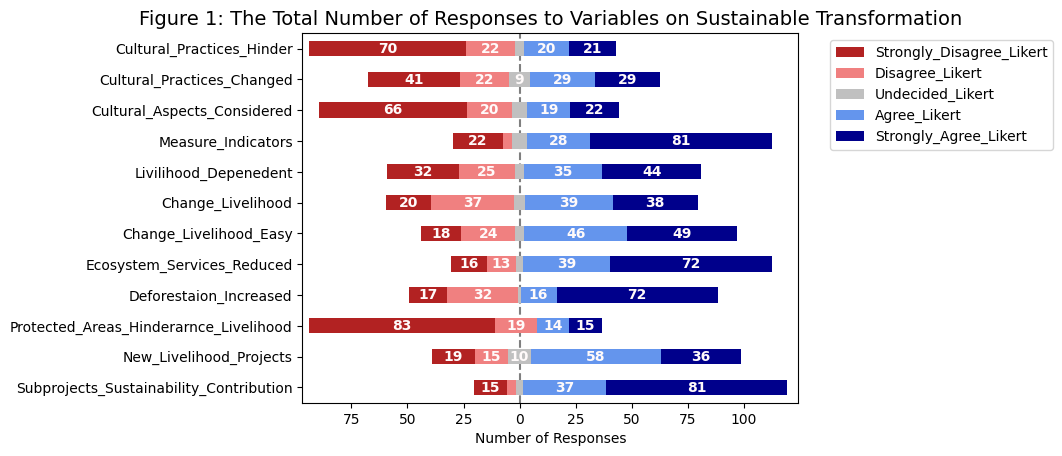

In [359]:
%matplotlib inline
plot_likert.plot_counts(all_counts2, plot_likert.scales.agree,  plot_percentage=False, bar_labels=True, bar_labels_color="snow", colors=plot_likert.colors.default_with_darker_neutral)
plt.title("Figure 1: The Total Number of Responses to Variables on Sustainable Transformation", fontsize=14)
plt.show()

### 7.4 Converting the Responses to Percentages
    The responses were converted to percentages

In [360]:
all_counts3 = df3.apply(lambda col: col.value_counts(normalize=True, dropna=False).round(2))

In [361]:
all_counts3 

Cultural_Practices_Hinder  \
Agree_Likert                                   0.13   
Disagree_Likert                                0.15   
Strongly_Agree_Likert                          0.14   
Strongly_Disagree_Likert                       0.47   
Undecided_Likert                               0.03   
NaN                                            0.09   

                          Cultural_Practices_Changed  \
Agree_Likert                                    0.19   
Disagree_Likert                                 0.15   
Strongly_Agree_Likert                           0.19   
Strongly_Disagree_Likert                        0.27   
Undecided_Likert                                0.06   
NaN                                             0.13   

                          Cultural_Aspects_Considered  Measure_Indicators  \
Agree_Likert                                     0.13                0.19   
Disagree_Likert                                  0.13                0.03   
Strongly_Agree_Likert                            0.15                0.54   
Strongly_Disagree_Likert                         0.44                0.15   
Undecided_Likert                                 0.05                0.05   
NaN                                              0.11                0.05   

                          Livilihood_Depenedent  Change_Livelihood  \
Agree_Likert                               0.23               0.26   
Disagree_Likert                            0.17               0.25   
Strongly_Agree_Likert                      0.29               0.25   
Strongly_Disagree_Likert                   0.21               0.13   
Undecided_Likert                           0.03               0.03   
NaN                                        0.07               0.07   

                          Change_Livelihood_Easy  Ecosystem_Services_Reduced  \
Agree_Likert                                0.31                        0.26   
Disagree_Likert                             0.16                        0.09   
Strongly_Agree_Likert                       0.33                        0.48   
Strongly_Disagree_Likert                    0.12                        0.11   
Undecided_Likert                            0.03                        0.02   
NaN                                         0.06                        0.05   

                          Deforestaion_Increased  \
Agree_Likert                                0.11   
Disagree_Likert                             0.21   
Strongly_Agree_Likert                       0.48   
Strongly_Disagree_Likert                    0.11   
Undecided_Likert                            0.01   
NaN                                         0.08   

                          Protected_Areas_Hinderarnce_Livelihood  \
Agree_Likert                                                0.09   
Disagree_Likert                                             0.13   
Strongly_Agree_Likert                                       0.10   
Strongly_Disagree_Likert                                    0.55   
Undecided_Likert                                             NaN   
NaN                                                         0.13   

                          New_Livelihood_Projects  \
Agree_Likert                                 0.39   
Disagree_Likert                              0.10   
Strongly_Agree_Likert                        0.24   
Strongly_Disagree_Likert                     0.13   
Undecided_Likert                             0.07   
NaN                                          0.08   

                          Subprojects_Sustainability_Contribution  
Agree_Likert                                                 0.25  
Disagree_Likert                                              0.03  
Strongly_Agree_Likert                                        0.54  
Strongly_Disagree_Likert                                     0.10  
Undecided_Likert                                             0.02  
NaN                              

#### 7.4.1 Transposing the Dataframe Table
      Interchanging the rows and columns

In [362]:
all_counts4 = all_counts3.head().T

In [363]:
all_counts4

Agree_Likert  Disagree_Likert  \
Cultural_Practices_Hinder                        0.13             0.15   
Cultural_Practices_Changed                       0.19             0.15   
Cultural_Aspects_Considered                      0.13             0.13   
Measure_Indicators                               0.19             0.03   
Livilihood_Depenedent                            0.23             0.17   
Change_Livelihood                                0.26             0.25   
Change_Livelihood_Easy                           0.31             0.16   
Ecosystem_Services_Reduced                       0.26             0.09   
Deforestaion_Increased                           0.11             0.21   
Protected_Areas_Hinderarnce_Livelihood           0.09             0.13   
New_Livelihood_Projects                          0.39             0.10   
Subprojects_Sustainability_Contribution          0.25             0.03   

                                         Strongly_Agree_Likert  \
Cultural_Practices_Hinder                                 0.14   
Cultural_Practices_Changed                                0.19   
Cultural_Aspects_Considered                               0.15   
Measure_Indicators                                        0.54   
Livilihood_Depenedent                                     0.29   
Change_Livelihood                                         0.25   
Change_Livelihood_Easy                                    0.33   
Ecosystem_Services_Reduced                                0.48   
Deforestaion_Increased                                    0.48   
Protected_Areas_Hinderarnce_Livelihood                    0.10   
New_Livelihood_Projects                                   0.24   
Subprojects_Sustainability_Contribution                   0.54   

                                         Strongly_Disagree_Likert  \
Cultural_Practices_Hinder                                    0.47   
Cultural_Practices_Changed                                   0.27   
Cultural_Aspects_Considered                                  0.44   
Measure_Indicators                                           0.15   
Livilihood_Depenedent                                        0.21   
Change_Livelihood                                            0.13   
Change_Livelihood_Easy                                       0.12   
Ecosystem_Services_Reduced                                   0.11   
Deforestaion_Increased                                       0.11   
Protected_Areas_Hinderarnce_Livelihood                       0.55   
New_Livelihood_Projects                                      0.13   
Subprojects_Sustainability_Contribution                      0.10   

                                         Undecided_Likert  
Cultural_Practices_Hinder                            0.03  
Cultural_Practices_Changed                           0.06  
Cultural_Aspects_Considered                          0.05  
Measure_Indicators                                   0.05  
Livilihood_Depenedent                                0.03  
Change_Livelihood                                    0.03  
Change_Livelihood_Easy                               0.03  
Ecosystem_Services_Reduced                           0.02  
Deforestaion_Increased                               0.01  
Protected_Areas_Hinderarnce_Livelihood                NaN  
New_Livelihood_Projects                              0.07  
Subprojects_Sustainability_Contribution              0.02

#### 7.4.2 Changing the Order of Columns
      The order of columns was changed

In [364]:
all_counts5 = all_counts4.iloc[:, [3, 1, 4, 0, 2]]

In [365]:
all_counts5 

Strongly_Disagree_Likert  \
Cultural_Practices_Hinder                                    0.47   
Cultural_Practices_Changed                                   0.27   
Cultural_Aspects_Considered                                  0.44   
Measure_Indicators                                           0.15   
Livilihood_Depenedent                                        0.21   
Change_Livelihood                                            0.13   
Change_Livelihood_Easy                                       0.12   
Ecosystem_Services_Reduced                                   0.11   
Deforestaion_Increased                                       0.11   
Protected_Areas_Hinderarnce_Livelihood                       0.55   
New_Livelihood_Projects                                      0.13   
Subprojects_Sustainability_Contribution                      0.10   

                                         Disagree_Likert  Undecided_Likert  \
Cultural_Practices_Hinder                           0.15              0.03   
Cultural_Practices_Changed                          0.15              0.06   
Cultural_Aspects_Considered                         0.13              0.05   
Measure_Indicators                                  0.03              0.05   
Livilihood_Depenedent                               0.17              0.03   
Change_Livelihood                                   0.25              0.03   
Change_Livelihood_Easy                              0.16              0.03   
Ecosystem_Services_Reduced                          0.09              0.02   
Deforestaion_Increased                              0.21              0.01   
Protected_Areas_Hinderarnce_Livelihood              0.13               NaN   
New_Livelihood_Projects                             0.10              0.07   
Subprojects_Sustainability_Contribution             0.03              0.02   

                                         Agree_Likert  Strongly_Agree_Likert  
Cultural_Practices_Hinder                        0.13                   0.14  
Cultural_Practices_Changed                       0.19                   0.19  
Cultural_Aspects_Considered                      0.13                   0.15  
Measure_Indicators                               0.19                   0.54  
Livilihood_Depenedent                            0.23                   0.29  
Change_Livelihood                                0.26                   0.25  
Change_Livelihood_Easy                           0.31                   0.33  
Ecosystem_Services_Reduced                       0.26                   0.48  
Deforestaion_Increased                           0.11                   0.48  
Protected_Areas_Hinderarnce_Livelihood           0.09                   0.10  
New_Livelihood_Projects                          0.39                   0.24  
Subprojects_Sustainability_Contribution          0.25                   0.54

#### 7.4.3 Visualising the Results
    The results are visualised as pecentages

C:\Users\nazin\AppData\Local\anaconda3\envs\NLTK_Py_3_12\Lib\site-packages\plot_likert\plot_likert.py:101: FutureWarning: parameter `plot_percentage` for `plot_likert.likert_counts` is deprecated, set it to None and use `compute_percentages` instead
  warn(


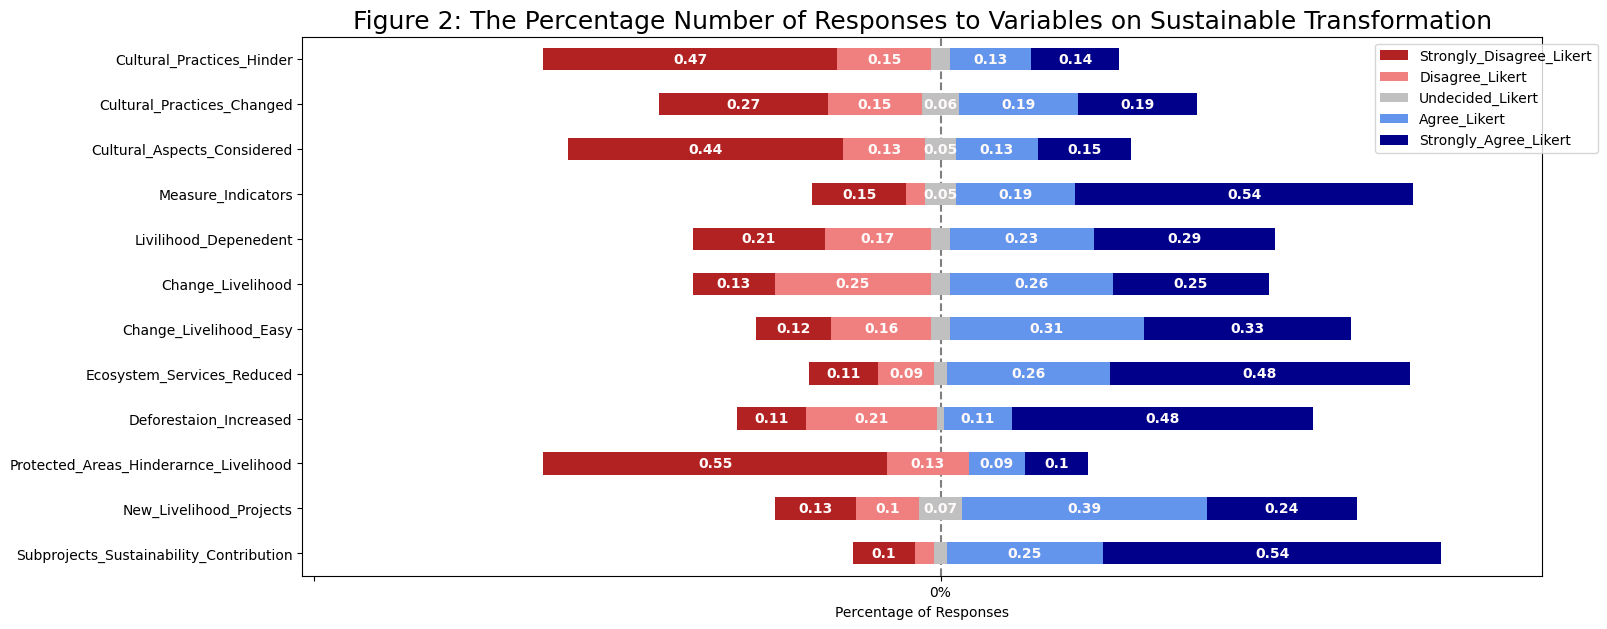

In [366]:
%matplotlib inline
plot_likert.plot_counts(all_counts5, plot_likert.scales.agree,  plot_percentage=True, figsize=(16, 7), bar_labels=True, bar_labels_color="snow", colors=plot_likert.colors.default_with_darker_neutral)
plt.title("Figure 2: The Percentage Number of Responses to Variables on Sustainable Transformation", fontsize=18)
plt.show()

[<a href="#Purpose-of-the-Analysis">Back to top</a>]

## 8. Defined or Responses with Choices
    The responses that had choices other than those with a likert scale were grouped in a pandas dataframe looking the following question:
    
1. '50. What is the main purpose of landscapes (Forests, Water Bodies, Wetlands… etc.) in your livelihood?': 'Purpose_Landscape', 
2. '52. How is your connection to nature like?': 'Connection_Nature', 
3. '54. How long have you worked on this livelihood project?': 'Range_Years',
4. '64. Which livelihood is a major contributor to landscape transformation?': 'Contributor_Landscape_Transformation',
5. '66. Which type of landscape do you depend on much for a livelihood?': 'Landscape_Depended_Livelihood'
    

In [367]:
df4=df2.drop(df2.columns[[0,1,2,3,4,5,6,7,8,9,10,11,12,14,16,18,19,20,21,22,23,24,25,26,28,30,31,32,33,34]], axis = 1)

In [368]:
df4

Purpose_Landscape  \
0                              Nature_Protection_Purpose   
1                              Nature_Protection_Purpose   
2    Nature_Protection_Purpose,Ancestral_Shrines_Purpose   
3                                  Source_Income_Purpose   
4                              Nature_Protection_Purpose   
5                              Nature_Protection_Purpose   
6                                  Source_Income_Purpose   
7                                  Source_Income_Purpose   
8                                                    NaN   
9                                                    NaN   
10       Source_Income_Purpose,Nature_Protection_Purpose   
11                             Nature_Protection_Purpose   
12       Nature_Protection_Purpose,Source_Income_Purpose   
13                             Nature_Protection_Purpose   
14                                 Source_Income_Purpose   
15                             Nature_Protection_Purpose   
16                                 Source_Income_Purpose   
17                             Nature_Protection_Purpose   
18                                 Source_Income_Purpose   
19                                 Source_Income_Purpose   
20                                 Source_Income_Purpose   
21               Nature_Protection_Purpose,Other_Purpose   
22                             Nature_Protection_Purpose   
23                             Nature_Protection_Purpose   
24                             Nature_Protection_Purpose   
25                             Nature_Protection_Purpose   
26                                                   NaN   
27               Nature_Protection_Purpose,Other_Purpose   
28                                 Source_Income_Purpose   
29                             Nature_Protection_Purpose   
30                             Nature_Protection_Purpose   
31                             Nature_Protection_Purpose   
32                             Nature_Protection_Purpose   
33                             Nature_Protection_Purpose   
34                             Nature_Protection_Purpose   
35                             Nature_Protection_Purpose   
36                             Nature_Protection_Purpose   
37                             Nature_Protection_Purpose   
38                             Nature_Protection_Purpose   
39                             Nature_Protection_Purpose   
40                   Source_Income_Purpose,Other_Purpose   
41                             Nature_Protection_Purpose   
42                                       No_Idea_Purpose   
43                             Nature_Protection_Purpose   
44                             Nature_Protection_Purpose   
45                                         Other_Purpose   
46                             Nature_Protection_Purpose   
47                             Nature_Protection_Purpose   
48                                                   NaN   
49                             Nature_Protection_Purpose   
50                             Nature_Protection_Purpose   
51                             Nature_Protection_Purpose   
52                             Nature_Protection_Purpose   
53                             Nature_Protection_Purpose   
54                             Nature_Protection_Purpose   
55                             Nature_Protection_Purpose   
56                             Nature_Protection_Purpose   
57                             Nature_Protection_Purpose   
58                             Nature_Protection_Purpose   
59                                                   NaN   
60                                                   NaN   
61                                                   NaN   
62                                 Source_Income_Purpose   
63                             Nature_Protection_Purpose   
64                                                   NaN   
65                                                   NaN   
66                 

### 8.1 The Purpose of Landscape to People

In [369]:
PL = df4['Purpose_Landscape'].value_counts(dropna=False)
PL_P = (df4['Purpose_Landscape'].value_counts(normalize=True, dropna=False).round(2))

In [370]:
PL_P

Purpose_Landscape
Nature_Protection_Purpose                              0.62
NaN                                                    0.22
Source_Income_Purpose                                  0.11
Nature_Protection_Purpose,Other_Purpose                0.01
Nature_Protection_Purpose,Ancestral_Shrines_Purpose    0.01
Source_Income_Purpose,Nature_Protection_Purpose        0.01
Nature_Protection_Purpose,Source_Income_Purpose        0.01
Source_Income_Purpose,Other_Purpose                    0.01
No_Idea_Purpose                                        0.01
Other_Purpose                                          0.01
Name: proportion, dtype: float64

In [371]:
df_PL = pd.DataFrame(PL)

In [372]:
df_PL

count
Purpose_Landscape                                         
Nature_Protection_Purpose                               93
NaN                                                     33
Source_Income_Purpose                                   16
Nature_Protection_Purpose,Other_Purpose                  2
Nature_Protection_Purpose,Ancestral_Shrines_Purpose      1
Source_Income_Purpose,Nature_Protection_Purpose          1
Nature_Protection_Purpose,Source_Income_Purpose          1
Source_Income_Purpose,Other_Purpose                      1
No_Idea_Purpose                                          1
Other_Purpose                                            1

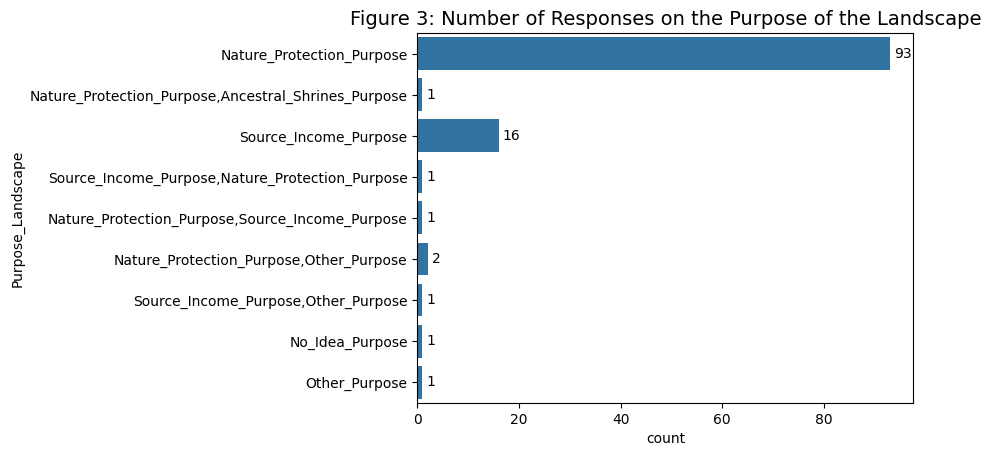

In [373]:
ax = sns.countplot(df4["Purpose_Landscape"])
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", padding=3)
    ax.set_title("Figure 3: Number of Responses on the Purpose of the Landscape", fontsize=14)
plt.show()

### 8.2 The Connection of Nature to People

In [374]:
CN = df4['Connection_Nature'].value_counts(dropna=False)
CN_P = (df4['Connection_Nature'].value_counts(normalize=True, dropna=False).round(2))

In [375]:
CN_P

Connection_Nature
Material_Connection                                  0.82
NaN                                                  0.09
Other_Connection                                     0.04
Experiential_Connection                              0.01
Philosophical_Connection,Psychological_Connection    0.01
Psychological_Connection,Material_Connection         0.01
Psychological_Connection                             0.01
Philosophical_Connection                             0.01
Experiential_Connection,Material_Connection          0.01
Name: proportion, dtype: float64

In [376]:
df_CN = pd.DataFrame(CN)

In [377]:
df_CN

count
Connection_Nature                                       
Material_Connection                                  123
NaN                                                   13
Other_Connection                                       6
Experiential_Connection                                2
Philosophical_Connection,Psychological_Connection      2
Psychological_Connection,Material_Connection           1
Psychological_Connection                               1
Philosophical_Connection                               1
Experiential_Connection,Material_Connection            1

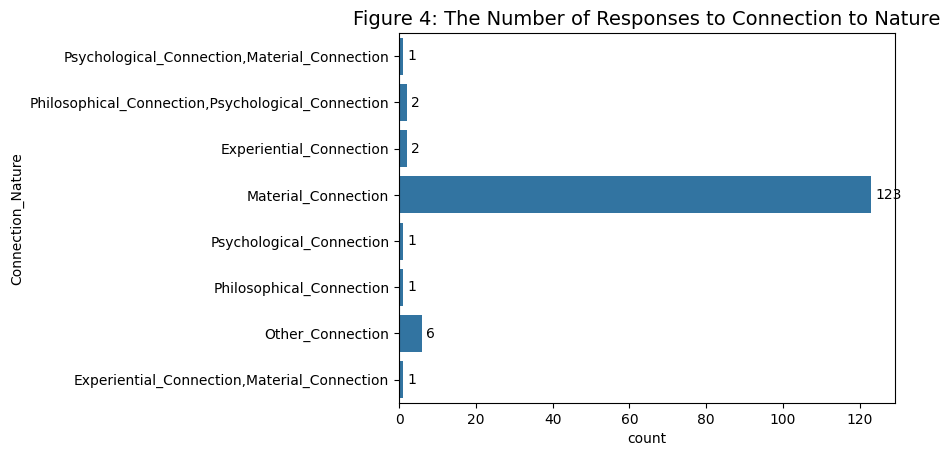

In [378]:
ax = sns.countplot(df4["Connection_Nature"])
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", padding=3)
    ax.set_title("Figure 4: The Number of Responses to Connection to Nature", fontsize=14)
plt.show()

In [379]:
agreement_levels = ["Material_Connection", "Other_Connection"]
CN_R = df2[df2["Connection_Nature"].isin(agreement_levels)]
CN_R1 = CN_R.drop(CN_R.columns[[0,1,2,3,4,6,7,8,9,10,11,12,13,14,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34]], axis = 1)
CN_R1grouped = CN_R1.groupby('Name_Main_Project')['Connection_Nature']
CN_R1

Name_Main_Project    Connection_Nature  \
3                             TRALARD_LNM  Material_Connection   
6                             TRALARD_LNM  Material_Connection   
7                             TRALARD_LNM  Material_Connection   
8                             TRALARD_LNM  Material_Connection   
10                            TRALARD_LNM  Material_Connection   
11                            TRALARD_LNM  Material_Connection   
12                            TRALARD_LNM     Other_Connection   
13                            TRALARD_LNM  Material_Connection   
14                            TRALARD_LNM  Material_Connection   
15                            TRALARD_LNM     Other_Connection   
16                            TRALARD_LNM  Material_Connection   
17                            TRALARD_LNM     Other_Connection   
18                            TRALARD_LNM  Material_Connection   
19                            TRALARD_LNM  Material_Connection   
20                            TRALARD_LNM  Material_Connection   
21                            TRALARD_LNM  Material_Connection   
22                            TRALARD_LNM  Material_Connection   
23           EbA_CENTRAL_MUCHINGA_LUAPULA  Material_Connection   
24                            TRALARD_LNM  Material_Connection   
25                            TRALARD_LNM  Material_Connection   
26                            TRALARD_LNM  Material_Connection   
27                            TRALARD_LNM  Material_Connection   
28                            TRALARD_LNM  Material_Connection   
29           EbA_CENTRAL_MUCHINGA_LUAPULA  Material_Connection   
30           EbA_CENTRAL_MUCHINGA_LUAPULA  Material_Connection   
31                            TRALARD_LNM  Material_Connection   
32                            TRALARD_LNM  Material_Connection   
33        SCRALA_SOUTHERN_WESTERN_NORTHEN  Material_Connection   
34        SCRALA_SOUTHERN_WESTERN_NORTHEN     Other_Connection   
35        SCRALA_SOUTHERN_WESTERN_NORTHEN  Material_Connection   
36        SCRALA_SOUTHERN_WESTERN_NORTHEN  Material_Connection   
37                            TRALARD_LNM  Material_Connection   
38        SCRALA_SOUTHERN_WESTERN_NORTHEN  Material_Connection   
39        SCRALA_SOUTHERN_WESTERN_NORTHEN  Material_Connection   
40        SCRALA_SOUTHERN_WESTERN_NORTHEN  Material_Connection   
41        SCRALA_SOUTHERN_WESTERN_NORTHEN  Material_Connection   
42        SCRALA_SOUTHERN_WESTERN_NORTHEN     Other_Connection   
43        SCRALA_SOUTHERN_WESTERN_NORTHEN  Material_Connection   
44        SCRALA_SOUTHERN_WESTERN_NORTHEN  Material_Connection   
45        SCRALA_SOUTHERN_WESTERN_NORTHEN  Material_Connection   
46        SCRALA_SOUTHERN_WESTERN_NORTHEN  Material_Connection   
47                            TRALARD_LNM  Material_Connection   
49                            TRALARD_LNM  Material_Connection   
50                            TRALARD_LNM  Material_Connection   
51                            TRALARD_LNM  Material_Connection   
52                            TRALARD_LNM  Material_Connection   
53                            TRALARD_LNM  Material_Connection   
54                            TRALARD_LNM  Material_Connection   
55                            TRALARD_LNM  Material_Connection   
56   Ecosystem Conservation_NORTH_WESTERN  Material_Connection   
57   Ecosystem Conservation_NORTH_WESTERN  Material_Connection   
58   Ecosystem Conservation_NORTH_WESTERN  Material_Connection   
59   Ecosystem Conservation_NORTH_WESTERN  Material_Connection   
62   Ecosystem Conservation_NORTH_WESTERN  Material_Connection   
63   Ecosystem Conservation_NORTH_WESTERN     Other_Connection   
66   Ecosystem Conservation_NORTH_WESTERN  Material_Connection   
67        SCRALA_SOUTHERN_WESTERN_NORTHEN  Material_Connection   
68        SCRALA_SOUTHERN_WESTERN_NORTHEN  Material_Connection   
70                              SCRiKA_LS  Material_Connection   
71                              SCRiKA_LS  Material_Connection  

In [380]:
lemmatizer=WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
for index, row in CN_R1.iterrows():
    CN_R1_filter_sentence = []
    CN_R1_sentence = row["Connection_Nature_Reasons"]
    if pd.isnull(CN_R1_sentence):
       continue
    CN_R1_sentence_cleaned = re.sub(r'[^\w\s]','',CN_R1_sentence)
    CN_R1_words = nltk.word_tokenize(CN_R1_sentence_cleaned)
    CN_R1_words = [lemmatizer.lemmatize(w) for w in CN_R1_words if w.lower() not in stop_words]
    CN_R1_filter_sentence.extend(CN_R1_words)
    print(CN_R1_filter_sentence)

['use', 'income']
['source', 'income', 'future', 'generation', 'see']
['Source', 'income']
['source', 'income']
['Thats', 'get', 'income', 'well', 'example', 'cattle', 'use', 'cultivating']
['game', 'park', 'help', 'u', 'source', 'income', 'form', 'meat', 'animal', 'tree', 'rain', 'come', 'protected']
['need', 'keep', 'fish', 'instance', 'fish', 'pond', 'get', 'extinct']
['one', 'look', 'daily', 'basis']
['source', 'livelihood']
['need', 'protect', 'nature', 'instance', 'cutting', 'tree', 'along', 'river', 'lead', 'drying', 'destruction', 'animal', 'biodiversity', 'river']
['answer']
['purpose', 'future', 'meet', 'need']
['source', 'income']
['tree', 'help', 'u', 'bring', 'rainfall']
['Source', 'income']
['harvest', 'right', 'time', 'prevent', 'management', 'natural', 'resource', 'properly']
['taking', 'care']
['Source', 'income']
['Source', 'income']
['bring', 'development', 'tourism']
['income']
['natural', 'resource', 'like', 'tree', 'give', 'shade', 'medicine', 'also', 'get', 'fres

### 8.3 The Length of Existence of the Livelihood Project

In [381]:
RY_grouped = df2.groupby('Name_Main_Project')['Range_Years'].value_counts(dropna=False)

In [382]:
RY_grouped

Name_Main_Project                     Range_Years           
EbA_CENTRAL_MUCHINGA_LUAPULA          3to4Years_Long             2
                                      NaN                        1
Ecosystem Conservation_NORTH_WESTERN  3to4Years_Long             8
                                      NaN                        2
                                      7to8Years_Long             1
PIN_WESTERN                           3to4Years_Long             5
                                      NaN                        1
SCRALA_SOUTHERN_WESTERN_NORTHEN       3to4Years_Long            12
                                      5to6Years_Long             9
                                      Lessthan2Years_Long        6
                                      Greaterthan9Years_Long     2
                                      7to8Years_Long             1
SCReBS_WESTERN                        5to6Years_Long             5
                                      7to8Years_Long             5
 

In [383]:
RY_grouped1 = pd.DataFrame(RY_grouped)

In [384]:
RY_grouped1

count
Name_Main_Project                    Range_Years                  
EbA_CENTRAL_MUCHINGA_LUAPULA         3to4Years_Long              2
                                     NaN                         1
Ecosystem Conservation_NORTH_WESTERN 3to4Years_Long              8
                                     NaN                         2
                                     7to8Years_Long              1
PIN_WESTERN                          3to4Years_Long              5
                                     NaN                         1
SCRALA_SOUTHERN_WESTERN_NORTHEN      3to4Years_Long             12
                                     5to6Years_Long              9
                                     Lessthan2Years_Long         6
                                     Greaterthan9Years_Long      2
                                     7to8Years_Long              1
SCReBS_WESTERN                       5to6Years_Long              5
                                     7to8Years_Long              5
                                     Greaterthan9Years_Long      3
                                     3to4Years_Long              2
SCRiKA_LS                            5to6Years_Long             31
                                     3to4Years_Long              6
                                     NaN                         5
                                     7to8Years_Long              2
TRALARD_LNM                          3to4Years_Long             28
                                     5to6Years_Long              5
                                     Lessthan2Years_Long         3
                                     Greaterthan9Years_Long      2
                                     NaN                         2

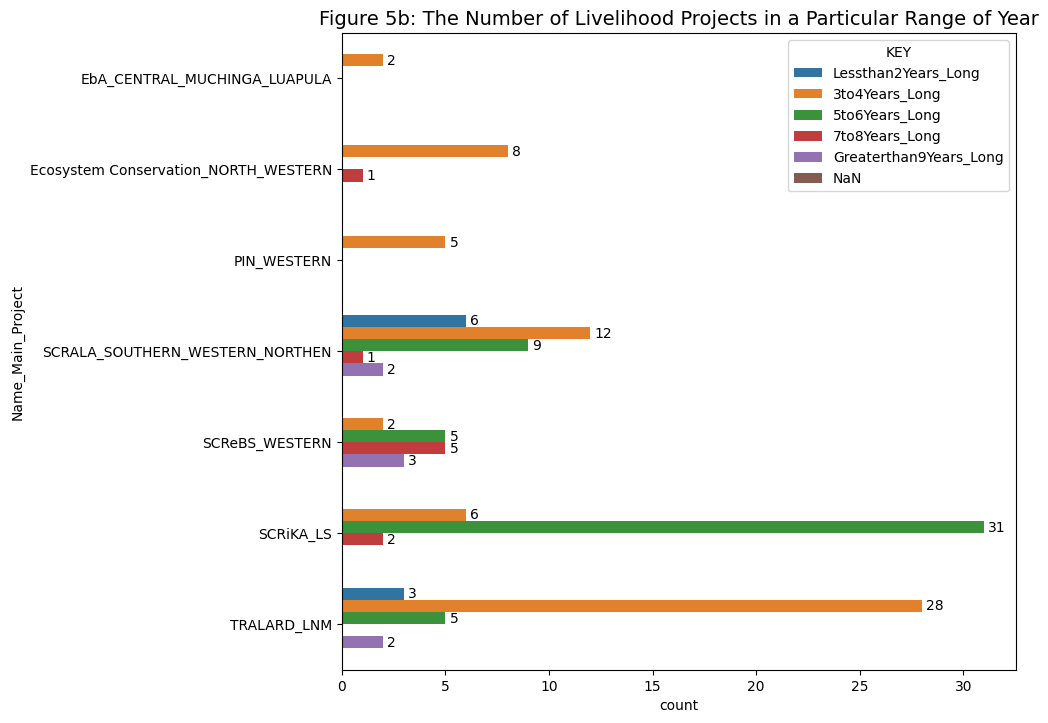

In [385]:
plt.figure(figsize=(8.7, 8.27))
hue_order = ["Lessthan2Years_Long", "3to4Years_Long", "5to6Years_Long", "7to8Years_Long", "Greaterthan9Years_Long", "NaN"]
ax = sns.barplot(data = RY_grouped1, x="count", y="Name_Main_Project", hue="Range_Years", hue_order=hue_order, legend=True)
ax.set_title("Figure 5b: The Number of Livelihood Projects in a Particular Range of Year", fontsize=14)
plt.legend(title="KEY")
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", padding=3)
plt.show()

In [386]:
LP = df4['Range_Years'].value_counts(dropna=False)
LP_P = (df4['Range_Years'].value_counts(normalize=True, dropna=False).round(2))

In [387]:
LP_P

Range_Years
3to4Years_Long            0.42
5to6Years_Long            0.33
NaN                       0.08
Lessthan2Years_Long       0.06
7to8Years_Long            0.06
Greaterthan9Years_Long    0.05
Name: proportion, dtype: float64

In [388]:
df_LP = pd.DataFrame(LP)

In [389]:
df_LP

count
Range_Years                  
3to4Years_Long             63
5to6Years_Long             50
NaN                        12
Lessthan2Years_Long         9
7to8Years_Long              9
Greaterthan9Years_Long      7

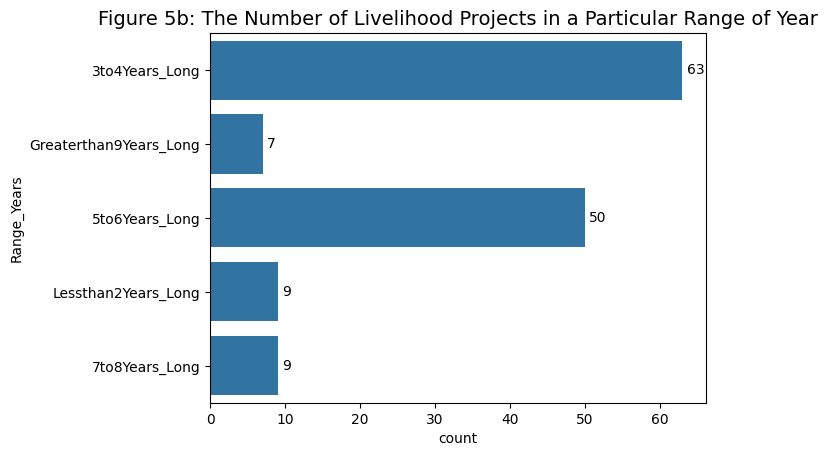

In [390]:
ax = sns.countplot(df4["Range_Years"])
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", padding=3)
    ax.set_title("Figure 5b: The Number of Livelihood Projects in a Particular Range of Year", fontsize=14)
plt.show()

### 8.4 Major Contributor to Landscape Transformation

In [391]:
CLT_grouped = df2.groupby('Name_Main_Project')['Contributor_Landscape_Transformation'].value_counts(dropna=False)

In [392]:
CLT_grouped

Name_Main_Project                     Contributor_Landscape_Transformation
EbA_CENTRAL_MUCHINGA_LUAPULA          Land_Agriculture                         3
Ecosystem Conservation_NORTH_WESTERN  Land_Agriculture                         3
                                      Uncontrolled_Fires                       3
                                      NaN                                      3
                                      Uncontrolled_Fires,Land_Agriculture      1
                                      Wood_Extraction                          1
PIN_WESTERN                           Uncontrolled_Fires                       3
                                      Wood_Extraction                          2
                                      NaN                                      1
SCRALA_SOUTHERN_WESTERN_NORTHEN       Uncontrolled_Fires                      19
                                      Wood_Extraction                          7
                                  

In [393]:
CLT_grouped1 = pd.DataFrame(CLT_grouped)

In [394]:
CLT_grouped1

count
Name_Main_Project                    Contributor_Landscape_Transformation       
EbA_CENTRAL_MUCHINGA_LUAPULA         Land_Agriculture                          3
Ecosystem Conservation_NORTH_WESTERN Land_Agriculture                          3
                                     Uncontrolled_Fires                        3
                                     NaN                                       3
                                     Uncontrolled_Fires,Land_Agriculture       1
                                     Wood_Extraction                           1
PIN_WESTERN                          Uncontrolled_Fires                        3
                                     Wood_Extraction                           2
                                     NaN                                       1
SCRALA_SOUTHERN_WESTERN_NORTHEN      Uncontrolled_Fires                       19
                                     Wood_Extraction                           7
                                     Land_Agriculture                          2
                                     NaN                                       2
SCReBS_WESTERN                       Uncontrolled_Fires                        7
                                     Wood_Extraction                           5
                                     Land_Agriculture                          2
                                     Other                                     1
SCRiKA_LS                            Uncontrolled_Fires                       13
                                     Land_Agriculture                         12
                                     Wood_Extraction                          11
                                     NaN                                       6
                                     Uncontrolled_Grazing                      2
TRALARD_LNM                          Land_Agriculture                         22
                                     Wood_Extraction                          13
                                     Uncontrolled_Fires                        4
                                     NaN                                       1

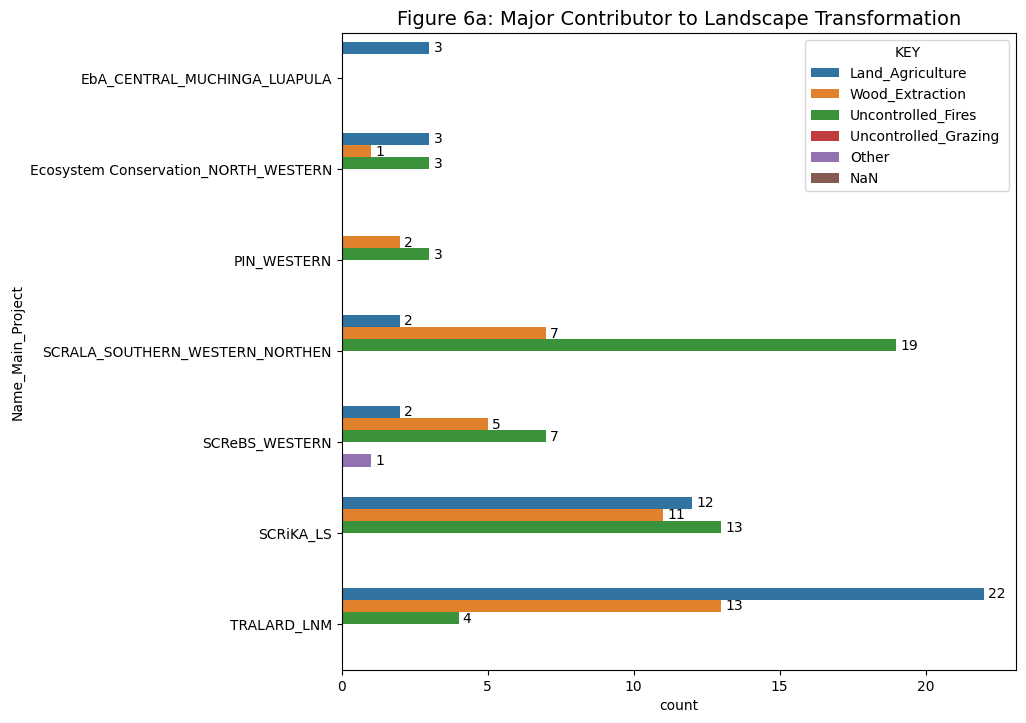

In [395]:
plt.figure(figsize=(8.7, 8.27))
hue_order = ["Land_Agriculture", "Wood_Extraction", "Uncontrolled_Fires", "Uncontrolled_Grazing ", "Other", "NaN"]
ax = sns.barplot(data = CLT_grouped1, x="count", y="Name_Main_Project", hue="Contributor_Landscape_Transformation", hue_order=hue_order, legend=True)
ax.set_title("Figure 6a: Major Contributor to Landscape Transformation", fontsize=14)
plt.legend(title="KEY")
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", padding=3)
plt.show()

In [396]:
CLT = df4['Contributor_Landscape_Transformation'].value_counts(dropna=False)
CLT_P = (df4['Contributor_Landscape_Transformation'].value_counts(normalize=True, dropna=False).round(2))

In [397]:
CLT_P

Contributor_Landscape_Transformation
Uncontrolled_Fires                     0.33
Land_Agriculture                       0.29
Wood_Extraction                        0.26
NaN                                    0.09
Uncontrolled_Grazing                   0.01
Uncontrolled_Fires,Land_Agriculture    0.01
Other                                  0.01
Name: proportion, dtype: float64

In [398]:
df_CLT = pd.DataFrame(CLT)

In [399]:
df_CLT

count
Contributor_Landscape_Transformation       
Uncontrolled_Fires                       49
Land_Agriculture                         44
Wood_Extraction                          39
NaN                                      14
Uncontrolled_Grazing                      2
Uncontrolled_Fires,Land_Agriculture       1
Other                                     1

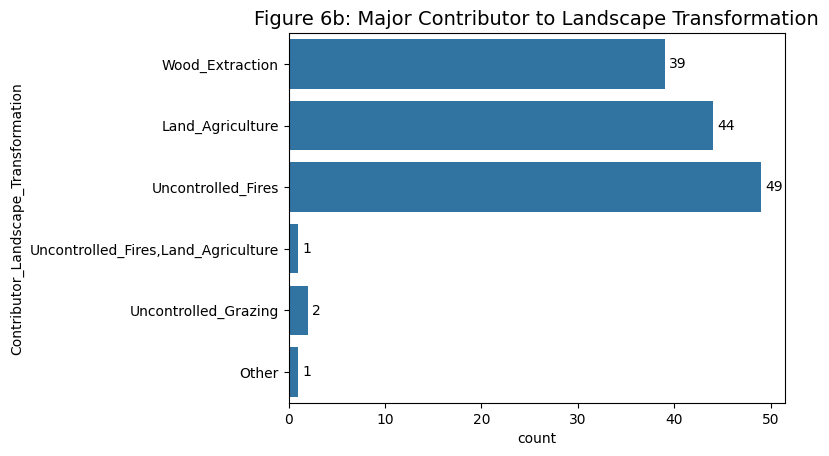

In [400]:
ax = sns.countplot(df4["Contributor_Landscape_Transformation"])
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", padding=3)
    ax.set_title("Figure 6b: Major Contributor to Landscape Transformation", fontsize=14)
plt.show()

In [401]:
agreement_levels = ["Wood_Extration", "Land_Agriculture","Uncontrolled_Fires"]
CLT_R = df2[df2["Contributor_Landscape_Transformation"].isin(agreement_levels)]
CLT_R1 = CN_R.drop(CLT_R.columns[[0,1,2,3,4,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,29,30,31,32,33,34]], axis = 1)
CLT_R1grouped = CLT_R1.groupby('Name_Main_Project')['Contributor_Landscape_Transformation']
CLT_R1

Name_Main_Project  \
3                             TRALARD_LNM   
6                             TRALARD_LNM   
7                             TRALARD_LNM   
8                             TRALARD_LNM   
10                            TRALARD_LNM   
11                            TRALARD_LNM   
12                            TRALARD_LNM   
13                            TRALARD_LNM   
14                            TRALARD_LNM   
15                            TRALARD_LNM   
16                            TRALARD_LNM   
17                            TRALARD_LNM   
18                            TRALARD_LNM   
19                            TRALARD_LNM   
20                            TRALARD_LNM   
21                            TRALARD_LNM   
22                            TRALARD_LNM   
23           EbA_CENTRAL_MUCHINGA_LUAPULA   
24                            TRALARD_LNM   
25                            TRALARD_LNM   
26                            TRALARD_LNM   
27                            TRALARD_LNM   
28                            TRALARD_LNM   
29           EbA_CENTRAL_MUCHINGA_LUAPULA   
30           EbA_CENTRAL_MUCHINGA_LUAPULA   
31                            TRALARD_LNM   
32                            TRALARD_LNM   
33        SCRALA_SOUTHERN_WESTERN_NORTHEN   
34        SCRALA_SOUTHERN_WESTERN_NORTHEN   
35        SCRALA_SOUTHERN_WESTERN_NORTHEN   
36        SCRALA_SOUTHERN_WESTERN_NORTHEN   
37                            TRALARD_LNM   
38        SCRALA_SOUTHERN_WESTERN_NORTHEN   
39        SCRALA_SOUTHERN_WESTERN_NORTHEN   
40        SCRALA_SOUTHERN_WESTERN_NORTHEN   
41        SCRALA_SOUTHERN_WESTERN_NORTHEN   
42        SCRALA_SOUTHERN_WESTERN_NORTHEN   
43        SCRALA_SOUTHERN_WESTERN_NORTHEN   
44        SCRALA_SOUTHERN_WESTERN_NORTHEN   
45        SCRALA_SOUTHERN_WESTERN_NORTHEN   
46        SCRALA_SOUTHERN_WESTERN_NORTHEN   
47                            TRALARD_LNM   
49                            TRALARD_LNM   
50                            TRALARD_LNM   
51                            TRALARD_LNM   
52                            TRALARD_LNM   
53                            TRALARD_LNM   
54                            TRALARD_LNM   
55                            TRALARD_LNM   
56   Ecosystem Conservation_NORTH_WESTERN   
57   Ecosystem Conservation_NORTH_WESTERN   
58   Ecosystem Conservation_NORTH_WESTERN   
59   Ecosystem Conservation_NORTH_WESTERN   
62   Ecosystem Conservation_NORTH_WESTERN   
63   Ecosystem Conservation_NORTH_WESTERN   
66   Ecosystem Conservation_NORTH_WESTERN   
67        SCRALA_SOUTHERN_WESTERN_NORTHEN   
68        SCRALA_SOUTHERN_WESTERN_NORTHEN   
70                              SCRiKA_LS   
71                              SCRiKA_LS   
72                              SCRiKA_LS   
74                              SCRiKA_LS   
75                              SCRiKA_LS   
76                              SCRiKA_LS   
77                              SCRiKA_LS   
78        SCRALA_SOUTHERN_WESTERN_NORTHEN   
79        SCRALA_SOUTHERN_WESTERN_NORTHEN   
80        SCRALA_SOUTHERN_WESTERN_NORTHEN   
81        SCRALA_SOUTHERN_WESTERN_NORTHEN   
82                              SCRiKA_LS   
83                              SCRiKA_LS   
85                              SCRiKA_LS   
86                              SCRiKA_LS   
87                              SCRiKA_LS   
88                              SCRiKA_LS   
90                              SCRiKA_LS   
91                              SCRiKA_LS   
92                              SCRiKA_LS   
94                              SCRiKA_LS   
95                              SCRiKA_LS   
96                              SCRiKA_LS   
97                              SCRiKA_LS   
98                              SCRiKA_LS   
100                             SCRiKA_LS   
101                             SCRiKA_LS   
102                             SCRiKA_LS   
103                             SCRiKA_LS   
104                             SCRiKA_LS   
106                

In [402]:
lemmatizer=WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
for index, row in CLT_R1.iterrows():
    CLT_R1_filter_sentence = []
    CLT_R1_sentence = row["Contributor_Landscape_Transformation_Reasons"]
    if pd.isnull(CLT_R1_sentence):
       continue
    CLT_R1_sentence_cleaned = re.sub(r'[^\w\s]','',CLT_R1_sentence)
    CLT_R1_words = nltk.word_tokenize(CLT_R1_sentence_cleaned)
    CLT_R1_words = [lemmatizer.lemmatize(w) for w in CLT_R1_words if w.lower() not in stop_words]
    CLT_R1_filter_sentence.extend(CLT_R1_words)
    print(CLT_R1_filter_sentence)

['requires', 'huge', 'land', 'others', 'like', 'making', 'charcoal']
['burning', 'charcoal', 'give', 'smoke', 'destroys', 'ozone', 'layer', 'well', 'brings', 'acidic', 'rain']
['agriculture', 'activity', 'food']
['electricity', 'thus', 'huge', 'demand', 'energy']
['charcoal', 'purpose', 'bad', 'land', 'left', 'bare', 'unlike', 'agriculture', 'cutting', 'replaced', 'plant']
['cultivation', 'cassava', 'requires', 'always', 'barren', 'land', 'never', 'cultivated', 'grow', 'well', 'crop', 'bean', 'vegetable', 'maize', 'reduce', 'deforestation']
['burn', 'tree', 'shoot']
['Chitemene', 'system', 'cultivation', 'lead', 'deforestation', 'others']
['source', 'food', 'people', 'area']
['Thats', 'get', 'livelihood']
['source', 'income']
['time', 'cut', 'tree', 'even', 'want', 'cultivate', 'well', 'burining', 'kill', 'animal', 'necesary', 'making', 'soil', 'fertile']
['Buring', 'destroy', 'product', 'crop', 'soil']
['cutting', 'treed', 'change', 'landscape']
['cutting', 'tress', 'destroys', 'much'

### 8.5 The Landscape Depended on for a Livelihood

In [403]:
LDL_grouped = df2.groupby('Name_Main_Project')['Landscape_Depended_Livelihood'].value_counts(dropna=False)

In [404]:
LDL_grouped

Name_Main_Project                     Landscape_Depended_Livelihood                 
EbA_CENTRAL_MUCHINGA_LUAPULA          Agriculture_Areas_Dependent                        3
Ecosystem Conservation_NORTH_WESTERN  NaN                                                5
                                      Agriculture_Areas_Dependent                        3
                                      Forest_Dependent                                   2
                                      Wetlands_Dependent                                 1
PIN_WESTERN                           Agriculture_Areas_Dependent                        5
                                      NaN                                                1
SCRALA_SOUTHERN_WESTERN_NORTHEN       Agriculture_Areas_Dependent                       21
                                      Wetlands_Dependent                                 6
                                      Forest_Dependent                                   2
     

In [405]:
LDL_grouped1 = pd.DataFrame(LDL_grouped)

In [406]:
LDL_grouped1

count
Name_Main_Project                    Landscape_Depended_Livelihood                        
EbA_CENTRAL_MUCHINGA_LUAPULA         Agriculture_Areas_Dependent                         3
Ecosystem Conservation_NORTH_WESTERN NaN                                                 5
                                     Agriculture_Areas_Dependent                         3
                                     Forest_Dependent                                    2
                                     Wetlands_Dependent                                  1
PIN_WESTERN                          Agriculture_Areas_Dependent                         5
                                     NaN                                                 1
SCRALA_SOUTHERN_WESTERN_NORTHEN      Agriculture_Areas_Dependent                        21
                                     Wetlands_Dependent                                  6
                                     Forest_Dependent                                    2
                                     NaN                                                 1
SCReBS_WESTERN                       Agriculture_Areas_Dependent                        10
                                     Wetlands_Dependent                                  5
SCRiKA_LS                            Agriculture_Areas_Dependent                        30
                                     Forest_Dependent                                    4
                                     Wetlands_Dependent                                  4
                                     NaN                                                 4
                                     Wetlands_Dependent,Forest_Dependent                 2
TRALARD_LNM                          Agriculture_Areas_Dependent                        20
                                     Wetlands_Dependent                                  9
                                     Forest_Dependent                                    5
                                     Wetlands_Dependent,Forest_Dependent                 2
                                     Agriculture_Areas_Dependent,Wetlands_Dependent      1
                                     Forest_Dependent,Wetlands_Dependent                 1
                                     Wetlands_Dependent,Agriculture_Areas_Dependent      1
                                     NaN                                                 1

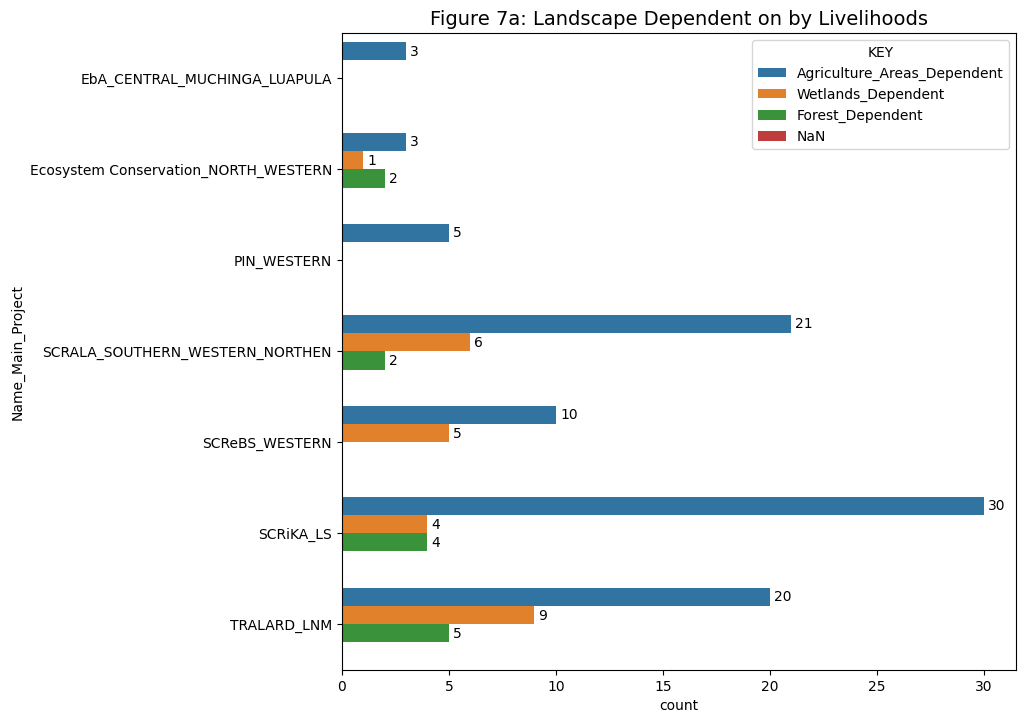

In [407]:
plt.figure(figsize=(8.7, 8.27))
hue_order = ["Agriculture_Areas_Dependent", "Wetlands_Dependent", "Forest_Dependent", "NaN"]
ax = sns.barplot(data = LDL_grouped1, x="count", y="Name_Main_Project", hue="Landscape_Depended_Livelihood", hue_order=hue_order, legend=True)
ax.set_title("Figure 7a: Landscape Dependent on by Livelihoods", fontsize=14)
plt.legend(title="KEY")
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", padding=3)
plt.show()

In [408]:
LDL = df4['Landscape_Depended_Livelihood'].value_counts(dropna=False)
LDL_P = (df4['Landscape_Depended_Livelihood'].value_counts(normalize=True, dropna=False).round(2))

In [409]:
LDL_P

Landscape_Depended_Livelihood
Agriculture_Areas_Dependent                       0.61
Wetlands_Dependent                                0.17
Forest_Dependent                                  0.09
NaN                                               0.09
Wetlands_Dependent,Forest_Dependent               0.03
Agriculture_Areas_Dependent,Wetlands_Dependent    0.01
Forest_Dependent,Wetlands_Dependent               0.01
Wetlands_Dependent,Agriculture_Areas_Dependent    0.01
Name: proportion, dtype: float64

In [410]:
df_LDL = pd.DataFrame(LDL)

In [411]:
df_LDL

count
Landscape_Depended_Livelihood                        
Agriculture_Areas_Dependent                        92
Wetlands_Dependent                                 25
Forest_Dependent                                   13
NaN                                                13
Wetlands_Dependent,Forest_Dependent                 4
Agriculture_Areas_Dependent,Wetlands_Dependent      1
Forest_Dependent,Wetlands_Dependent                 1
Wetlands_Dependent,Agriculture_Areas_Dependent      1

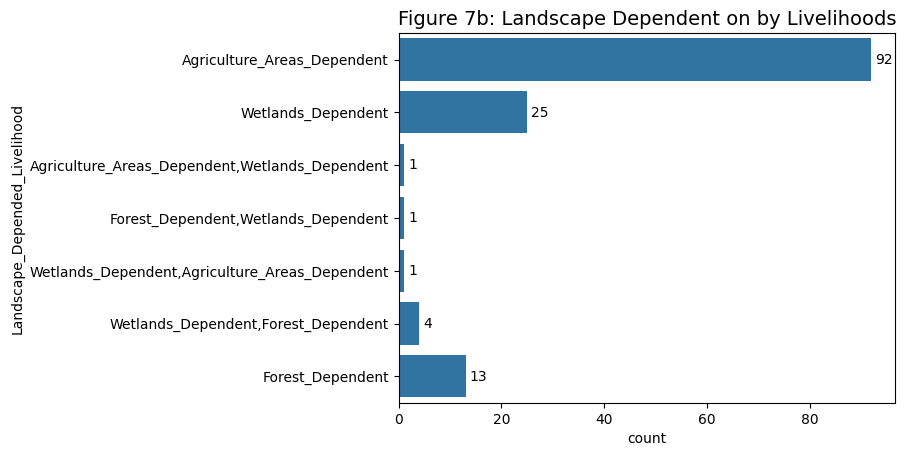

In [412]:
ax = sns.countplot(df4["Landscape_Depended_Livelihood"])
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", padding=3)
    ax.set_title("Figure 7b: Landscape Dependent on by Livelihoods", fontsize=14)
plt.show()

In [413]:
agreement_levels = ["Agriculture_Areas_Dependent", "Wetland_Depenedent","Forest_Dependent"]
LDL_R = df2[df2["Landscape_Depended_Livelihood"].isin(agreement_levels)]
LDL_R1 = LDL_R.drop(LDL_R.columns[[0,1,2,3,4,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,31,32,33,34]], axis = 1)
LDL_R1grouped = LDL_R1.groupby('Name_Main_Project')['Landscape_Depended_Livelihood']
LDL_R1

Name_Main_Project Landscape_Depended_Livelihood  \
0                             TRALARD_LNM   Agriculture_Areas_Dependent   
3                             TRALARD_LNM   Agriculture_Areas_Dependent   
5                             TRALARD_LNM   Agriculture_Areas_Dependent   
6                             TRALARD_LNM   Agriculture_Areas_Dependent   
8                             TRALARD_LNM   Agriculture_Areas_Dependent   
9                             TRALARD_LNM   Agriculture_Areas_Dependent   
10                            TRALARD_LNM   Agriculture_Areas_Dependent   
11                            TRALARD_LNM   Agriculture_Areas_Dependent   
12                            TRALARD_LNM   Agriculture_Areas_Dependent   
14                            TRALARD_LNM   Agriculture_Areas_Dependent   
15                            TRALARD_LNM              Forest_Dependent   
16                            TRALARD_LNM   Agriculture_Areas_Dependent   
17                            TRALARD_LNM   Agriculture_Areas_Dependent   
19                            TRALARD_LNM   Agriculture_Areas_Dependent   
20                            TRALARD_LNM              Forest_Dependent   
23           EbA_CENTRAL_MUCHINGA_LUAPULA   Agriculture_Areas_Dependent   
24                            TRALARD_LNM   Agriculture_Areas_Dependent   
25                            TRALARD_LNM              Forest_Dependent   
26                            TRALARD_LNM              Forest_Dependent   
27                            TRALARD_LNM   Agriculture_Areas_Dependent   
29           EbA_CENTRAL_MUCHINGA_LUAPULA   Agriculture_Areas_Dependent   
30           EbA_CENTRAL_MUCHINGA_LUAPULA   Agriculture_Areas_Dependent   
31                            TRALARD_LNM   Agriculture_Areas_Dependent   
33        SCRALA_SOUTHERN_WESTERN_NORTHEN   Agriculture_Areas_Dependent   
34        SCRALA_SOUTHERN_WESTERN_NORTHEN   Agriculture_Areas_Dependent   
35        SCRALA_SOUTHERN_WESTERN_NORTHEN              Forest_Dependent   
36        SCRALA_SOUTHERN_WESTERN_NORTHEN   Agriculture_Areas_Dependent   
38        SCRALA_SOUTHERN_WESTERN_NORTHEN   Agriculture_Areas_Dependent   
39        SCRALA_SOUTHERN_WESTERN_NORTHEN   Agriculture_Areas_Dependent   
41        SCRALA_SOUTHERN_WESTERN_NORTHEN   Agriculture_Areas_Dependent   
42        SCRALA_SOUTHERN_WESTERN_NORTHEN   Agriculture_Areas_Dependent   
46        SCRALA_SOUTHERN_WESTERN_NORTHEN              Forest_Dependent   
47                            TRALARD_LNM   Agriculture_Areas_Dependent   
49                            TRALARD_LNM   Agriculture_Areas_Dependent   
50                            TRALARD_LNM   Agriculture_Areas_Dependent   
53                            TRALARD_LNM   Agriculture_Areas_Dependent   
54                            TRALARD_LNM              Forest_Dependent   
56   Ecosystem Conservation_NORTH_WESTERN   Agriculture_Areas_Dependent   
58   Ecosystem Conservation_NORTH_WESTERN   Agriculture_Areas_Dependent   
59   Ecosystem Conservation_NORTH_WESTERN              Forest_Dependent   
65   Ecosystem Conservation_NORTH_WESTERN   Agriculture_Areas_Dependent   
66   Ecosystem Conservation_NORTH_WESTERN              Forest_Dependent   
68        SCRALA_SOUTHERN_WESTERN_NORTHEN   Agriculture_Areas_Dependent   
70                              SCRiKA_LS              Forest_Dependent   
71                              SCRiKA_LS   Agriculture_Areas_Dependent   
72                              SCRiKA_LS   Agriculture_Areas_Dependent   
74                              SCRiKA_LS   Agriculture_Areas_Dependent   
75                              SCRiKA_LS   Agriculture_Areas_Dependent   
76                              SCRiKA_LS   Agriculture_Areas_Dependent   
77                              SCRiKA_LS   Agriculture_Areas_Dependent   
79        SCRALA_SOUTHERN_WESTERN_NORTHEN   Agriculture_Areas_Dependent   
80        SCRALA_SOUTHERN_WESTERN_NORTHEN   Agriculture_Areas_Dependent   
81        SCRALA_SOUTHERN_WESTERN_NORTHEN   Agric

In [414]:
lemmatizer=WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
for index, row in LDL_R1.iterrows():
    LDL_R1_filter_sentence = []
    LDL_R1_sentence = row["Landscape_Depeneded_Livelihood_Reasons"]
    if pd.isnull(LDL_R1_sentence):
       continue
    LDL_R1_sentence_cleaned = re.sub(r'[^\w\s]','',LDL_R1_sentence)
    LDL_R1_words = nltk.word_tokenize(LDL_R1_sentence_cleaned)
    LDL_R1_words = [lemmatizer.lemmatize(w) for w in LDL_R1_words if w.lower() not in stop_words]
    LDL_R1_filter_sentence.extend(LDL_R1_words)
    print(LDL_R1_filter_sentence)

['cultivates', 'large', 'area', 'land', 'crop', 'sold', 'livelihood']
['Food', 'main', 'source', 'livelihood', 'thus', 'without', 'way', 'earn', 'living']
['source', 'income', 'well', 'food', 'consumption']
['farming', 'help', 'sourcing', 'food']
['Thats', 'source', 'income']
['source', 'livelihood']
['income', 'come', 'living']
['help', 'u', 'cultivate', 'cassava', 'maize', 'much', 'fishing', 'activity']
['farming', 'obtain', 'food', 'consumption', 'household', 'level']
['food', 'security', 'come']
['tree', 'bring', 'rainfall', 'area', 'compared', 'area']
['source', 'income']
['majority', 'people', 'cultivate', 'land', 'livelihood', 'depending', 'buying', 'shop']
['Thats', 'whats', 'common', 'within', 'area']
['source', 'traditional', 'medicine']
['source', 'food', 'crop', 'income']
['use', 'cultivation']
['Source', 'income']
['mostly', 'farmer']
['Thats', 'source', 'income', 'livelihood']
['food', 'crop']
['food', 'crop', 'come']
['Thats', 'source', 'food', 'crop', 'well', 'income']


## 8.6 Explanation to Choices
 It gives an explanation to the choice selected that is not among the choices that were provided in the list of the questionnaire

In [415]:
df5=df2.drop(df2.columns[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]], axis = 1)

In [416]:
df5

Purpose_Landscape_Specific  \
0                                                                            NaN   
1                                                                            NaN   
2                                                                            NaN   
3                                                                            NaN   
4                    Only the protection of nature, the others are not important   
5                                                                            NaN   
6                                                                            NaN   
7                                                                            NaN   
8                                                                            NaN   
9                                                                            NaN   
10                                                                           NaN   
11                                                                           NaN   
12                                                                           NaN   
13                                                                           NaN   
14                                                                           NaN   
15                                                                           NaN   
16                                                                           NaN   
17                                                                           NaN   
18                                                                           NaN   
19                                                                           NaN   
20                                                                           NaN   
21   The fire can burn all the biodiversity that allow the environmental process   
22                                                                           NaN   
23                                                                           NaN   
24                                                                           NaN   
25                                                                           NaN   
26                                                                           NaN   
27                                                                           NaN   
28                                                                           NaN   
29                                                                           NaN   
30                                                                           NaN   
31                                                                           NaN   
32                                                                           NaN   
33                                                                           NaN   
34                                                                           NaN   
35                                                                           NaN   
36                                                                           NaN   
37                                                                           NaN   
38                                                                           NaN   
39                                                                           NaN   
40                      The tourist bring income in terms of viewing the animals   
41                                                                           NaN   
42                                                                           NaN   
43                                                                           NaN   
44                                                                           NaN   
45                                         For sources of income through tourism   
46                                                                           NaN   
47                    

In [417]:
lemmatizer=WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
for index, row in df5.iterrows():
    PL_RS1_filter_sentence = []
    PL_RS1_sentence = row["Purpose_Landscape_Specific"]
    if pd.isnull(PL_RS1_sentence):
       continue
    PL_RS1_sentence_cleaned = re.sub(r'[^\w\s]','',PL_RS1_sentence)
    PL_RS1_words = nltk.word_tokenize(PL_RS1_sentence_cleaned)
    PL_RS1_words = [lemmatizer.lemmatize(w) for w in PL_RS1_words if w.lower() not in stop_words]
    PL_RS1_filter_sentence.extend(PL_RS1_words)
    print(PL_RS1_filter_sentence)

['protection', 'nature', 'others', 'important']
['fire', 'burn', 'biodiversity', 'allow', 'environmental', 'process']
['tourist', 'bring', 'income', 'term', 'viewing', 'animal']
['source', 'income', 'tourism']


In [418]:
lemmatizer=WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
for index, row in df5.iterrows():
    CN_RS1_filter_sentence = []
    CN_RS1_sentence = row["Connection_Nature_Specific"]
    if pd.isnull(CN_RS1_sentence):
       continue
    CN_RS1_sentence_cleaned = re.sub(r'[^\w\s]','',CN_RS1_sentence)
    CN_RS1_words = nltk.word_tokenize(CN_RS1_sentence_cleaned)
    CN_RS1_words = [lemmatizer.lemmatize(w) for w in CN_RS1_words if w.lower() not in stop_words]
    CN_RS1_filter_sentence.extend(CN_RS1_words)
    print(CN_RS1_filter_sentence)

['Taking', 'care', 'nature', 'without', 'destroying']
['Taking', 'care', 'nature']
['Source', 'good', 'air', 'food', 'product']
['related']
['Protection', 'tree']
['Taking', 'care', 'animal']


In [419]:
lemmatizer=WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
for index, row in df5.iterrows():
    CLT_RS1_filter_sentence = []
    CLT_RS1_sentence = row["Contributor_Landscape_Transformation_Specific"]
    if pd.isnull(CLT_RS1_sentence):
       continue
    CLT_RS1_sentence_cleaned = re.sub(r'[^\w\s]','',CLT_RS1_sentence)
    CLT_RS1_words = nltk.word_tokenize(CLT_RS1_sentence_cleaned)
    CLT_RS1_words = [lemmatizer.lemmatize(w) for w in CLT_RS1_words if w.lower() not in stop_words]
    CLT_RS1_filter_sentence.extend(CLT_RS1_words)
    print(CLT_RS1_filter_sentence)

['Cutting', 'tree', 'sale']


In [420]:
lemmatizer=WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
for index, row in df5.iterrows():
    LDL_RS1_filter_sentence = []
    LDL_RS1_sentence = row["Landscape_Depended_Livelihood_Specific"]
    if pd.isnull(LDL_RS1_sentence):
       continue
    LDL_RS1_sentence_cleaned = re.sub(r'[^\w\s]','',LDL_RS1_sentence)
    LDL_RS1_words = nltk.word_tokenize(LDL_RS1_sentence_cleaned)
    LDL_RS1_words = [lemmatizer.lemmatize(w) for w in LDL_RS1_words if w.lower() not in stop_words]
    LDL_RS1_filter_sentence.extend(LDL_RS1_words)
    print(LDL_RS1_filter_sentence)

## 9. Description Statistics 
    It gives a background to the study sites

In [421]:
df6=df2.drop(df2.columns[[0,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34]], axis = 1)

In [422]:
df6

Ward_Name  \
0             Isamba ward   
1             Isamba ward   
2             Isamba ward   
3             Isamba ward   
4             Isamba ward   
5             Isamba ward   
6             Isamba ward   
7             Isamba ward   
8             Isamba ward   
9             Isamba ward   
10            Moofwe ward   
11            Moofwe ward   
12            Moofwe ward   
13            Moofwe ward   
14            Moofwe ward   
15            Moofwe ward   
16            Moofwe ward   
17         Nachikufu ward   
18         Nachikufu ward   
19         Nachikufu ward   
20         Nachikufu ward   
21         Nachikufu ward   
22          Lulimala ward   
23          Lulimala ward   
24          Lulimala ward   
25          Lulimala ward   
26          Lulimala ward   
27          Lulimala ward   
28          Lulimala ward   
29          Lulimala ward   
30          Lulimala ward   
31          Lulimala ward   
32          Lulimala ward   
33           Kalanga ward   
34           Kalanga ward   
35           Kalanga ward   
36           Kalanga ward   
37           Kalanga ward   
38           Kalanga ward   
39           Kalanga ward   
40           Kalanga ward   
41            Ntonga ward   
42            Ntonga ward   
43            Ntonga ward   
44            Ntonga ward   
45            Ntonga ward   
46            Ntonga ward   
47            Ntonga ward   
48            Ntonga ward   
49         Chitimbwa ward   
50         Chitimbwa ward   
51         Chitimbwa ward   
52         Chitimbwa ward   
53         Chitimbwa ward   
54         Chitimbwa ward   
55         Chitimbwa ward   
56            Makuya ward   
57            Makuya ward   
58            Makuya ward   
59            Makuya ward   
60            Ntambu ward   
61            Ntambu ward   
62           Silunga ward   
63            Makuya ward   
64            Makuya ward   
65            Ntambu ward   
66            Ntambu ward   
67   Namwala Central ward   
68   Namwala Central ward   
69   Namwala Central ward   
70   Namwala Central ward   
71   Namwala Central ward   
72   Namwala Central ward   
73   Namwala Central ward   
74   Namwala Central ward   
75   Namwala Central ward   
76   Namwala Central ward   
77   Namwala Central ward   
78   Namwala Central ward   
79   Namwala Central ward   
80   Namwala Central ward   
81   Namwala Central ward   
82   Namwala Central ward   
83   Namwala Central ward   
84                    NaN   
85             Mbila ward   
86             Mbila ward   
87             Mbila ward   
88                    NaN   
89             Mbila ward   
90             Mbila ward   
91             Mbila ward   
92             Mbila ward   
93             Mbila ward   
94             Mbila ward   
95             Mbila ward   
96             Mbila ward   
97             Mbila ward   
98             Mbila ward   
99             Mbila ward   
100           Luubwe ward   
101           Luubwe ward   
102           Luubwe ward   
103           Luubwe ward   
104             Omba ward   
105             Omba ward   
106             Omba ward   
107             Omba ward   
108             Omba ward   
109             Omba ward   
110             Omba ward   
111             Omba ward   
112             Omba ward   
113             Omba ward   
114             Omba ward   
115             Omba ward   
116             Omba ward   
117             Omba ward   
118             Omba ward   
119      Kalobolelwa ward   
120      Kalobolelwa ward   
121      Kalobolelwa ward   
122      Kalobolelwa ward   
123      Kalobolelwa ward   
124      Kalobolelwa ward   
125      Kalobolelwa ward   
126      Kalobolelwa ward   
127      Kalobolelwa ward   
128       Mwanambuyu ward   
129       Mwanambuyu ward   
130       Mwanambuyu ward   
131       Mwanambuyu ward   
132       Mwanambuyu ward   
133       Mwanambuyu ward   
134       Mwanambuyu ward   
135       Mwanambuyu ward   
136       Mwanambuyu ward   
137       Mwan

[<a href="#Purpose-of-the-Analysis">Back to top</a>]

### 9.1 Main project Types
    This shows the number of questionaires that were administered to each project type

In [423]:
MP = df6['Name_Main_Project'].value_counts(dropna=False)

In [424]:
MP

Name_Main_Project
SCRiKA_LS                               44
TRALARD_LNM                             40
SCRALA_SOUTHERN_WESTERN_NORTHEN         30
SCReBS_WESTERN                          15
Ecosystem Conservation_NORTH_WESTERN    11
PIN_WESTERN                              6
EbA_CENTRAL_MUCHINGA_LUAPULA             3
NaN                                      1
Name: count, dtype: int64

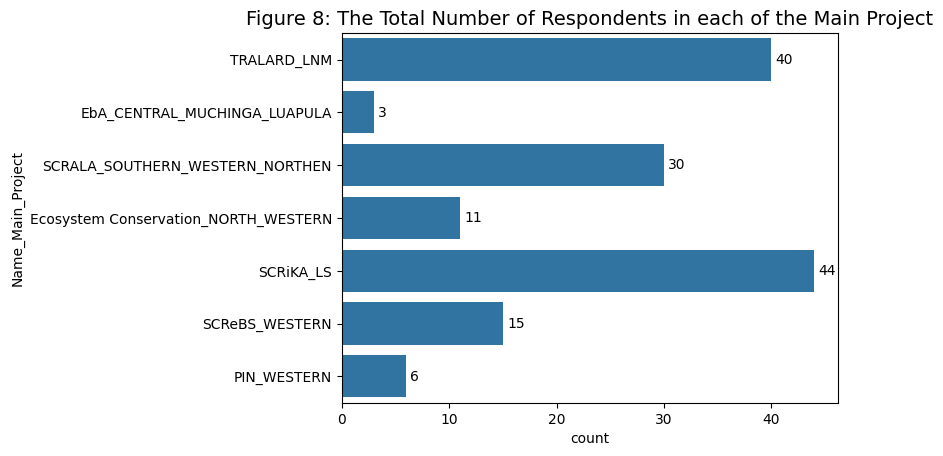

In [425]:
ax = sns.countplot(df6["Name_Main_Project"])
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", padding=3)
    ax.set_title("Figure 8: The Total Number of Respondents in each of the Main Project", fontsize=14)
plt.show()

### 9.2 The Wards
    The wards that had respodents and their number

In [426]:
WN = df6['Ward_Name'].value_counts(dropna=False)

In [427]:
WN

Ward_Name
Namwala Central ward    17
Omba ward               15
Mbila ward              14
Yeta ward               11
Mwanambuyu ward         11
Lulimala ward           11
Isamba ward             10
Kalobolelwa ward         9
Ntonga ward              8
Kalanga ward             8
Moofwe ward              7
Chitimbwa ward           7
Makuya ward              6
Nachikufu ward           5
Luubwe ward              4
Ntambu ward              4
NaN                      2
Silunga ward             1
Name: count, dtype: int64

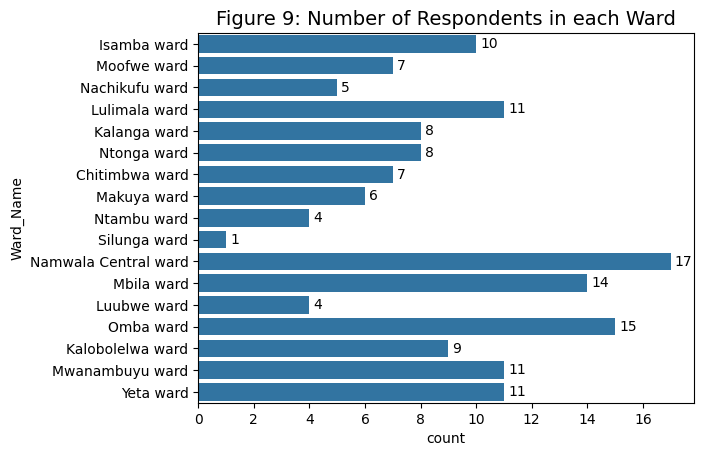

In [428]:
ax = sns.countplot(df6["Ward_Name"])
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", padding=3)
    ax.set_title("Figure 9: Number of Respondents in each Ward", fontsize=14)
plt.show()

### 9.3 Number of beneficiaries
    It shows the number of households that benefited from the interviewees

In [429]:
NB = df6['Number_Beneficiaries'].value_counts(dropna=False)

In [430]:
NB

Number_Beneficiaries
Greaterthan40People_Many    40
10to20People_Many           25
NaN                         25
20to30People_Many           24
30to40People_Many           23
Lessthan10People_Many       13
Name: count, dtype: int64

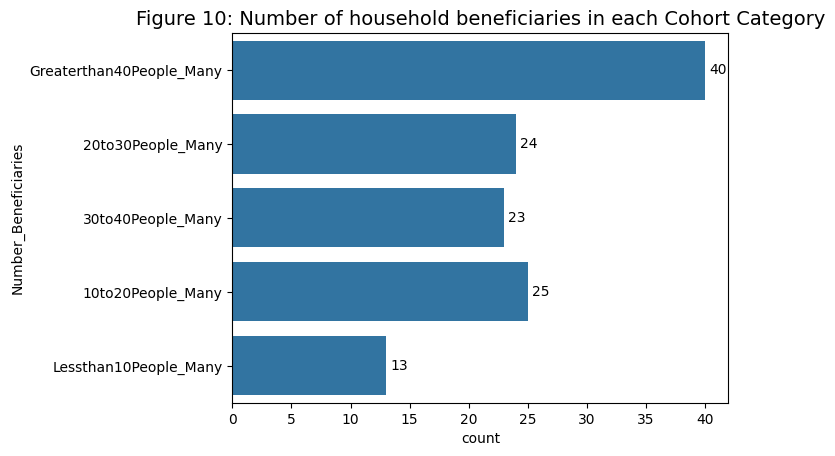

In [431]:
ax = sns.countplot(df6["Number_Beneficiaries"])
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", padding=3)
    ax.set_title("Figure 10: Number of household beneficiaries in each Cohort Category", fontsize=14)
plt.show()

### 9.4 Size of Landscape

In [432]:
SIZE = df6['Size'].value_counts(dropna=False)

In [433]:
SIZE

Size
Lessthan4Lima_Size        48
Greaterthan16Lima_Size    40
NotApplicable_Size        31
4to8Lima_Size             13
NaN                       10
8to12Lima_Size             5
12to16Lima_Size            3
Name: count, dtype: int64

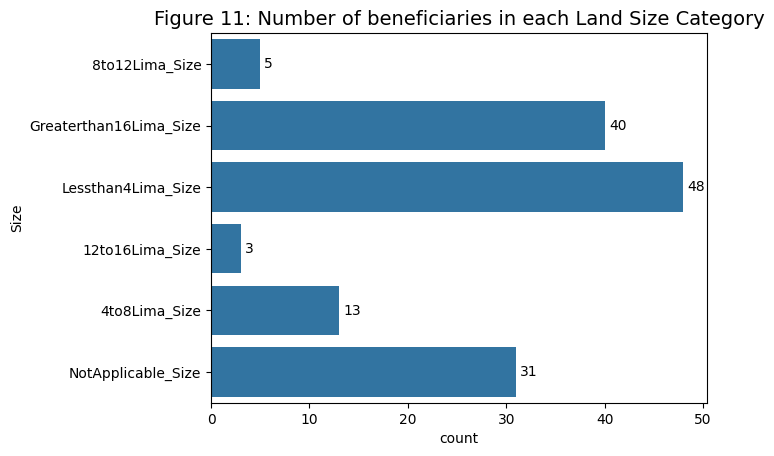

In [434]:
ax = sns.countplot(df6["Size"])
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", padding=3)
    ax.set_title("Figure 11: Number of beneficiaries in each Land Size Category", fontsize=14)
plt.show()

### 9.5 Represing Others
    It looks at those representing one house and more

In [435]:
RO = df6['Representing_Others'].value_counts(dropna=False)

In [436]:
RO

Representing_Others
yes    125
no      23
NaN      2
Name: count, dtype: int64

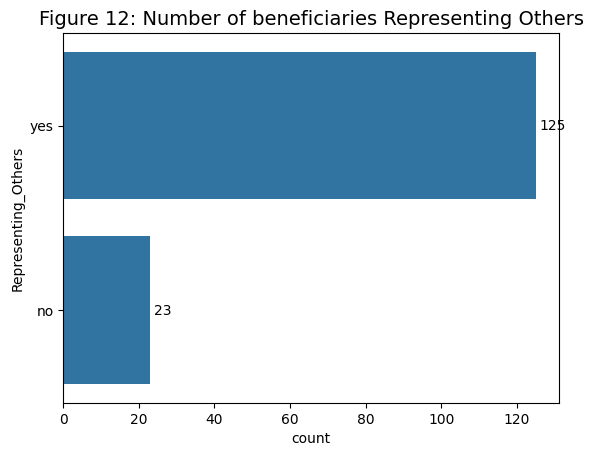

In [437]:
ax = sns.countplot(df6["Representing_Others"])
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", padding=3)
    ax.set_title("Figure 12: Number of beneficiaries Representing Others", fontsize=14)
plt.show()

[<a href="#Purpose-of-the-Analysis">Back to top</a>]

## 10. Reasons
The pandas dataframe depicts columns for the reasons to the responses to the likert scales

In [438]:
df7=df2.drop(df2.columns[[0,1,2,3,4,5,6,7,8,10,11,13,14,15,17,18,19,20,22,23,24,25,26,27,29,31,32,33,34]], axis = 1)

In [439]:
df7

Cultural_Practices_Hinder_Reason  \
0                                                                                                                                                                                                                    It has never happed before in his life time   
1                                                                                                                                                                     There is need to harvest trees when they have fully grown the same applies to biodiversity   
2                                                                                                                                                                                            There are no customary practices that hinder sustainable management   
3                                                                                                                                                                         There are crop rotations made on the land when cultivating to ensure fertility of soil   
4                                                                                                                                                                                                                                               There is nothing   
5                                                                                                                                                                                                                                               There is nothing   
6                                                                                                                                                                                                                                               There is nothing   
7                                                                                                                                                                               You are allowed to cultivate an area for 3 years before shifting to another area   
8                                                                                                                                                                                                                                               There is nothing   
9                                                                                                                                                                                                                                               There is nothing   
10                                                                                                                                                                                  There is no cultural history within the community except from the governmnet   
11                                                                                                                                       There are rules from the chiefs who ensure that harvesting period is followed as well as the period of burning the bush   
12                                                                              There is a norm that the bush should be burned when it is not very dry so that the bush does not completely burn and also to support quick regermination of vegetation and trees   
13                                                                                                                                                                                                                                  There are  no cultural norms   
14                                                                                                                                                                                                                                              There is nothing   
15                                                              

### 10.1 Reasons for Cultural Practices Hidering
     The reasons for cultural practices that hinder transfromation

In [440]:
lemmatizer = WordNetLemmatizer()
CPH = df7['Cultural_Practices_Hinder_Reason'].str.lower().str.cat(sep=' ')
CPH_words = nltk.tokenize.word_tokenize(CPH)
CPH_filtered_tokens = [word for word in CPH_words if len(CPH_words) >= 4]
CPH_lemmatized_words = [lemmatizer.lemmatize(word) for word in CPH_filtered_tokens]
CPH_token_counts = Counter(CPH_lemmatized_words)
CPH_columns = pd.DataFrame(CPH_token_counts.most_common(67),
columns = ['Word', 'Frequency'])
print(CPH_columns)

            Word  Frequency
0          there        104
1             is         94
2            the         74
3        nothing         74
4             to         35
5            are         26
6           that         25
7             of         25
8              a         20
9       practice         16
10          tree         15
11            ''         14
12           not         13
13   environment         12
14            no         11
15           and         11
16        people         11
17      cultural          9
18           but          9
19            it          8
20            in          8
21           for          8
22          from          8
23       protect          8
24          have          7
25     customary          7
26          land          7
27     community          7
28          down          7
29            do          7
30    management          6
31       cutting          6
32          such          6
33            ha          5
34          they    

In [441]:
lemmatizer = WordNetLemmatizer()
CAC = df7['Cultural_Aspects_Considered_Reasons'].str.lower().str.cat(sep=' ')
CAC_words = nltk.tokenize.word_tokenize(CAC)
CAC_filtered_tokens = [word for word in CAC_words if len(CAC_words) >= 4]
CAC_lemmatized_words = [lemmatizer.lemmatize(word) for word in CAC_filtered_tokens]
CAC_token_counts = Counter(CAC_lemmatized_words)
CAC_columns = pd.DataFrame(CAC_token_counts.most_common(67),
columns = ['Word', 'Frequency'])
print(CAC_columns)

           Word  Frequency
0           the         73
1           not         52
2            is         51
3            we         47
4         there         45
5       nothing         39
6            do         36
7            to         23
8           are         23
9            it         17
10      project         15
11         that         13
12           of         13
13     cultural         12
14         have         11
15          can         11
16     included         11
17         they         11
18           no         10
19           in         10
20            a         10
21      because         10
22  traditional          8
23       aspect          7
24       follow          7
25     practice          7
26          and          6
27           be          6
28           if          6
29          our          6
30          for          5
31         from          5
32      include          5
33   considered          5
34         what          4
35           so          4
3

In [442]:
lemmatizer = WordNetLemmatizer()
CoN = df7['Connection_Nature_Reasons'].str.lower().str.cat(sep=' ')
CoN_words = nltk.tokenize.word_tokenize(CoN)
CoN_filtered_tokens = [word for word in CoN_words if len(CoN_words) >= 4]
CoN_lemmatized_words = [lemmatizer.lemmatize(word) for word in CoN_filtered_tokens]
CoN_token_counts = Counter(CoN_lemmatized_words)
CoN_columns = pd.DataFrame(CoN_token_counts.most_common(67),
columns = ['Word', 'Frequency'])
print(CoN_columns)

          Word  Frequency
0            a         27
1           of         27
2          the         25
3         they         17
4       source         17
5       income         15
6           to         13
7          for         13
8          are         12
9           in         10
10        tree          9
11          is          8
12          we          8
13        them          7
14         and          7
15        well          6
16          it          6
17      animal          5
18         get          5
19           u          5
20        from          5
21      future          4
22          on          4
23           ,          4
24       there          4
25        help          4
26    instance          4
27     protect          4
28       bring          4
29         air          4
30         can          3
31          be          3
32  generation          3
33        lead          3
34        life          3
35     through          3
36  management          3
37        li

In [443]:
lemmatizer = WordNetLemmatizer()
CLE = df7['Change_Livelihood_Easy_Reasons'].str.lower().str.cat(sep=' ')
CLE_words = nltk.tokenize.word_tokenize(CLE)
CLE_filtered_tokens = [word for word in CLE_words if len(CLE_words) >= 4]
CLE_lemmatized_words = [lemmatizer.lemmatize(word) for word in CLE_filtered_tokens]
CLE_token_counts = Counter(CLE_lemmatized_words)
CLE_columns = pd.DataFrame(CLE_token_counts.most_common(67),
columns = ['Word', 'Frequency'])
print(CLE_columns)

           Word  Frequency
0           the         76
1            we         68
2            to         65
3             a         62
4            is         59
5        change         53
6            it         38
7           are         35
8           can         31
9          have         31
10        there         30
11          not         29
12   livelihood         28
13         that         28
14           of         27
15          and         23
16           on         21
17      because         20
18           if         19
19            i         18
20           in         17
21         thus         17
22          for         17
23         long         16
24         from         15
25           do         15
26          our         14
27           be         13
28     resource         13
29          use         12
30      natural         11
31       depend         11
32    difficult         11
33      climate         10
34            u         10
35          you         10
3

In [444]:
lemmatizer = WordNetLemmatizer()
CLT = df7['Contributor_Landscape_Transformation_Reasons'].str.lower().str.cat(sep=' ')
CLT_words = nltk.tokenize.word_tokenize(CLT)
CLT_filtered_tokens = [word for word in CLT_words if len(CLT_words) >= 4]
CLT_lemmatized_words = [lemmatizer.lemmatize(word) for word in CLT_filtered_tokens]
CLT_token_counts = Counter(CLT_lemmatized_words)
CLT_columns = pd.DataFrame(CLT_token_counts.most_common(67),
columns = ['Word', 'Frequency'])
print(CLT_columns)

            Word  Frequency
0            the        144
1             of         56
2              a         54
3           tree         47
4             it         41
5            for         40
6             to         35
7             is         33
8            are         31
9            and         26
10      destroys         24
11          that         20
12        animal         19
13       cutting         18
14          land         16
15      charcoal         16
16         there         15
17       burning         15
18           cut         14
19            we         14
20          fire         14
21            in         13
22          when         13
23          huge         12
24        people         12
25          they         12
26          burn         12
27            on         12
28       because         11
29             ,         11
30          area         11
31          have         10
32   agriculture         10
33          down         10
34          food    

In [445]:
lemmatizer = WordNetLemmatizer()
LDL = df7['Landscape_Depeneded_Livelihood_Reasons'].str.lower().str.cat(sep=' ')
LDL_words = nltk.tokenize.word_tokenize(LDL)
LDL_filtered_tokens = [word for word in LDL_words if len(LDL_words) >= 4]
LDL_lemmatized_words = [lemmatizer.lemmatize(word) for word in LDL_filtered_tokens]
LDL_token_counts = Counter(LDL_lemmatized_words)
LDL_columns = pd.DataFrame(LDL_token_counts.most_common(67),
columns = ['Word', 'Frequency'])
print(LDL_columns)

           Word  Frequency
0            we         63
1            is         54
2          food         51
3             a         46
4           the         43
5          crop         38
6         thats         38
7         where         37
8            of         34
9           our         33
10          get         29
11          for         28
12       source         25
13          and         25
14         that         24
15        water         23
16         from         23
17          are         22
18         were         21
19           it         20
20       income         18
21           in         16
22         life         16
23   livelihood         15
24         come         13
25       farmer         12
26         area         10
27           to         10
28       animal          9
29           on          8
30         well          8
31        there          7
32      farming          7
33       forest          7
34          can          6
35           be          6
3

[<a href="#Purpose-of-the-Analysis">Back to top</a>]

## 11. Specific Variables

### 11.1 Main Project and Cultural Practices
The responses are grouped in line with the main projects
There is also the grouping of responses of those that agreed and storngly agreed in one dataframe as well as those whose responses were strongly disagreed and disagreed  
The text responses in form of reasons are tokenized and lammentized  

In [446]:
CPH_grouped = df2.groupby('Name_Main_Project')['Cultural_Practices_Hinder'].value_counts(dropna=False)

In [447]:
CPH_grouped

Name_Main_Project                     Cultural_Practices_Hinder
EbA_CENTRAL_MUCHINGA_LUAPULA          Strongly_Agree_Likert         2
                                      Strongly_Disagree_Likert      1
Ecosystem Conservation_NORTH_WESTERN  Strongly_Disagree_Likert      5
                                      Strongly_Agree_Likert         2
                                      NaN                           2
                                      Agree_Likert                  1
                                      Disagree_Likert               1
PIN_WESTERN                           Strongly_Disagree_Likert      5
                                      NaN                           1
SCRALA_SOUTHERN_WESTERN_NORTHEN       Disagree_Likert              11
                                      Strongly_Disagree_Likert      9
                                      Agree_Likert                  5
                                      Strongly_Agree_Likert         2
                          

In [448]:
CPH_grouped1 = pd.DataFrame(CPH_grouped)

In [449]:
CPH_grouped1

count
Name_Main_Project                    Cultural_Practices_Hinder       
EbA_CENTRAL_MUCHINGA_LUAPULA         Strongly_Agree_Likert          2
                                     Strongly_Disagree_Likert       1
Ecosystem Conservation_NORTH_WESTERN Strongly_Disagree_Likert       5
                                     Strongly_Agree_Likert          2
                                     NaN                            2
                                     Agree_Likert                   1
                                     Disagree_Likert                1
PIN_WESTERN                          Strongly_Disagree_Likert       5
                                     NaN                            1
SCRALA_SOUTHERN_WESTERN_NORTHEN      Disagree_Likert               11
                                     Strongly_Disagree_Likert       9
                                     Agree_Likert                   5
                                     Strongly_Agree_Likert          2
                                     Undecided_Likert               2
                                     NaN                            1
SCReBS_WESTERN                       Strongly_Disagree_Likert      14
                                     Agree_Likert                   1
SCRiKA_LS                            Strongly_Disagree_Likert      20
                                     Disagree_Likert                6
                                     NaN                            6
                                     Agree_Likert                   5
                                     Strongly_Agree_Likert          5
                                     Undecided_Likert               2
TRALARD_LNM                          Strongly_Disagree_Likert      16
                                     Strongly_Agree_Likert         10
                                     Agree_Likert                   8
                                     Disagree_Likert                4
                                     NaN                            2

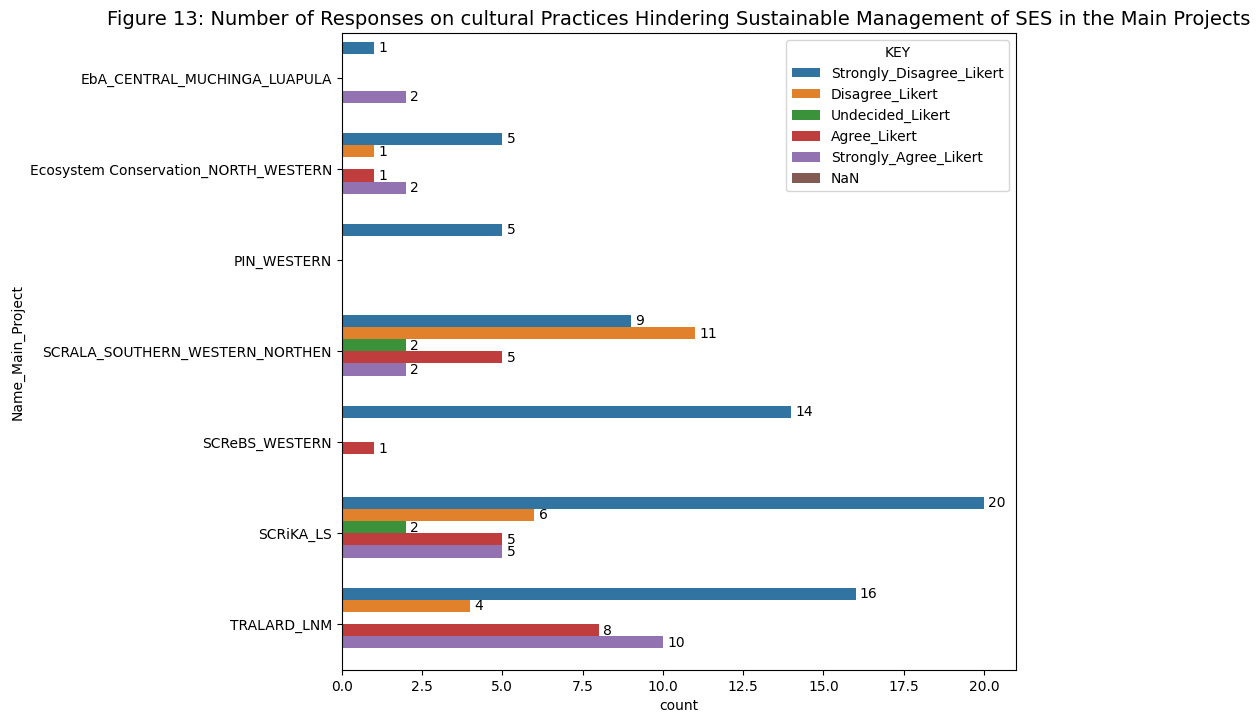

In [450]:
plt.figure(figsize=(8.7, 8.27))
hue_order = ["Strongly_Disagree_Likert", "Disagree_Likert", "Undecided_Likert", "Agree_Likert", "Strongly_Agree_Likert", "NaN"]
ax = sns.barplot(data = CPH_grouped1, x="count", y="Name_Main_Project", hue="Cultural_Practices_Hinder", hue_order=hue_order, legend=True)
ax.set_title("Figure 13: Number of Responses on cultural Practices Hindering Sustainable Management of SES in the Main Projects", fontsize=14)
plt.legend(title="KEY")
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", padding=3)
plt.show()

In [451]:
agreement_levels = ["Agree_Likert", "Strongly_Agree_Likert"]
CPH_R = df2[df2["Cultural_Practices_Hinder"].isin(agreement_levels)]

In [452]:
CPH_R1 = CPH_R.drop(CPH_R.columns[[0,1,2,3,4,6,7,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34]], axis = 1)
CPH_R1grouped = CPH_R1.groupby('Name_Main_Project')['Cultural_Practices_Hinder']
CPH_R1

Name_Main_Project Cultural_Practices_Hinder  \
1                             TRALARD_LNM     Strongly_Agree_Likert   
3                             TRALARD_LNM     Strongly_Agree_Likert   
7                             TRALARD_LNM     Strongly_Agree_Likert   
11                            TRALARD_LNM     Strongly_Agree_Likert   
12                            TRALARD_LNM     Strongly_Agree_Likert   
17                            TRALARD_LNM     Strongly_Agree_Likert   
19                            TRALARD_LNM     Strongly_Agree_Likert   
22                            TRALARD_LNM     Strongly_Agree_Likert   
23           EbA_CENTRAL_MUCHINGA_LUAPULA     Strongly_Agree_Likert   
24                            TRALARD_LNM              Agree_Likert   
25                            TRALARD_LNM     Strongly_Agree_Likert   
27                            TRALARD_LNM     Strongly_Agree_Likert   
29           EbA_CENTRAL_MUCHINGA_LUAPULA     Strongly_Agree_Likert   
31                            TRALARD_LNM              Agree_Likert   
32                            TRALARD_LNM              Agree_Likert   
35        SCRALA_SOUTHERN_WESTERN_NORTHEN              Agree_Likert   
37                            TRALARD_LNM              Agree_Likert   
39        SCRALA_SOUTHERN_WESTERN_NORTHEN              Agree_Likert   
41        SCRALA_SOUTHERN_WESTERN_NORTHEN     Strongly_Agree_Likert   
46        SCRALA_SOUTHERN_WESTERN_NORTHEN              Agree_Likert   
47                            TRALARD_LNM              Agree_Likert   
49                            TRALARD_LNM              Agree_Likert   
53                            TRALARD_LNM              Agree_Likert   
55                            TRALARD_LNM              Agree_Likert   
56   Ecosystem Conservation_NORTH_WESTERN     Strongly_Agree_Likert   
64   Ecosystem Conservation_NORTH_WESTERN              Agree_Likert   
65   Ecosystem Conservation_NORTH_WESTERN     Strongly_Agree_Likert   
68        SCRALA_SOUTHERN_WESTERN_NORTHEN              Agree_Likert   
71                              SCRiKA_LS     Strongly_Agree_Likert   
74                              SCRiKA_LS              Agree_Likert   
76                              SCRiKA_LS     Strongly_Agree_Likert   
79        SCRALA_SOUTHERN_WESTERN_NORTHEN     Strongly_Agree_Likert   
80        SCRALA_SOUTHERN_WESTERN_NORTHEN              Agree_Likert   
93                              SCRiKA_LS              Agree_Likert   
95                              SCRiKA_LS              Agree_Likert   
100                             SCRiKA_LS     Strongly_Agree_Likert   
101                             SCRiKA_LS              Agree_Likert   
103                             SCRiKA_LS              Agree_Likert   
108                             SCRiKA_LS     Strongly_Agree_Likert   
114                             SCRiKA_LS     Strongly_Agree_Likert   
129                        SCReBS_WESTERN              Agree_Likert   

                                                                                                                                                                                                                                Cultural_Practices_Hinder_Reason  
1                                                                                                                                                                     There is need to harvest trees when they have fully grown the same applies to biodiversity  
3                                                                                                                                                                         There are crop rotations made on the land when cultivating to ensure fertility of soil  
7                                                                                                                                                                               You are allowed to cultivate an area for 3 years before shifting to another area  
11   

In [453]:
lemmatizer=WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
for index, row in CPH_R1.iterrows():
    CPH_R1_filter_sentence = []
    CPH_R1_sentence = row["Cultural_Practices_Hinder_Reason"]
    if pd.isnull(CPH_R1_sentence):
       continue
    CPH_R1_sentence_cleaned = re.sub(r'[^\w\s]','',CPH_R1_sentence)
    CPH_R1_words = nltk.word_tokenize(CPH_R1_sentence_cleaned)
    CPH_R1_words = [lemmatizer.lemmatize(w) for w in CPH_R1_words if w.lower() not in stop_words]
    CPH_R1_filter_sentence.extend(CPH_R1_words)
    print(CPH_R1_filter_sentence)

['need', 'harvest', 'tree', 'fully', 'grown', 'applies', 'biodiversity']
['crop', 'rotation', 'made', 'land', 'cultivating', 'ensure', 'fertility', 'soil']
['allowed', 'cultivate', 'area', '3', 'year', 'shifting', 'another', 'area']
['rule', 'chief', 'ensure', 'harvesting', 'period', 'followed', 'well', 'period', 'burning', 'bush']
['norm', 'bush', 'burned', 'dry', 'bush', 'completely', 'burn', 'also', 'support', 'quick', 'regermination', 'vegetation', 'tree']
['nothing']
['never', 'heard', 'learnt']
['cutting', 'tree', 'along', 'river', 'allowed']
['act', 'late', 'burning', 'destroys', 'environment', 'people', 'community', 'would', 'want', 'catch', 'Catapilars', 'consumption', 'sale']
['long', 'time', 'ago', 'people', 'poor', 'management', 'natural', 'moment', 'practice', 'maintain', 'biodiversity']
['cultural', 'practice', 'future', 'generation', 'know', 'anything']
['customary', 'practice', 'promote', 'early', 'burning', 'people', 'tend', 'burn', 'late']
['unregulated', 'allocation'

In [454]:
agreement_levels = ["Disagree_Likert", "Strongly_Disagree_Likert"]
CPH_R2 = df2[df2["Cultural_Practices_Hinder"].isin(agreement_levels)]

In [455]:
CPH_R3 = CPH_R2.drop(CPH_R2.columns[[0,1,2,3,4,6,7,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34]], axis = 1)
CPH_R3grouped = CPH_R3.groupby('Name_Main_Project')['Cultural_Practices_Hinder']
CPH_R3

Name_Main_Project Cultural_Practices_Hinder  \
0                             TRALARD_LNM           Disagree_Likert   
2                             TRALARD_LNM  Strongly_Disagree_Likert   
4                             TRALARD_LNM  Strongly_Disagree_Likert   
5                             TRALARD_LNM  Strongly_Disagree_Likert   
6                             TRALARD_LNM  Strongly_Disagree_Likert   
8                             TRALARD_LNM  Strongly_Disagree_Likert   
9                             TRALARD_LNM  Strongly_Disagree_Likert   
10                            TRALARD_LNM  Strongly_Disagree_Likert   
13                            TRALARD_LNM  Strongly_Disagree_Likert   
14                            TRALARD_LNM  Strongly_Disagree_Likert   
15                            TRALARD_LNM  Strongly_Disagree_Likert   
16                            TRALARD_LNM  Strongly_Disagree_Likert   
18                            TRALARD_LNM  Strongly_Disagree_Likert   
20                            TRALARD_LNM  Strongly_Disagree_Likert   
21                            TRALARD_LNM           Disagree_Likert   
28                            TRALARD_LNM  Strongly_Disagree_Likert   
30           EbA_CENTRAL_MUCHINGA_LUAPULA  Strongly_Disagree_Likert   
33        SCRALA_SOUTHERN_WESTERN_NORTHEN  Strongly_Disagree_Likert   
34        SCRALA_SOUTHERN_WESTERN_NORTHEN  Strongly_Disagree_Likert   
36        SCRALA_SOUTHERN_WESTERN_NORTHEN           Disagree_Likert   
38        SCRALA_SOUTHERN_WESTERN_NORTHEN           Disagree_Likert   
40        SCRALA_SOUTHERN_WESTERN_NORTHEN           Disagree_Likert   
42        SCRALA_SOUTHERN_WESTERN_NORTHEN           Disagree_Likert   
43        SCRALA_SOUTHERN_WESTERN_NORTHEN           Disagree_Likert   
44        SCRALA_SOUTHERN_WESTERN_NORTHEN           Disagree_Likert   
45        SCRALA_SOUTHERN_WESTERN_NORTHEN           Disagree_Likert   
50                            TRALARD_LNM           Disagree_Likert   
51                            TRALARD_LNM  Strongly_Disagree_Likert   
52                            TRALARD_LNM  Strongly_Disagree_Likert   
54                            TRALARD_LNM           Disagree_Likert   
57   Ecosystem Conservation_NORTH_WESTERN  Strongly_Disagree_Likert   
58   Ecosystem Conservation_NORTH_WESTERN  Strongly_Disagree_Likert   
59   Ecosystem Conservation_NORTH_WESTERN  Strongly_Disagree_Likert   
60   Ecosystem Conservation_NORTH_WESTERN  Strongly_Disagree_Likert   
62   Ecosystem Conservation_NORTH_WESTERN  Strongly_Disagree_Likert   
63   Ecosystem Conservation_NORTH_WESTERN           Disagree_Likert   
67        SCRALA_SOUTHERN_WESTERN_NORTHEN           Disagree_Likert   
70                              SCRiKA_LS           Disagree_Likert   
72                              SCRiKA_LS  Strongly_Disagree_Likert   
75                              SCRiKA_LS           Disagree_Likert   
77                              SCRiKA_LS  Strongly_Disagree_Likert   
78        SCRALA_SOUTHERN_WESTERN_NORTHEN           Disagree_Likert   
81        SCRALA_SOUTHERN_WESTERN_NORTHEN           Disagree_Likert   
82                              SCRiKA_LS  Strongly_Disagree_Likert   
83                              SCRiKA_LS  Strongly_Disagree_Likert   
85                              SCRiKA_LS  Strongly_Disagree_Likert   
87                              SCRiKA_LS           Disagree_Likert   
88                              SCRiKA_LS  Strongly_Disagree_Likert   
89                              SCRiKA_LS  Strongly_Disagree_Likert   
90                              SCRiKA_LS  Strongly_Disagree_Likert   
91                              SCRiKA_LS           Disagree_Likert   
92                              SCRiKA_LS  Strongly_Disagree_Likert   
94                              SCRiKA_LS  Strongly_Disagree_Likert   
96                              SCRiKA_LS  Strongly_Disagree_Likert   
97                              SCRiKA_LS  Strongly_Disagree_Likert   
98                              SCRiKA_LS  Stron

In [456]:
lemmatizer=WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
for index, row in CPH_R3.iterrows():
    CPH_R3_filter_sentence = []
    CPH_R3_sentence = row["Cultural_Practices_Hinder_Reason"]
    if pd.isnull(CPH_R3_sentence):
       continue
    CPH_R3_sentence_cleaned = re.sub(r'[^\w\s]','',CPH_R3_sentence)
    CPH_R3_words = nltk.word_tokenize(CPH_R3_sentence_cleaned)
    CPH_R3_words = [lemmatizer.lemmatize(w) for w in CPH_R3_words if w.lower() not in stop_words]
    CPH_R3_filter_sentence.extend(CPH_R3_words)
    print(CPH_R3_filter_sentence)

['never', 'happed', 'life', 'time']
['customary', 'practice', 'hinder', 'sustainable', 'management']
['nothing']
['nothing']
['nothing']
['nothing']
['nothing']
['cultural', 'history', 'within', 'community', 'except', 'governmnet']
['cultural', 'norm']
['nothing']
['nothing']
['nothing']
['customary', 'practice', 'protect', 'environment', 'like', 'way', 'ZAWA', 'protects', 'biodiversity']
['chitemene', 'system', 'customary', 'practice', 'destroys', 'environment']
['cultural', 'practice', 'burn', 'bush', 'certain', 'period', 'harvesting']
['cultural', 'practice']
['nothing']
['nothing']
['nothing']
['nothing']
['nothing']
['nothing']
['nothing']
['nothing']
['nothinhg']
['traditional', 'practice', 'government', 'guide', 'u']
['nothing']
['nothing']
['nothing', 'SES', 'looked', 'game', 'park', 'officer', 'officer', 'mandated']
['nothing']
['nothing']
['nothing']
['nothing']
['nothing']
['nothing']
['traditional', 'way', 'management', 'stopped', 'government', 'taken', 'management', 'fores

### 11.2 Main Project and Cultural Practices Changed

In [457]:
CPC_grouped = df2.groupby('Name_Main_Project')['Cultural_Practices_Changed'].value_counts(dropna=False)

In [458]:
CPC_grouped

Name_Main_Project                     Cultural_Practices_Changed
EbA_CENTRAL_MUCHINGA_LUAPULA          Strongly_Agree_Likert          1
                                      Strongly_Disagree_Likert       1
                                      Undecided_Likert               1
Ecosystem Conservation_NORTH_WESTERN  NaN                            5
                                      Strongly_Agree_Likert          4
                                      Strongly_Disagree_Likert       2
PIN_WESTERN                           Strongly_Disagree_Likert       4
                                      Strongly_Agree_Likert          1
                                      NaN                            1
SCRALA_SOUTHERN_WESTERN_NORTHEN       Agree_Likert                  11
                                      Disagree_Likert                7
                                      Strongly_Disagree_Likert       4
                                      Undecided_Likert               4
            

In [459]:
CPC_grouped1 = pd.DataFrame(CPC_grouped)

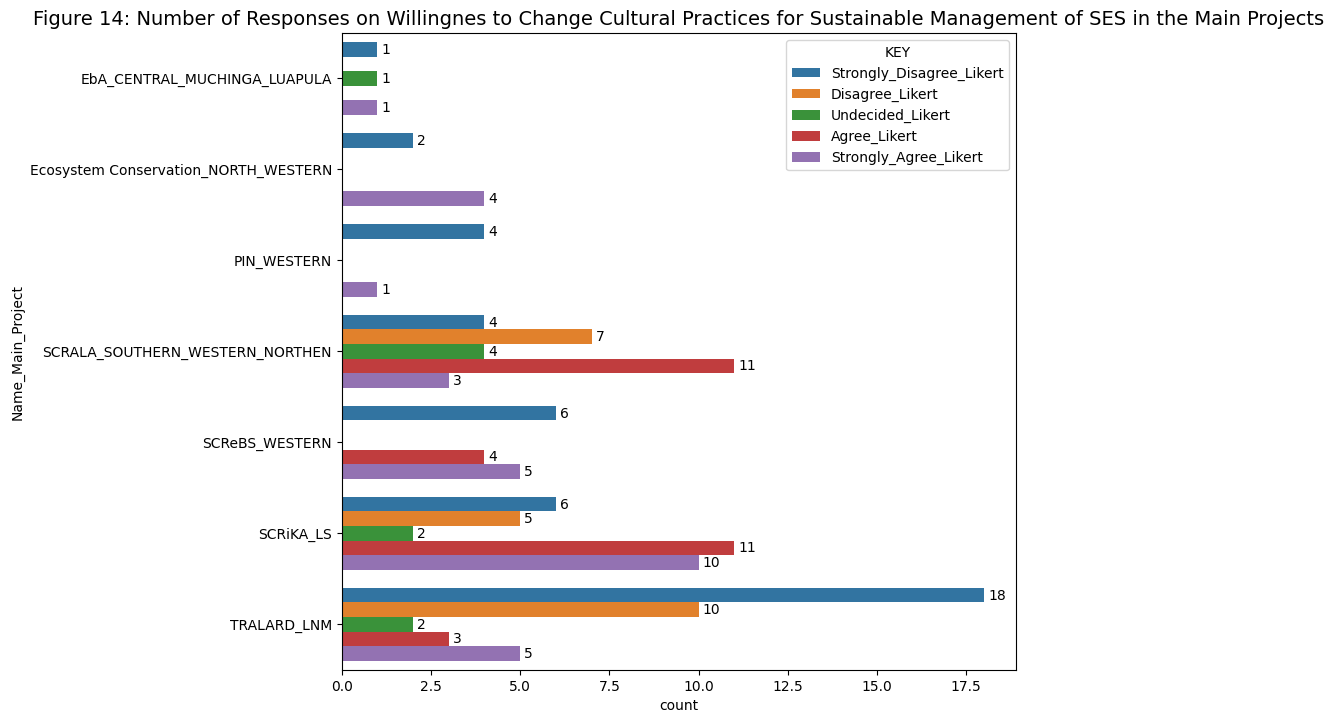

In [460]:
plt.figure(figsize=(8.7, 8.27))
hue_order = ["Strongly_Disagree_Likert", "Disagree_Likert", "Undecided_Likert", "Agree_Likert", "Strongly_Agree_Likert"]
ax = sns.barplot(data = CPC_grouped1, x="count", y="Name_Main_Project", hue="Cultural_Practices_Changed", hue_order=hue_order, legend=True)
ax.set_title("Figure 14: Number of Responses on Willingnes to Change Cultural Practices for Sustainable Management of SES in the Main Projects", fontsize=14)
plt.legend(title="KEY")
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", padding=3)
plt.show()

### 11.3 Main project and Cultural Aspects Considered

In [461]:
CAC_grouped = df2.groupby('Name_Main_Project')['Cultural_Aspects_Considered'].value_counts(dropna=False)

In [462]:
CAC_grouped1 = pd.DataFrame(CAC_grouped)

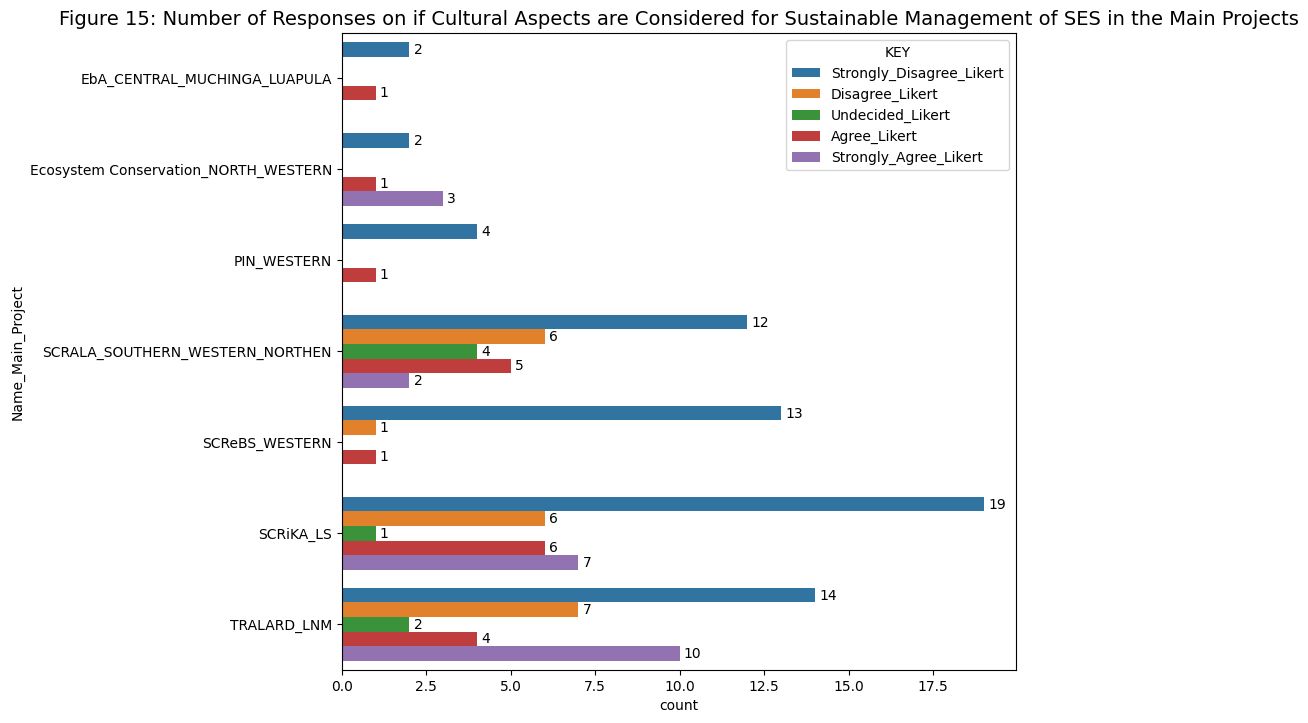

In [463]:
plt.figure(figsize=(8.7, 8.27))
hue_order = ["Strongly_Disagree_Likert", "Disagree_Likert", "Undecided_Likert", "Agree_Likert", "Strongly_Agree_Likert"]
ax = sns.barplot(data = CAC_grouped1, x="count", y="Name_Main_Project", hue="Cultural_Aspects_Considered", hue_order=hue_order, legend=True)
ax.set_title("Figure 15: Number of Responses on if Cultural Aspects are Considered for Sustainable Management of SES in the Main Projects", fontsize=14)
plt.legend(title="KEY")
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", padding=3)
plt.show()

In [464]:
agreement_levels = ["Agree_Likert", "Strongly_Agree_Likert"]
CAC_R = df2[df2["Cultural_Aspects_Considered"].isin(agreement_levels)]
CAC_R1 = CAC_R.drop(CPH_R.columns[[0,1,2,3,4,6,7,8,9,10,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34]], axis = 1)
CAC_R1grouped = CAC_R1.groupby('Name_Main_Project')['Cultural_Aspects_Considered']
CAC_R1

Name_Main_Project Cultural_Aspects_Considered  \
1                             TRALARD_LNM       Strongly_Agree_Likert   
3                             TRALARD_LNM       Strongly_Agree_Likert   
7                             TRALARD_LNM       Strongly_Agree_Likert   
11                            TRALARD_LNM       Strongly_Agree_Likert   
17                            TRALARD_LNM       Strongly_Agree_Likert   
21                            TRALARD_LNM       Strongly_Agree_Likert   
22                            TRALARD_LNM       Strongly_Agree_Likert   
23           EbA_CENTRAL_MUCHINGA_LUAPULA                Agree_Likert   
24                            TRALARD_LNM                Agree_Likert   
25                            TRALARD_LNM                Agree_Likert   
27                            TRALARD_LNM       Strongly_Agree_Likert   
28                            TRALARD_LNM       Strongly_Agree_Likert   
31                            TRALARD_LNM                Agree_Likert   
32                            TRALARD_LNM       Strongly_Agree_Likert   
33        SCRALA_SOUTHERN_WESTERN_NORTHEN       Strongly_Agree_Likert   
35        SCRALA_SOUTHERN_WESTERN_NORTHEN                Agree_Likert   
39        SCRALA_SOUTHERN_WESTERN_NORTHEN                Agree_Likert   
44        SCRALA_SOUTHERN_WESTERN_NORTHEN                Agree_Likert   
46        SCRALA_SOUTHERN_WESTERN_NORTHEN                Agree_Likert   
49                            TRALARD_LNM                Agree_Likert   
56   Ecosystem Conservation_NORTH_WESTERN       Strongly_Agree_Likert   
57   Ecosystem Conservation_NORTH_WESTERN       Strongly_Agree_Likert   
59   Ecosystem Conservation_NORTH_WESTERN                Agree_Likert   
66   Ecosystem Conservation_NORTH_WESTERN       Strongly_Agree_Likert   
68        SCRALA_SOUTHERN_WESTERN_NORTHEN                Agree_Likert   
70                              SCRiKA_LS       Strongly_Agree_Likert   
72                              SCRiKA_LS       Strongly_Agree_Likert   
75                              SCRiKA_LS                Agree_Likert   
76                              SCRiKA_LS                Agree_Likert   
79        SCRALA_SOUTHERN_WESTERN_NORTHEN       Strongly_Agree_Likert   
85                              SCRiKA_LS       Strongly_Agree_Likert   
92                              SCRiKA_LS                Agree_Likert   
93                              SCRiKA_LS                Agree_Likert   
94                              SCRiKA_LS                Agree_Likert   
95                              SCRiKA_LS                Agree_Likert   
100                             SCRiKA_LS       Strongly_Agree_Likert   
109                             SCRiKA_LS       Strongly_Agree_Likert   
110                             SCRiKA_LS       Strongly_Agree_Likert   
115                             SCRiKA_LS       Strongly_Agree_Likert   
141                        SCReBS_WESTERN                Agree_Likert   
146                           PIN_WESTERN                Agree_Likert   

                                                                                                                                                                                    Cultural_Aspects_Considered_Reasons  
1                                                                                                                                    There is need to have power in what is being formulated so that there is ownership  
3                                                                                                                                             At the time of getting the land for the project it comes with regulations  
7                                                                                                                                         There are rules that along the river banks, the trees do not need to cut down  
11                                                                                   

In [465]:
lemmatizer=WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
for index, row in CAC_R1.iterrows():
    CAC_R1_filter_sentence = []
    CAC_R1_sentence = row["Cultural_Aspects_Considered_Reasons"]
    if pd.isnull(CAC_R1_sentence):
       continue
    CAC_R1_sentence_cleaned = re.sub(r'[^\w\s]','',CAC_R1_sentence)
    CAC_R1_words = nltk.word_tokenize(CAC_R1_sentence_cleaned)
    CAC_R1_words = [lemmatizer.lemmatize(w) for w in CAC_R1_words if w.lower() not in stop_words]
    CAC_R1_filter_sentence.extend(CAC_R1_words)
    print(CAC_R1_filter_sentence)

['need', 'power', 'formulated', 'ownership']
['time', 'getting', 'land', 'project', 'come', 'regulation']
['rule', 'along', 'river', 'bank', 'tree', 'need', 'cut']
['sometimes', 'give', 'Chiefs', 'harvest', 'collect', 'produce', 'accounted']
['nothing', 'thing', 'ended', 'long', 'time', 'ago', 'Chiefs', 'would', 'talk', 'spirit', 'protect', 'land']
['included']
['customary', 'practice', 'natural', 'resource', 'get', 'destroyed']
['answer']
['answer']
['done', 'product', 'project', 'work', 'well']
['follow', 'customary', 'practice', 'people', 'burn', 'late', 'inorder']
['livelihood', 'improve']
['follow', 'historical', 'practice', 'forefather']
['cultural', 'practice', 'spririal', 'rite', 'done', 'traditional', 'authority']
['accessing', 'land', 'traditional', 'authority', 'also', 'give', 'instruction', 'put', 'livelihood', 'close', 'water', 'source', 'resource']
['project', 'operate', 'without', 'consulting', 'traditional', 'authority']
['answer']
['Sometimes', 'discus', 'locally', 'an

In [466]:
agreement_levels = ["Disagree_Likert", "Strongly_Disagree_Likert"]
CAC_R2 = df2[df2["Cultural_Aspects_Considered"].isin(agreement_levels)]
CAC_R3 = CAC_R2.drop(CPH_R2.columns[[0,1,2,3,4,6,7,8,9,10,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34]], axis = 1)
CAC_R3grouped = CAC_R3.groupby('Name_Main_Project')['Cultural_Aspects_Considered']
CAC_R3

Name_Main_Project Cultural_Aspects_Considered  \
0                             TRALARD_LNM    Strongly_Disagree_Likert   
2                             TRALARD_LNM    Strongly_Disagree_Likert   
4                             TRALARD_LNM    Strongly_Disagree_Likert   
5                             TRALARD_LNM    Strongly_Disagree_Likert   
6                             TRALARD_LNM    Strongly_Disagree_Likert   
8                             TRALARD_LNM    Strongly_Disagree_Likert   
9                             TRALARD_LNM    Strongly_Disagree_Likert   
10                            TRALARD_LNM    Strongly_Disagree_Likert   
12                            TRALARD_LNM    Strongly_Disagree_Likert   
13                            TRALARD_LNM    Strongly_Disagree_Likert   
14                            TRALARD_LNM    Strongly_Disagree_Likert   
15                            TRALARD_LNM    Strongly_Disagree_Likert   
18                            TRALARD_LNM             Disagree_Likert   
19                            TRALARD_LNM    Strongly_Disagree_Likert   
20                            TRALARD_LNM    Strongly_Disagree_Likert   
29           EbA_CENTRAL_MUCHINGA_LUAPULA    Strongly_Disagree_Likert   
30           EbA_CENTRAL_MUCHINGA_LUAPULA    Strongly_Disagree_Likert   
34        SCRALA_SOUTHERN_WESTERN_NORTHEN    Strongly_Disagree_Likert   
36        SCRALA_SOUTHERN_WESTERN_NORTHEN             Disagree_Likert   
37                            TRALARD_LNM             Disagree_Likert   
38        SCRALA_SOUTHERN_WESTERN_NORTHEN             Disagree_Likert   
41        SCRALA_SOUTHERN_WESTERN_NORTHEN             Disagree_Likert   
42        SCRALA_SOUTHERN_WESTERN_NORTHEN             Disagree_Likert   
45        SCRALA_SOUTHERN_WESTERN_NORTHEN             Disagree_Likert   
47                            TRALARD_LNM             Disagree_Likert   
50                            TRALARD_LNM             Disagree_Likert   
52                            TRALARD_LNM             Disagree_Likert   
53                            TRALARD_LNM             Disagree_Likert   
55                            TRALARD_LNM             Disagree_Likert   
58   Ecosystem Conservation_NORTH_WESTERN    Strongly_Disagree_Likert   
62   Ecosystem Conservation_NORTH_WESTERN    Strongly_Disagree_Likert   
67        SCRALA_SOUTHERN_WESTERN_NORTHEN    Strongly_Disagree_Likert   
71                              SCRiKA_LS    Strongly_Disagree_Likert   
74                              SCRiKA_LS    Strongly_Disagree_Likert   
77                              SCRiKA_LS    Strongly_Disagree_Likert   
80        SCRALA_SOUTHERN_WESTERN_NORTHEN    Strongly_Disagree_Likert   
81        SCRALA_SOUTHERN_WESTERN_NORTHEN             Disagree_Likert   
82                              SCRiKA_LS    Strongly_Disagree_Likert   
83                              SCRiKA_LS    Strongly_Disagree_Likert   
87                              SCRiKA_LS             Disagree_Likert   
88                              SCRiKA_LS             Disagree_Likert   
89                              SCRiKA_LS    Strongly_Disagree_Likert   
90                              SCRiKA_LS    Strongly_Disagree_Likert   
91                              SCRiKA_LS    Strongly_Disagree_Likert   
96                              SCRiKA_LS    Strongly_Disagree_Likert   
97                              SCRiKA_LS    Strongly_Disagree_Likert   
98                              SCRiKA_LS    Strongly_Disagree_Likert   
102                             SCRiKA_LS             Disagree_Likert   
103                             SCRiKA_LS             Disagree_Likert   
104                             SCRiKA_LS    Strongly_Disagree_Likert   
105                             SCRiKA_LS             Disagree_Likert   
106                             SCRiKA_LS    Strongly_Disagree_Likert   
107                             SCRiKA_LS    Strongly_Disagree_Likert   
108                             SCRiKA_LS    Strongly_Disagree_Likert   
112      

In [467]:
lemmatizer=WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
for index, row in CAC_R3.iterrows():
    CAC_R3_filter_sentence = []
    CAC_R3_sentence = row["Cultural_Aspects_Considered_Reasons"]
    if pd.isnull(CAC_R3_sentence):
       continue
    CAC_R3_sentence_cleaned = re.sub(r'[^\w\s]','',CAC_R3_sentence)
    CAC_R3_words = nltk.word_tokenize(CAC_R3_sentence_cleaned)
    CAC_R3_words = [lemmatizer.lemmatize(w) for w in CAC_R3_words if w.lower() not in stop_words]
    CAC_R3_filter_sentence.extend(CAC_R3_words)
    print(CAC_R3_filter_sentence)

['cultural', 'history', 'area']
['cultural', 'aspect']
['follow', 'chief', 'government', 'say']
['nothing']
['nothing']
['nothing']
['nothing']
['plan', 'given', 'u', 'TRALARD', 'consideration', 'cultural', 'history', 'formulating', 'project']
['nothing']
['moment', 'follow', 'law', 'government', 'cultural', 'norm']
['nothing']
['ask', 'headman', 'give', 'u', 'place', 'keep', 'goat', 'place', 'acceptable', 'traditional', 'law']
['nothing', 'moment', 'traditional', 'leader', 'spritual', 'activity', 'project']
['include', 'cultural', 'practice']
['project', 'move', 'well', 'headman', 'project', 'otherwise', 'included', 'might', 'problem']
['available']
['consider']
['nothing']
['nothing']
[]
['nothing']
[]
['unneccesary']
['anything']
[]
['nothing']
['include']
[]
['nothing']
['include', 'aspect']
['nothing']
['nothing', 'included']
['Nothing', 'considered']
['nothing']
[]
['Nothing', 'considered']
['nothing']
['included']
['include']
['nothing', 'included']
['nothing']
['included']
['No

### 11.4 Main Project and Measure of Indicators

In [468]:
MI_grouped = df2.groupby('Name_Main_Project')['Measure_Indicators'].value_counts(dropna=False)

In [469]:
MI_grouped1 = pd.DataFrame(MI_grouped)

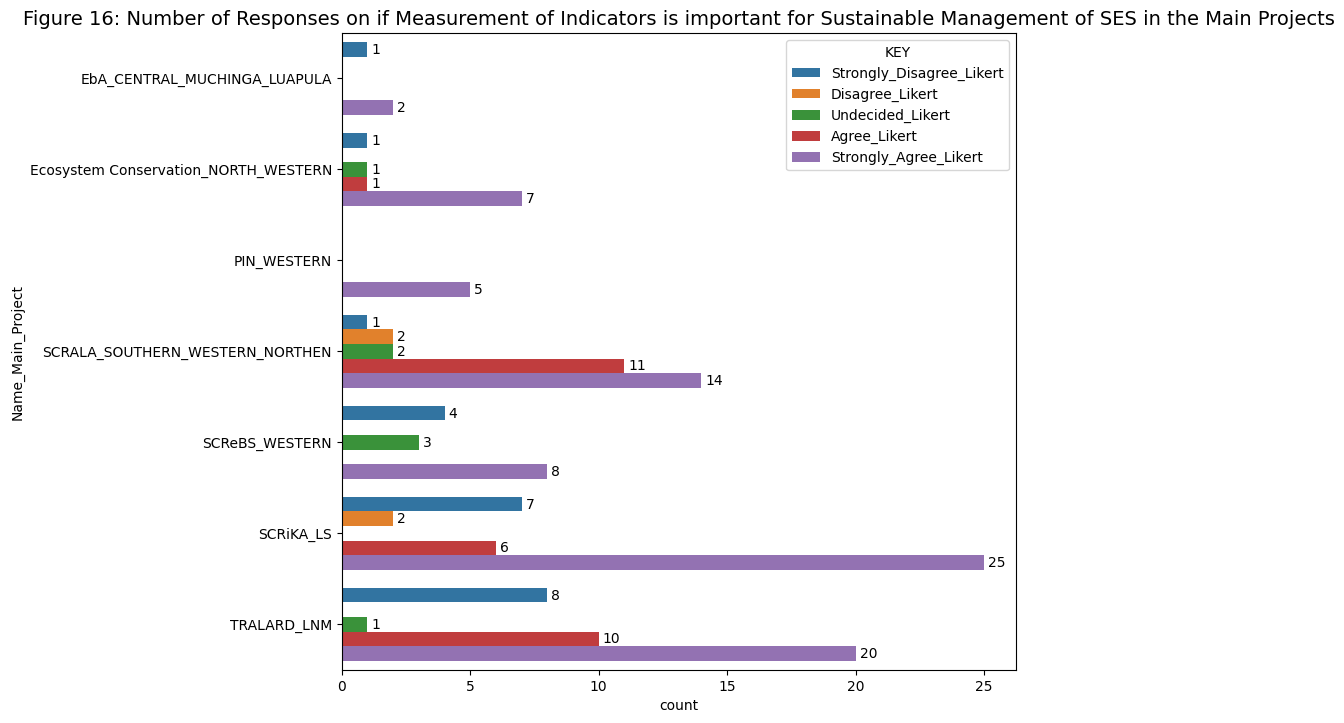

In [470]:
plt.figure(figsize=(8.7, 8.27))
hue_order = ["Strongly_Disagree_Likert", "Disagree_Likert", "Undecided_Likert", "Agree_Likert", "Strongly_Agree_Likert"]
ax = sns.barplot(data = MI_grouped1, x="count", y="Name_Main_Project", hue="Measure_Indicators", hue_order=hue_order, legend=True)
ax.set_title("Figure 16: Number of Responses on if Measurement of Indicators is important for Sustainable Management of SES in the Main Projects", fontsize=14)
plt.legend(title="KEY")
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", padding=3)
plt.show()

### 11.5 Main Project and Livelihood Dependent

In [471]:
LD_grouped = df2.groupby('Name_Main_Project')['Livilihood_Depenedent'].value_counts(dropna=False)

In [472]:
LD_grouped1 = pd.DataFrame(LD_grouped)

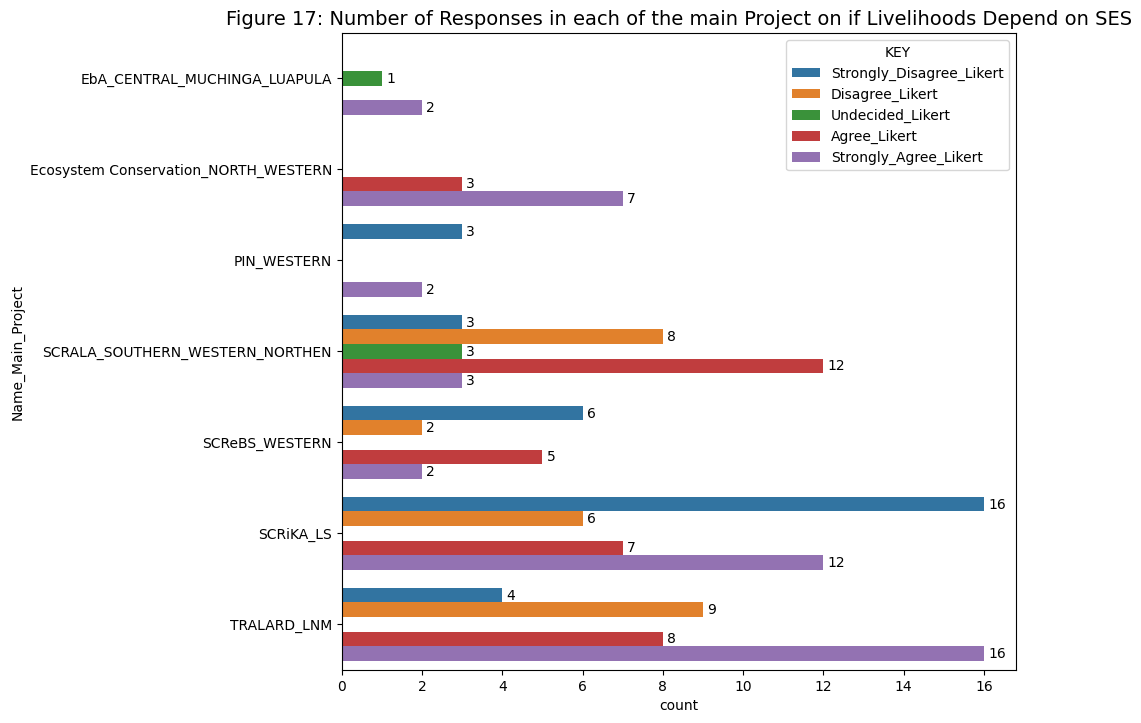

In [473]:
plt.figure(figsize=(8.7, 8.27))
hue_order = ["Strongly_Disagree_Likert", "Disagree_Likert", "Undecided_Likert", "Agree_Likert", "Strongly_Agree_Likert"]
ax = sns.barplot(data = LD_grouped1, x="count", y="Name_Main_Project", hue="Livilihood_Depenedent", hue_order=hue_order, legend=True)
ax.set_title("Figure 17: Number of Responses in each of the main Project on if Livelihoods Depend on SES", fontsize=14)
plt.legend(title="KEY")
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", padding=3)
plt.show()

### 11.6 Main Project and Livelihood Changed

In [474]:
CL_grouped = df2.groupby('Name_Main_Project')['Change_Livelihood'].value_counts(dropna=False)

In [475]:
CL_grouped1 = pd.DataFrame(CL_grouped)

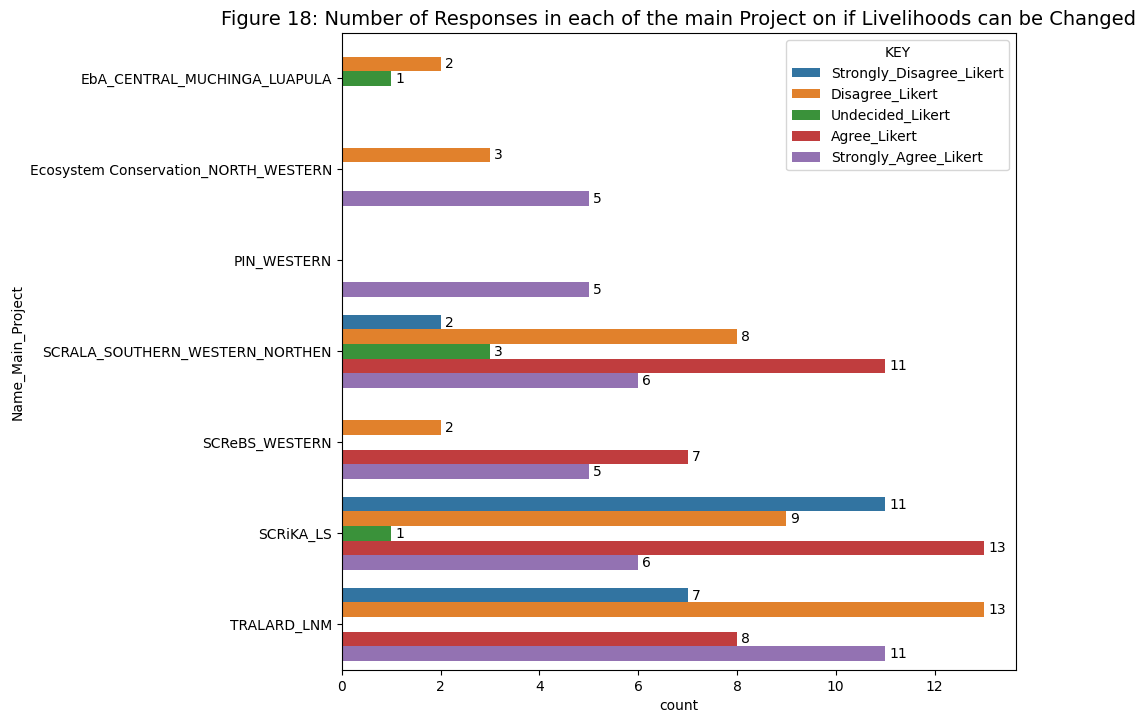

In [476]:
plt.figure(figsize=(8.7, 8.27))
hue_order = ["Strongly_Disagree_Likert", "Disagree_Likert", "Undecided_Likert", "Agree_Likert", "Strongly_Agree_Likert"]
ax = sns.barplot(data = CL_grouped1, x="count", y="Name_Main_Project", hue="Change_Livelihood", hue_order=hue_order, legend=True)
ax.set_title("Figure 18: Number of Responses in each of the main Project on if Livelihoods can be Changed", fontsize=14)
plt.legend(title="KEY")
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", padding=3)
plt.show()

### 11.7 Main Project and Livelihood Changing Easy

In [477]:
CLE_grouped = df2.groupby('Name_Main_Project')['Change_Livelihood_Easy'].value_counts(dropna=False)

In [478]:
CLE_grouped1 = pd.DataFrame(CLE_grouped)

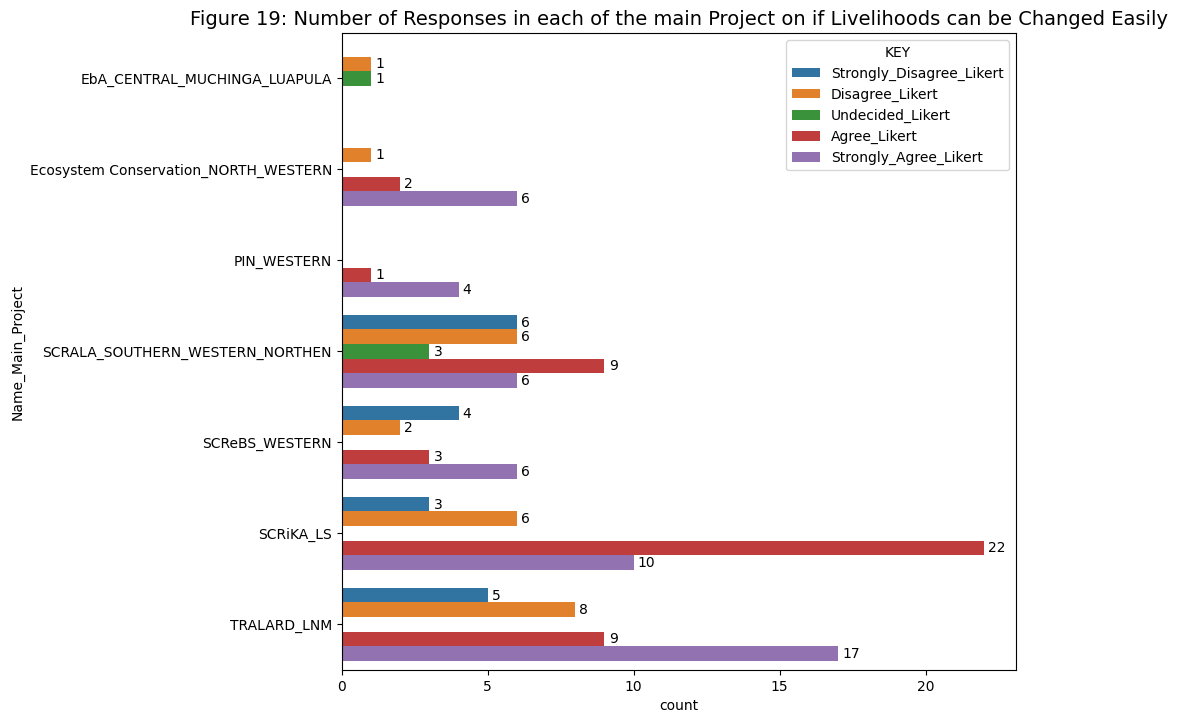

In [479]:
plt.figure(figsize=(8.7, 8.27))
hue_order = ["Strongly_Disagree_Likert", "Disagree_Likert", "Undecided_Likert", "Agree_Likert", "Strongly_Agree_Likert"]
ax = sns.barplot(data = CLE_grouped1, x="count", y="Name_Main_Project", hue="Change_Livelihood_Easy", hue_order=hue_order, legend=True)
ax.set_title("Figure 19: Number of Responses in each of the main Project on if Livelihoods can be Changed Easily", fontsize=14)
plt.legend(title="KEY")
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", padding=3)
plt.show()

In [480]:
agreement_levels = ["Agree_Likert", "Strongly_Agree_Likert"]
CLE_R = df2[df2["Change_Livelihood_Easy"].isin(agreement_levels)]
CLE_R1 = CLE_R.drop(CLE_R.columns[[0,1,2,3,4,6,7,8,9,10,11,12,13,14,15,16,17,18,19,22,23,24,25,26,27,28,29,30,31,32,33,34]], axis = 1)
CLE_R1grouped = CLE_R1.groupby('Name_Main_Project')['Change_Livelihood_Easy']
CLE_R1

Name_Main_Project Change_Livelihood_Easy  \
0                             TRALARD_LNM  Strongly_Agree_Likert   
1                             TRALARD_LNM  Strongly_Agree_Likert   
2                             TRALARD_LNM           Agree_Likert   
4                             TRALARD_LNM  Strongly_Agree_Likert   
5                             TRALARD_LNM  Strongly_Agree_Likert   
6                             TRALARD_LNM  Strongly_Agree_Likert   
7                             TRALARD_LNM  Strongly_Agree_Likert   
8                             TRALARD_LNM  Strongly_Agree_Likert   
9                             TRALARD_LNM  Strongly_Agree_Likert   
11                            TRALARD_LNM  Strongly_Agree_Likert   
12                            TRALARD_LNM  Strongly_Agree_Likert   
13                            TRALARD_LNM  Strongly_Agree_Likert   
14                            TRALARD_LNM  Strongly_Agree_Likert   
15                            TRALARD_LNM  Strongly_Agree_Likert   
17                            TRALARD_LNM  Strongly_Agree_Likert   
21                            TRALARD_LNM  Strongly_Agree_Likert   
22                            TRALARD_LNM  Strongly_Agree_Likert   
25                            TRALARD_LNM           Agree_Likert   
26                            TRALARD_LNM           Agree_Likert   
27                            TRALARD_LNM           Agree_Likert   
32                            TRALARD_LNM  Strongly_Agree_Likert   
33        SCRALA_SOUTHERN_WESTERN_NORTHEN  Strongly_Agree_Likert   
35        SCRALA_SOUTHERN_WESTERN_NORTHEN           Agree_Likert   
38        SCRALA_SOUTHERN_WESTERN_NORTHEN           Agree_Likert   
39        SCRALA_SOUTHERN_WESTERN_NORTHEN           Agree_Likert   
40        SCRALA_SOUTHERN_WESTERN_NORTHEN           Agree_Likert   
41        SCRALA_SOUTHERN_WESTERN_NORTHEN  Strongly_Agree_Likert   
42        SCRALA_SOUTHERN_WESTERN_NORTHEN           Agree_Likert   
43        SCRALA_SOUTHERN_WESTERN_NORTHEN           Agree_Likert   
44        SCRALA_SOUTHERN_WESTERN_NORTHEN           Agree_Likert   
46        SCRALA_SOUTHERN_WESTERN_NORTHEN           Agree_Likert   
47                            TRALARD_LNM           Agree_Likert   
49                            TRALARD_LNM           Agree_Likert   
51                            TRALARD_LNM           Agree_Likert   
52                            TRALARD_LNM           Agree_Likert   
53                            TRALARD_LNM           Agree_Likert   
56   Ecosystem Conservation_NORTH_WESTERN  Strongly_Agree_Likert   
57   Ecosystem Conservation_NORTH_WESTERN  Strongly_Agree_Likert   
58   Ecosystem Conservation_NORTH_WESTERN           Agree_Likert   
59   Ecosystem Conservation_NORTH_WESTERN           Agree_Likert   
62   Ecosystem Conservation_NORTH_WESTERN  Strongly_Agree_Likert   
63   Ecosystem Conservation_NORTH_WESTERN  Strongly_Agree_Likert   
65   Ecosystem Conservation_NORTH_WESTERN  Strongly_Agree_Likert   
66   Ecosystem Conservation_NORTH_WESTERN  Strongly_Agree_Likert   
70                              SCRiKA_LS  Strongly_Agree_Likert   
71                              SCRiKA_LS           Agree_Likert   
72                              SCRiKA_LS           Agree_Likert   
74                              SCRiKA_LS           Agree_Likert   
75                              SCRiKA_LS           Agree_Likert   
76                              SCRiKA_LS  Strongly_Agree_Likert   
77                              SCRiKA_LS           Agree_Likert   
79        SCRALA_SOUTHERN_WESTERN_NORTHEN  Strongly_Agree_Likert   
80        SCRALA_SOUTHERN_WESTERN_NORTHEN  Strongly_Agree_Likert   
82                              SCRiKA_LS  Strongly_Agree_Likert   
83                              SCRiKA_LS           Agree_Likert   
85                              SCRiKA_LS           Agree_Likert   
86                              SCRiKA_LS  Strongly_Agree_Likert   
87                              SCRiKA_LS           Agree_Likert   
88          

In [481]:
lemmatizer=WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
for index, row in CLE_R1.iterrows():
    CLE_R1_filter_sentence = []
    CLE_R1_sentence = row["Change_Livelihood_Easy_Reasons"]
    if pd.isnull(CLE_R1_sentence):
       continue
    CLE_R1_sentence_cleaned = re.sub(r'[^\w\s]','',CLE_R1_sentence)
    CLE_R1_words = nltk.word_tokenize(CLE_R1_sentence_cleaned)
    CLE_R1_words = [lemmatizer.lemmatize(w) for w in CLE_R1_words if w.lower() not in stop_words]
    CLE_R1_filter_sentence.extend(CLE_R1_words)
    print(CLE_R1_filter_sentence)

['SES', 'taken', 'care', 'increase', 'number', 'bring', 'income']
['SeS', 'depleted', 'thus', 'need', 'change', 'agriculture', 'like', 'goat', 'rearing']
['Change', 'easier', 'one', 'decides', 'change']
['thing', 'like', 'climate', 'change', 'affecting', 'u', 'thus', 'thought', 'change']
['new', 'improvement', 'like', 'cooking', 'stove', 'change', 'way', 'livelihood']
['destruction', 'SES']
['need', 'change', 'cutting', 'activity']
['need', 'change', 'activity', 'destroy', 'environment']
['changed', 'learning']
['kept', 'well', 'project', 'like', 'chicken', 'goat', 'would', 'help', 'depend', 'natural', 'resource']
['fish', 'pond', 'project']
['also', 'improve', 'livelihood', 'future']
['long', 'money', 'livelihood']
['want', 'venture', 'farming', 'reason', 'shifted', 'place', 'located']
['sub', 'project', 'bee', 'keeping', 'disturbed', 'late', 'burning', 'early', 'burning', 'disturb', 'fire', 'much']
['need', 'change', 'instance', 'depend', 'water', 'Lulimala', 'river', 'dry', 'get', '

In [482]:
agreement_levels = ["Disagree_Likert", "Strongly_Disagree_Likert"]
CLE_R2 = df2[df2["Change_Livelihood_Easy"].isin(agreement_levels)]
CLE_R3 = CLE_R2.drop(CLE_R2.columns[[0,1,2,3,4,6,7,8,9,10,11,12,13,14,15,16,17,18,19,22,23,24,25,26,27,28,29,30,31,32,33,34]], axis = 1)
CLE_R3grouped = CLE_R3.groupby('Name_Main_Project')['Change_Livelihood_Easy']
CLE_R3

Name_Main_Project    Change_Livelihood_Easy  \
3                             TRALARD_LNM  Strongly_Disagree_Likert   
10                            TRALARD_LNM  Strongly_Disagree_Likert   
16                            TRALARD_LNM  Strongly_Disagree_Likert   
18                            TRALARD_LNM  Strongly_Disagree_Likert   
19                            TRALARD_LNM           Disagree_Likert   
20                            TRALARD_LNM           Disagree_Likert   
23           EbA_CENTRAL_MUCHINGA_LUAPULA           Disagree_Likert   
24                            TRALARD_LNM           Disagree_Likert   
28                            TRALARD_LNM  Strongly_Disagree_Likert   
31                            TRALARD_LNM           Disagree_Likert   
36        SCRALA_SOUTHERN_WESTERN_NORTHEN           Disagree_Likert   
37                            TRALARD_LNM           Disagree_Likert   
45        SCRALA_SOUTHERN_WESTERN_NORTHEN  Strongly_Disagree_Likert   
50                            TRALARD_LNM           Disagree_Likert   
54                            TRALARD_LNM           Disagree_Likert   
55                            TRALARD_LNM           Disagree_Likert   
64   Ecosystem Conservation_NORTH_WESTERN           Disagree_Likert   
68        SCRALA_SOUTHERN_WESTERN_NORTHEN           Disagree_Likert   
69        SCRALA_SOUTHERN_WESTERN_NORTHEN           Disagree_Likert   
78        SCRALA_SOUTHERN_WESTERN_NORTHEN  Strongly_Disagree_Likert   
81        SCRALA_SOUTHERN_WESTERN_NORTHEN           Disagree_Likert   
96                              SCRiKA_LS           Disagree_Likert   
103                             SCRiKA_LS  Strongly_Disagree_Likert   
106                             SCRiKA_LS           Disagree_Likert   
107                             SCRiKA_LS           Disagree_Likert   
108                             SCRiKA_LS           Disagree_Likert   
109                             SCRiKA_LS           Disagree_Likert   
112                             SCRiKA_LS           Disagree_Likert   
115                             SCRiKA_LS  Strongly_Disagree_Likert   
117                             SCRiKA_LS  Strongly_Disagree_Likert   
119       SCRALA_SOUTHERN_WESTERN_NORTHEN           Disagree_Likert   
120       SCRALA_SOUTHERN_WESTERN_NORTHEN  Strongly_Disagree_Likert   
121       SCRALA_SOUTHERN_WESTERN_NORTHEN           Disagree_Likert   
122                        SCReBS_WESTERN           Disagree_Likert   
124       SCRALA_SOUTHERN_WESTERN_NORTHEN  Strongly_Disagree_Likert   
126       SCRALA_SOUTHERN_WESTERN_NORTHEN  Strongly_Disagree_Likert   
127                        SCReBS_WESTERN  Strongly_Disagree_Likert   
128                        SCReBS_WESTERN  Strongly_Disagree_Likert   
129                        SCReBS_WESTERN  Strongly_Disagree_Likert   
131                        SCReBS_WESTERN  Strongly_Disagree_Likert   
136       SCRALA_SOUTHERN_WESTERN_NORTHEN  Strongly_Disagree_Likert   
139                        SCReBS_WESTERN           Disagree_Likert   

                                                                                                                                                                                                                                  Change_Livelihood_Easy_Reasons  
3                                                                                                                                                                                                                            Because my livelihood would improve  
10                                                                                                                                                           Because everything we use comes from natural resources like tree for building, animals for proteins  
16                                                                                                                                                                                               

In [483]:
lemmatizer=WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
for index, row in CLE_R3.iterrows():
    CLE_R3_filter_sentence = []
    CLE_R3_sentence = row["Change_Livelihood_Easy_Reasons"]
    if pd.isnull(CLE_R3_sentence):
       continue
    CLE_R3_sentence_cleaned = re.sub(r'[^\w\s]','',CLE_R3_sentence)
    CLE_R3_words = nltk.word_tokenize(CLE_R3_sentence_cleaned)
    CLE_R3_words = [lemmatizer.lemmatize(w) for w in CLE_R3_words if w.lower() not in stop_words]
    CLE_R3_filter_sentence.extend(CLE_R3_words)
    print(CLE_R3_filter_sentence)

['livelihood', 'would', 'improve']
['everything', 'use', 'come', 'natural', 'resource', 'like', 'tree', 'building', 'animal', 'protein']
['source', 'income']
['assist', 'adequate', 'water', 'tree', 'cut', 'well', 'future', 'general', 'see', 'natural', 'resource']
['world', 'becoming', 'mordenised', 'thus', 'need', 'adapt', 'current', 'status']
['Thats', 'income', 'come']
['depend', 'natural', 'resource', 'thus', 'changing', 'easy']
['use', 'natural', 'resource']
['depend', 'agriculture', 'natural', 'resource', 'like', 'forest']
['mostly', 'use', 'goat', 'pig', 'livelihood']
['livelihood', 'engage', 'keeping', 'goat', 'fish', 'farming']
['livelihood', 'like', 'keeping', 'goat', 'chicken', 'gardening', 'hiring', 'wedding', 'dress']
['use', 'domesticated', 'animal']
['use']
['thing', 'learning', 'already']
['money', 'protection', 'environment', 'yet', 'money', 'carbon', 'trade', 'waiting', 'long', 'time']
['used']
['changing', 'another', 'lifestyle', 'mean', 'starting', 'new', 'life']
['c

### 11.8 Main Project and Ecosystem Service Reduction

In [484]:
ESR_grouped = df2.groupby('Name_Main_Project')['Ecosystem_Services_Reduced'].value_counts(dropna=False)

In [485]:
ESR_grouped1 = pd.DataFrame(ESR_grouped)

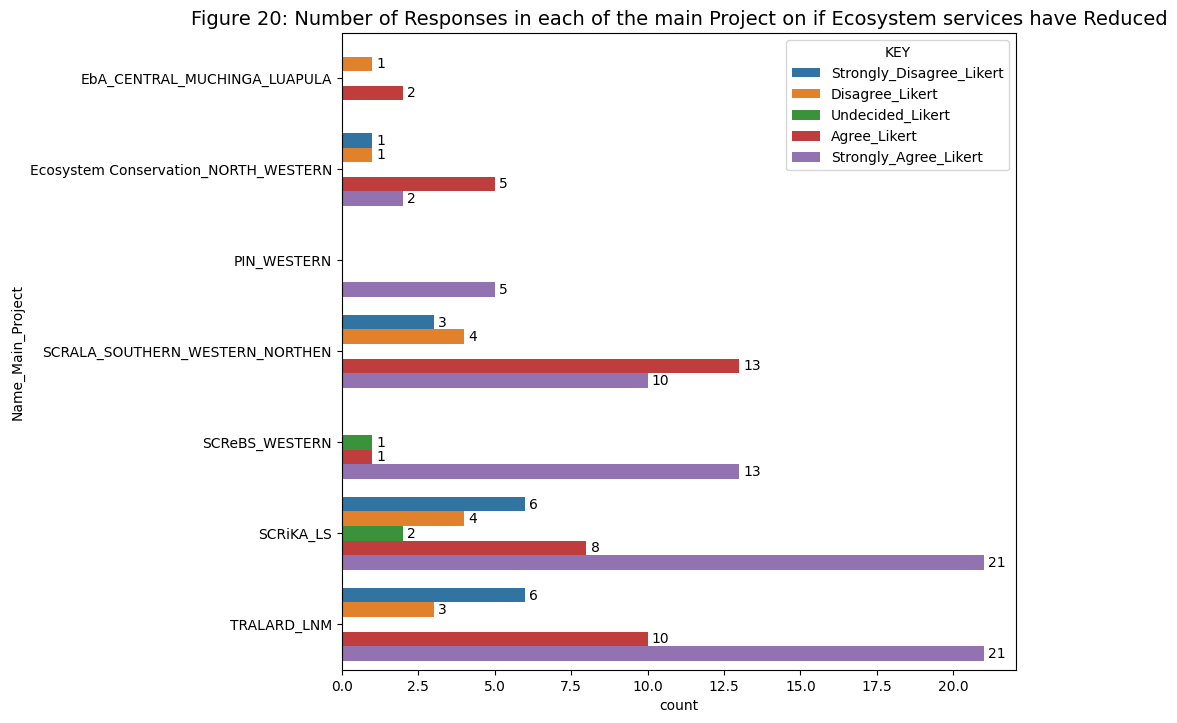

In [486]:
plt.figure(figsize=(8.7, 8.27))
hue_order = ["Strongly_Disagree_Likert", "Disagree_Likert", "Undecided_Likert", "Agree_Likert", "Strongly_Agree_Likert"]
ax = sns.barplot(data = ESR_grouped1, x="count", y="Name_Main_Project", hue="Ecosystem_Services_Reduced", hue_order=hue_order, legend=True)
ax.set_title("Figure 20: Number of Responses in each of the main Project on if Ecosystem services have Reduced", fontsize=14)
plt.legend(title="KEY")
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", padding=3)
plt.show()

### 11.9 Main project and Deforestation Increase

In [487]:
DI_grouped = df2.groupby('Name_Main_Project')['Deforestaion_Increased'].value_counts(dropna=False)

In [488]:
DI_grouped1 = pd.DataFrame(DI_grouped)

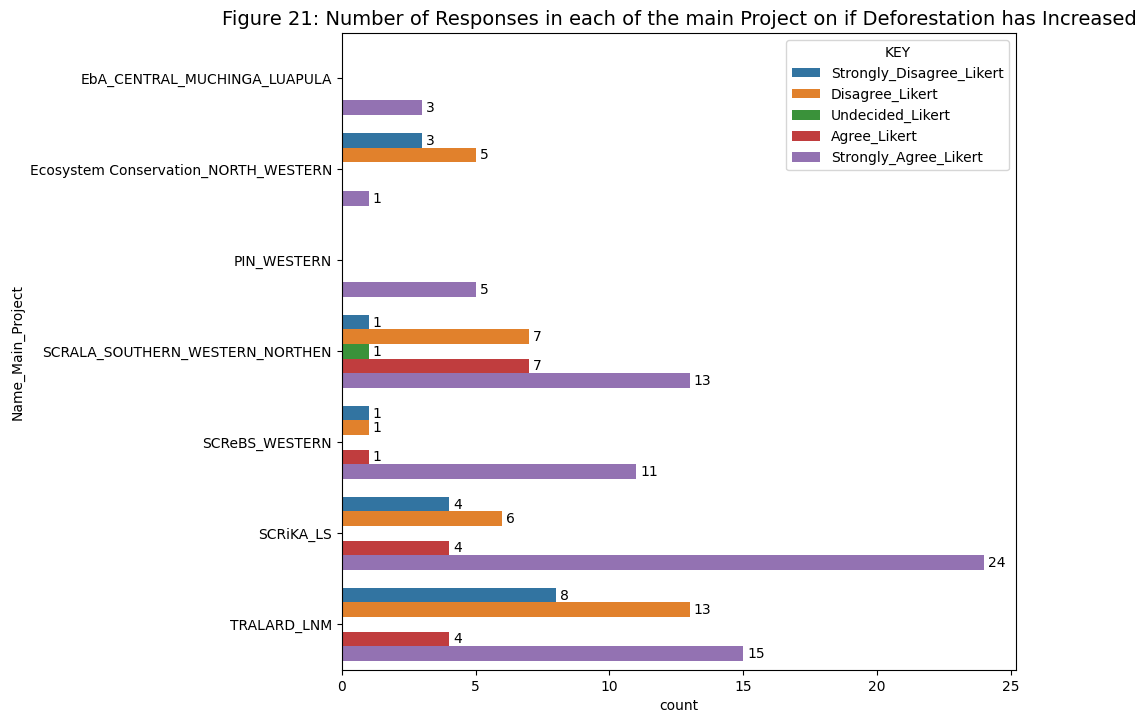

In [489]:
plt.figure(figsize=(8.7, 8.27))
hue_order = ["Strongly_Disagree_Likert", "Disagree_Likert", "Undecided_Likert", "Agree_Likert", "Strongly_Agree_Likert"]
ax = sns.barplot(data = DI_grouped1, x="count", y="Name_Main_Project", hue="Deforestaion_Increased", hue_order=hue_order, legend=True)
ax.set_title("Figure 21: Number of Responses in each of the main Project on if Deforestation has Increased", fontsize=14)
plt.legend(title="KEY")
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", padding=3)
plt.show()

### 11.10 Main project and Protected Areas as a Hinderance

In [490]:
PAHL_grouped = df2.groupby('Name_Main_Project')['Protected_Areas_Hinderarnce_Livelihood'].value_counts(dropna=False)

In [491]:
PAHL_grouped1 = pd.DataFrame(PAHL_grouped)

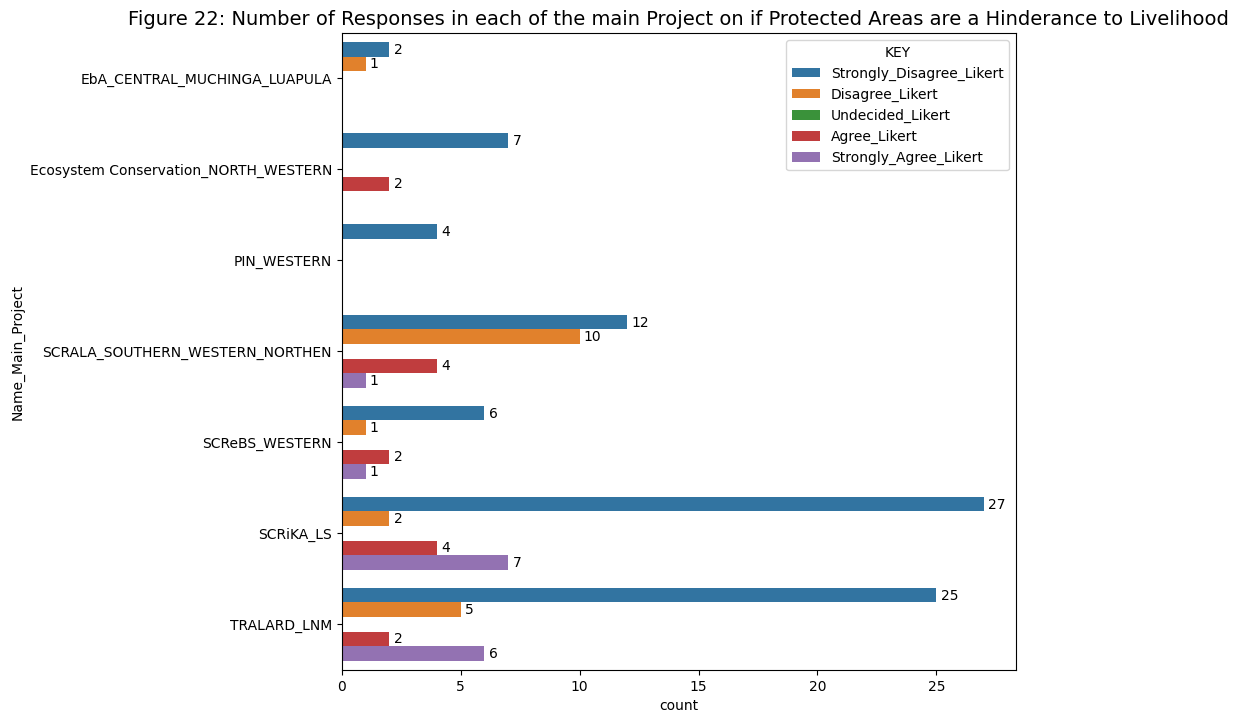

In [492]:
plt.figure(figsize=(8.7, 8.27))
hue_order = ["Strongly_Disagree_Likert", "Disagree_Likert", "Undecided_Likert", "Agree_Likert", "Strongly_Agree_Likert"]
ax = sns.barplot(data = PAHL_grouped1, x="count", y="Name_Main_Project", hue="Protected_Areas_Hinderarnce_Livelihood", hue_order=hue_order, legend=True)
ax.set_title("Figure 22: Number of Responses in each of the main Project on if Protected Areas are a Hinderance to Livelihood", fontsize=14)
plt.legend(title="KEY")
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", padding=3)
plt.show()

### 11.11 Main Project and New Livelihood Projects

In [493]:
NLP_grouped = df2.groupby('Name_Main_Project')['New_Livelihood_Projects'].value_counts(dropna=False)

In [494]:
NLP_grouped1 = pd.DataFrame(NLP_grouped)

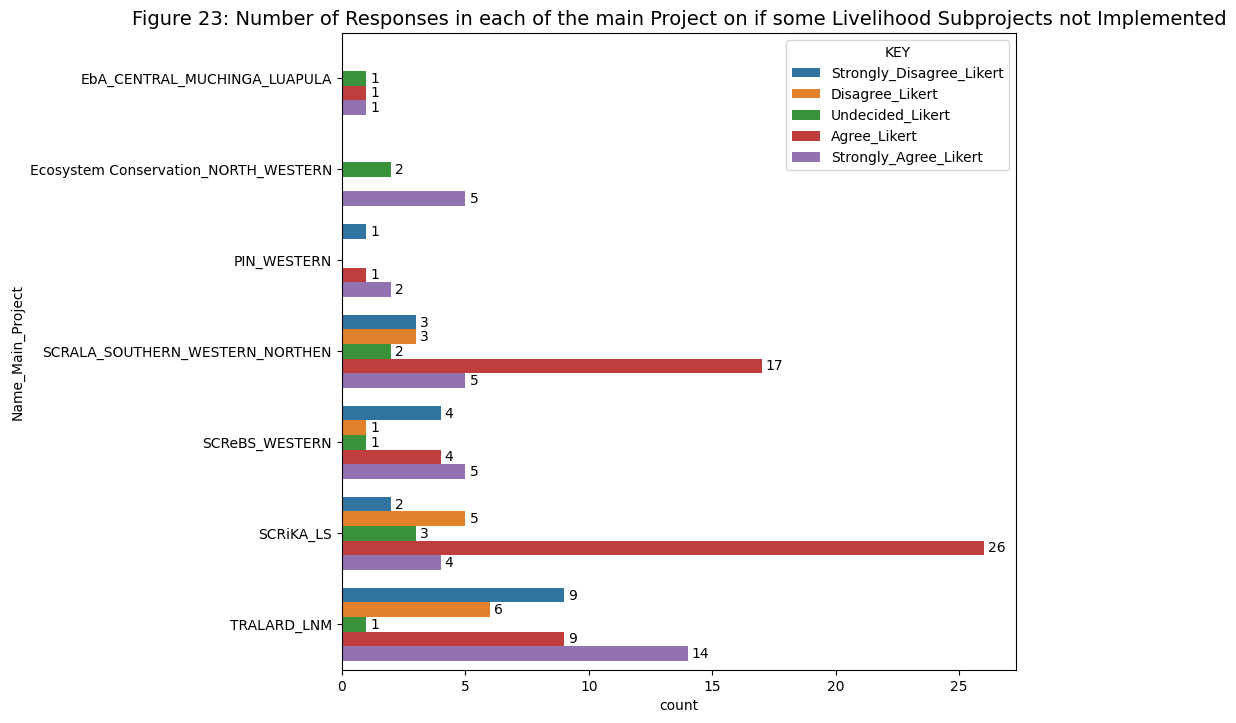

In [495]:
plt.figure(figsize=(8.7, 8.27))
hue_order = ["Strongly_Disagree_Likert", "Disagree_Likert", "Undecided_Likert", "Agree_Likert", "Strongly_Agree_Likert"]
ax = sns.barplot(data = NLP_grouped1, x="count", y="Name_Main_Project", hue="New_Livelihood_Projects", hue_order=hue_order, legend=True)
ax.set_title("Figure 23: Number of Responses in each of the main Project on if some Livelihood Subprojects not Implemented", fontsize=14)
plt.legend(title="KEY")
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", padding=3)
plt.show()

### 11.12 Main Project and Sustainability of Subprojects

In [496]:
SSC_grouped = df2.groupby('Name_Main_Project')['Subprojects_Sustainability_Contribution'].value_counts(dropna=False)

In [497]:
SSC_grouped1 = pd.DataFrame(SSC_grouped)

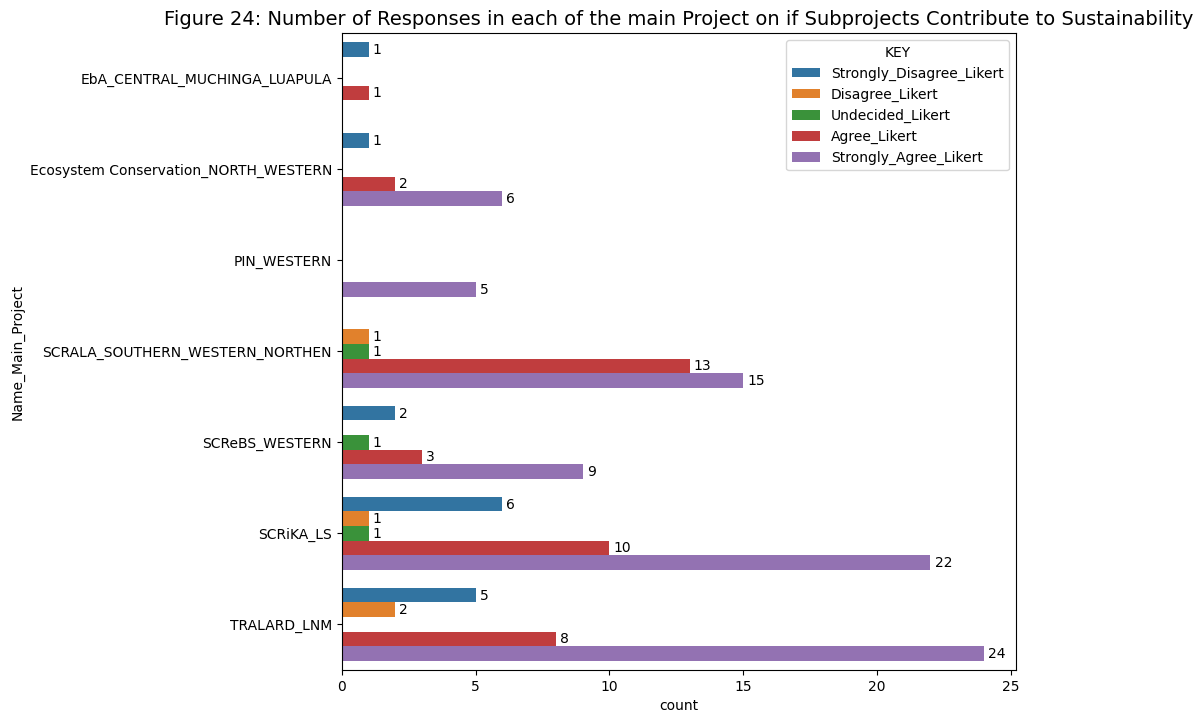

In [498]:
plt.figure(figsize=(8.7, 8.27))
hue_order = ["Strongly_Disagree_Likert", "Disagree_Likert", "Undecided_Likert", "Agree_Likert", "Strongly_Agree_Likert"]
ax = sns.barplot(data = SSC_grouped1, x="count", y="Name_Main_Project", hue="Subprojects_Sustainability_Contribution", hue_order=hue_order, legend=True)
ax.set_title("Figure 24: Number of Responses in each of the main Project on if Subprojects Contribute to Sustainability", fontsize=14)
plt.legend(title="KEY")
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", label_type="edge", padding=3)
plt.show()

[<a href="#Purpose-of-the-Analysis">Back to top</a>]

## 12. Converting the Notebook

In [499]:
with open('Data_Analysis.ipynb', 'r') as f:
    notebook = nbformat.read(f, as_version=4)

# Initialize the HTML Exporter
html_exporter = HTMLExporter()
(body, resources) = html_exporter.from_notebook_node(notebook)

# Save the HTML output
with open('Data_Analysis.html', 'w') as f:
    f.write(body)

print("Conversion to HTML completed!")

Conversion to HTML completed!


[<a href="#Purpose-of-the-Analysis">Back to top</a>]